# Objetivo

Este trabalho visa obter insights através dos dados de como está o mercado de Data Science e o que ele esta requerendo. A ideia a priri era obter insights a cerca de salários e skills demandadas, até a coleta dos dados não se tinha com clareza  que tipo de análise exatamente seria feita. Com esse intuito preilimar coletou-se os dados das mais diversas fontes, tais como kaagle, glassdoor, h1bdata e medley. Os links de onde foram baixados os dataset podem ser encontrados abaixo e categorizados segundo uma inspeção preliminar:


<br/>


- Salaries Around World: O conjunto de dados nessa categoria envolve datasets com mesmo esquema. Eles possuem dados sobre o ano de coleta do dado, o tipo a modalidade empregatícia, salários na moeda local, salarios em dolar, proporção de tempo em regime remoto, onde fica sede da compania ,o tamanho da compania e finalmente o local de residência do empregado.

    - *AI/ML Salaries* : https://www.kaggle.com/datasets/cedricaubin/ai-ml-salaries 
    - *Data Science Jobs Analysis*: https://www.kaggle.com/datasets/niyalthakkar/data-science-jobs-analysis
    - *Data Jobs 2023*: https://www.kaggle.com/datasets/dinarkhan/data-jobs-2023 
    
    <br/>

 - Jobs Descriptions: Esse conjunto de dados foi coletado visando analisar quais são as skills que mais aparecem nas descrições de vagas de trabalho. Os dataset possuem squemas diferentes, mas ambos foram coletados com o intuito de  somente utilizar a coluna equivalente ao cargo de trabalho e a descrição:

    - *Data Scientist Jobs* - GlassDoor: https://www.kaggle.com/datasets/andrewmvd/data-scientist-jobs?datasetId=778775&sortBy=voteCount : Possui o cargo de trabalho ofertado na vaga, aonde a vaga foi postada, a compania que postou a vaga e a descrição do job. 
    
    <br/>

    - *2023 Data Scientists Job Descriptions* : https://www.kaggle.com/datasets/diegosilvadefrana/2023-data-scientists-jobs-descriptions :  Esse dataset é bem mais amplo, além de possuir o título do job e sua descrição ele possui o nnome da compahia, seu lucro, sua avalição na plataforma glassdoor e o setor de atuação daquela compahia.  De fato poderia-se fazer fazer uma análise mais rica com esse dataset, mas por questões de escopo de projeto apenas utilizou-se as columnas relativas ao título do job, a descrição e o setor em que a companhia atua com a finalidade de obter um insight de qual setores estão mais empregando. 
    
    <br/>



- Jobs mapping Skills: Nessa categoria temos o mapeamento de habilidades por job, são listados ao todo  16 habilidades onde um empregado. Cada linha desse dataset equivale a um empregado num determinado posto, que respondeu sua posição em relação a aquela habilidade.

    - *IT Career Proficiency Dataset*: https://data.mendeley.com/datasets/kzt6h7pz97 
    
    <br/>
    

- H1Bdata: Esses dataset foi obtido a partir de uma adpatação de um script de  web scrapping em  "https://github.com/yiuhyuk/ds_salary_h1b/blob/master/h1b_salary.ipynb". O código adpatado pode ser encontrando na classe       ```H1bdataWebScrapper.py``` e sua implementação no script  ```h1bdata_web_scrapping.py``` ambos presensente nesse repositório. Nesse datasset temos  o nome da compania em que está o job, o título do job, o salário em dolar, a data de postagem, a cidade e o estado americano correspondente.


Por fim valem duas observações. 

-> A primeira em relação  aos dataset, os datasets das categorias `Jobs Descriptions`,  `Jobs mapping Skills` e `H1Bdata` correpondem a dados coletados relativo ao território dos EUA, portanto a vasta maioria dos dados aqui coletados diz respeito ao Estados Unidos, pois a vasta maioria dos dados disponíveis gratuitos correspondem ao território dos EUA. Por isso daremos ênfase a ánalise em território americano.

-> A segunda é em relação a implementação do pré-processamento. Durante a pós-graduação de ciência de dados e analytics aprendemos diversos conceitos de engenharia de software e Pogração orientada a objetos. Com o intuito de implementar os conceitos aprendidos nessas disciplinas na prática, implementou-se o pré-processamento segmentado em classes, então utilizaremos  o package  `PreProcessing` para performar as principais tarefas de pre-processamento.

Dadas as devidas descrições, mãos a obra !



# Extração de insights do mercado de trabalho e o que ele está requerendo nos últimos anos

In [172]:
#Setup to run on Colab
"""
from google.colab import drive
import os
import warnings
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/Estudos/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/sprint I - Analise de salarios cientista de dados/data_science_job_market_analysis/Code/')
warnings.filterwarnings('ignore')
"""

"\nfrom google.colab import drive\nimport os\nimport warnings\ndrive.mount('/content/gdrive')\nos.chdir('/content/gdrive/MyDrive/Estudos/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/sprint I - Analise de salarios cientista de dados/data_science_job_market_analysis/Code/')\nwarnings.filterwarnings('ignore')\n"

In [173]:
#importar ferramentaas  e manipulação de dados e geração de visualização

import numpy as np
import seaborn as sns
from scipy.stats import kstest
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Importar classes para composição de dados

from ComposeData.CsvReader import CsvReader
from ComposeData.Concatenator import Concatenator

# Para realização de Pré-processamento

from Preprocessing.TransformData.DataReplacer import  DataReplacer
from Preprocessing.CleanData.DataFilter import DataFilter
from Preprocessing.TransformData.DataTypeConversor import DataTypeConversor
from Preprocessing.PreProcessing import PreProcessing
from Preprocessing.CleanData.MissingDataHandler import MissingDataHandler
from Preprocessing.TransformData.DataSplitter import DataSplitter
from Preprocessing.TransformData.TextProcessor import TextProcessor


#Importar Variáveis de ambiente

from Env.ProjectPaths import *
from Env.Constants import *
from Env.PreprocessingParameters import *


import warnings

warnings.filterwarnings('ignore')



## Merging Dos dados 

Como fora mencionado na descrição os dados relativos a categoria "`Salaries Around world`" possuem o mesmo esquema, exatamente por isso é foi realizado um trabalho de concatenar esse datasets num único dataset claro tendo o cuido de eliminar os duplicados para retirar redudância no dataset resultante da composição. Para isso construi-se a classe `Concatenator` cuja implementação  de concatenação de dados  pode ser vista a seguir: 

In [174]:
#Even it works I doesn't looks weel, I would like to replace that for something more elegant.



#Instantiate Classes

#Readers

csv_reader1 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/data_science jobs_salaries_world.csv")
csv_reader2 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/data_science_salaries_around_world.csv")
csv_reader3 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/ds.salaries.csv")
csv_reader4 = CsvReader(file_path= DATASET_PATH + "Salaries_around_world/salaries.csv")

#Concatenator

Concatenator = Concatenator()


#Load data

df_salaries_around_world1 = csv_reader1.load_data()
df_salaries_around_world2 = csv_reader2.load_data()
df_salaries_around_world3 = csv_reader3.load_data()
df_salaries_around_world4 = csv_reader4.load_data()


#Cocatenate

dfs_salaries_around_world = [df_salaries_around_world1, df_salaries_around_world2, df_salaries_around_world3, df_salaries_around_world4]
salaries_around_world = Concatenator.process_data(data=dfs_salaries_around_world)

#Save on to analyse Output

salaries_around_world.to_csv(DATASET_PATH + "Salaries_around_world/Composed_data/salaries_around_world.csv")

## Avaliação preliminar e preprocessamento dos dados

In [175]:
# Carrega dados 



salaries_around_world_df = CsvReader(file_path = SALARIES_WORLD_COMPSED_DATASET_PATH).load_data()
h1bdata_df = CsvReader(file_path = H1BDATA_DATASET_PATH).load_data()
job_description_kaggle_df = CsvReader(file_path = KAGGLE_JOB_DESCRIPTIONS_DATASE_PATHT).load_data()
job_description_glassdoor_df = CsvReader( file_path= GLASSDOOR_JOB_DESCRIPTIONS_DATASET_PATH).load_data()
skills_mapping_df = CsvReader( file_path= SKILLS_MAPPING_DATASET_PATH).load_data()



### Salaries Around World

In [176]:
salaries_around_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 1052
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2370 non-null   int64 
 1   experience_level    2370 non-null   object
 2   employment_type     2370 non-null   object
 3   job_title           2370 non-null   object
 4   salary              2370 non-null   int64 
 5   salary_currency     2370 non-null   object
 6   salary_in_usd       2370 non-null   int64 
 7   employee_residence  2370 non-null   object
 8   remote_ratio        2370 non-null   int64 
 9   company_location    2370 non-null   object
 10  company_size        2370 non-null   object
dtypes: int64(4), object(7)
memory usage: 222.2+ KB


In [177]:
salaries_around_world['employee_residence'].value_counts()

US    1558
GB     187
IN      89
CA      79
DE      61
      ... 
MD       1
MK       1
BA       1
AM       1
KW       1
Name: employee_residence, Length: 76, dtype: int64

Primeira coisas que percebemos. O dataset não é representativo para todos os países, mesmo concatenando todos os datasets disponíveis. A imensa maioria dos registro correspondem as empregos nos EUA, o dataset se mostra representativo para os 5 primeiros países com mais registros. Então só consideraremos os 5 países com mais registros nesse dataset.

Além disso...

In [178]:
salaries_around_world_df['employment_type'].value_counts()

FT    2331
PT      21
CT       9
FL       9
Name: employment_type, dtype: int64

A imensa maioria do dataset corresponde a  vínculo empregatício FULL time. Logo os outros tipos de vínculos também não são representativos e devem ser eliminados.

Nesse dataset só tem uma variável numérica que nos interessa, que é "salary_in_usd", vamos analisa-la mais a fundo.

<AxesSubplot:ylabel='Density'>

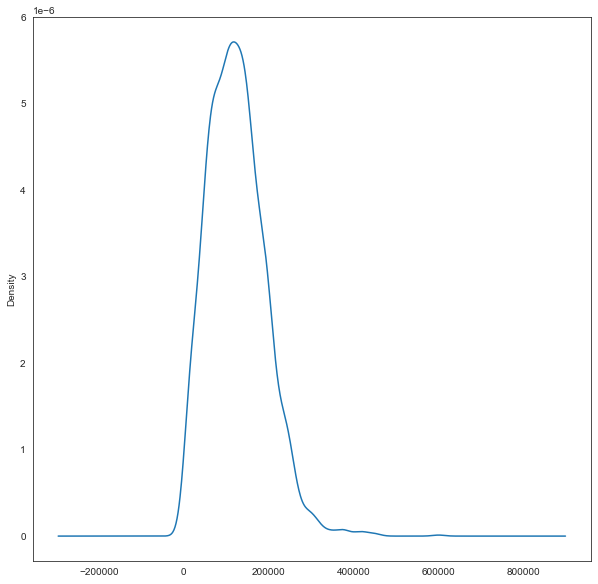

In [179]:
fig = plt.figure( figsize= (10,10))
fig.set_facecolor('white')

salaries_around_world_df['salary_in_usd'].plot(kind='density')


Visualmente  a  variáveil relativa ao salário parece ter distribuição normal. Contudo  esssa distribuição não está refletindo a linha de análise, pois para nossa linha de análise é interessante considerar a distribuição pelo título do job.

<AxesSubplot:>

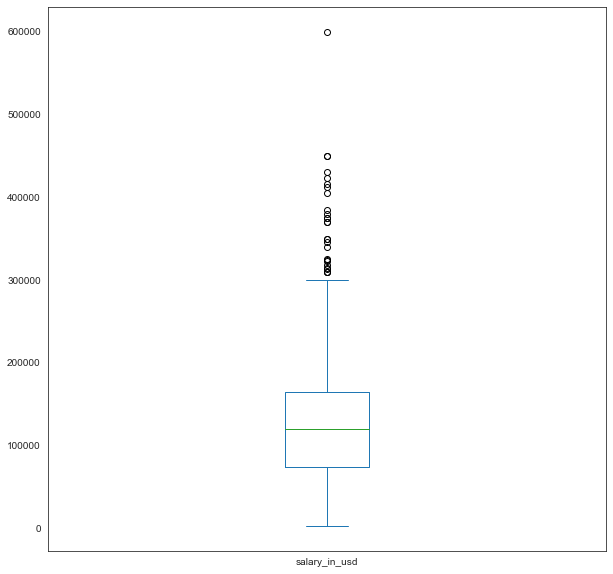

In [180]:
fig = plt.figure( figsize= (10,10))
fig.set_facecolor('white')

salaries_around_world_df['salary_in_usd'].plot(kind='box')

De forma absoluta parece haver alguns outliers, trateremos disso mais adiante.

Contudo havemos de observar um pequeno detalhes:

In [181]:
salaries_around_world_df['salary_in_usd']

0        64369
1        68428
2        85000
3       230000
4       125000
         ...  
2365     37665
2366     75455
2367     63285
2368     58417
2369     46246
Name: salary_in_usd, Length: 2370, dtype: int64

A coluna salarios está em int64, é interessante que essa coluna seja um float por representar um valor monetário.

Analise  dos títulos de jobs

In [182]:
salaries_around_world_df['job_title'].unique()

array(['Data Science Consultant', 'Data Scientist',
       'Head of Data Science', 'Head of Data',
       'Machine Learning Engineer', 'Data Analytics Manager',
       'Research Scientist', 'Data Analyst', 'Data Engineer',
       'Data Science Engineer', 'Manager Data Science',
       'Data Engineering Manager', 'AI Scientist',
       '3D Computer Vision Researcher', 'ML Engineer',
       'Applied Data Scientist', 'Director of Data Science',
       'Data Analytics Engineer', 'Lead Data Analyst', 'BI Data Analyst',
       'Machine Learning Scientist',
       'Machine Learning Infrastructure Engineer',
       'Marketing Data Analyst', 'Lead Data Engineer',
       'Director of Data Engineering',
       'Computer Vision Software Engineer', 'Financial Data Analyst',
       'Cloud Data Engineer', 'Principal Data Analyst',
       'Big Data Architect', 'Lead Data Scientist', 'Data Architect',
       'Big Data Engineer', 'Staff Data Scientist',
       'Data Science Manager', 'Business Data Anal

Como podemos ver temos muitos títulos para trabalhos, muitos deles podem ser simplificados, então temos uma primeira tarefas simplificar os postos de trabalho nesse dataset.
Mas essa não é a única subsituição a fazer, note que outra colunas também devem passar por esse tipo de transformação afim de fazer com a informação contida nela fique mais clara:



In [183]:
salaries_around_world_df[['experience_level','employee_residence','company_location', 'company_size']].head(10)

experience_level employee_residence company_location company_size
0               EN                 DE               DE            L
1               SE                 GR               US            L
2               EX                 RU               RU            M
3               EX                 RU               RU            L
4               EN                 US               US            S
5               SE                 US               US            M
6               MI                 US               US            M
7               MI                 FR               FR            L
8               MI                 AT               AT            L
9               SE                 CA               CA            L

Sendo assim outro pre-processamento a se fazer é realizar substituições nessas colunas com a finalidade de torna-la mais claras e explícitas.

Tendo preliminarmente  analisado esse dataset temos então listados todo o pré-processamento que será feito a priori. Assim sendo vamos realizar-lo

In [184]:
#import subprocess

###subprocess.run(['python', 'setup.py'], capture_output=True, text=True)


In [185]:
#Salaries around world preprocessing

#Replacing if contains

salaries_world_replacing_if_contains = DataReplacer(task="IFCONTAINSREPLACNING", on_col='job_title', values=DS_JOBS_SALARIES_AROUND_WORLD)


# map replace

salaries_world_map_replacing_jobs = DataReplacer(task="MAPREPLACING", on_col='job_title', map=MAP_DS_JOB_SALARIES_AROUND_WORLD)


#filter non-full time

salaries_world_filter_no_fulltime = DataFilter(filter_by="FILTER_NOT_EQUAL_VALUE",  col="employment_type", by_value="FT")


# map replace contry abrevitations

map = CsvReader(file_path=DATASET_PATH + "Salaries_around_world/maps/countries_map.csv").load_data()
map = dict(map.values)
salaries_world_map_replace_contries_abv_er = DataReplacer(task="MAPREPLACING", on_col='employee_residence', map=map)
salaries_world_map_replace_contries_abv_cl = DataReplacer(task="MAPREPLACING", on_col='company_location', map=map)


#map replace expirience level

salaries_world_map_replace_experience_level =  DataReplacer(task = "MAPREPLACING", on_col='experience_level', map = MAP_EXPIRIENCE_LEVEL_SALARIES_AROUND_WORLD)


#map replace company_size

salaries_world_map_replace_company_size =  DataReplacer(task = "MAPREPLACING", on_col='company_size', map = MAP_COMPANY_SIZE_SALARIES_AROUND_WORLD)
# filter job_titles less freq than 4

salaries_world_filter_less_freq = DataFilter(filter_by="FREQ_LOWER_THAN_VALUE", col='job_title', by_value= 4)


#convert salaries to float

salaries_world_convert_salaries_usd_float = DataTypeConversor(to_type="TO_FLOAT", col="salary_in_usd")



#Salaries Around world prepropcessing

print("Iniciating Pre-Processing on salaries__around_worl\n")

salaries_world_preprocessors = [ 
                                salaries_world_replacing_if_contains, salaries_world_map_replacing_jobs, salaries_world_map_replace_experience_level, salaries_world_filter_no_fulltime, \
                                salaries_world_map_replace_contries_abv_er, salaries_world_map_replace_contries_abv_cl, \
                                salaries_world_map_replace_company_size, salaries_world_filter_less_freq,
                                salaries_world_convert_salaries_usd_float
                                
                            ]
salaries_world_preprocessing =  PreProcessing( pre_processors= salaries_world_preprocessors)
salaries_world_around_df_preprocessed = salaries_world_preprocessing.process_data(salaries_around_world)
print("salaries__around_worl Preprocessing Completed Sucessfully. ")


Iniciating Pre-Processing on salaries__around_worl

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Filtering... 
Data Filtering DONE ! 

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Filtering... 
Data Filtering DONE ! 

Perform Data conversion... 
Data conversion DONE !

salaries__around_worl Preprocessing Completed Sucessfully. 


Vamos então checar o novo arquivo:

In [186]:
salaries_world_around_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 1052
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           2325 non-null   int64  
 1   experience_level    2325 non-null   object 
 2   employment_type     2325 non-null   object 
 3   job_title           2325 non-null   object 
 4   salary              2325 non-null   int64  
 5   salary_currency     2325 non-null   object 
 6   salary_in_usd       2325 non-null   float64
 7   employee_residence  2325 non-null   object 
 8   remote_ratio        2325 non-null   int64  
 9   company_location    2325 non-null   object 
 10  company_size        2325 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 218.0+ KB


Se os países são os top 5 mais frequentes:

In [187]:
salaries_world_around_df_preprocessed['employee_residence'].value_counts()

UNITED STATES OF AMERICA    1549
UNITED KINGDOM               187
INDIA                         84
CANADA                        78
GERMANY                       58
                            ... 
BULGARIA                       1
CHINA                          1
IRAN                           1
NEW ZEALAND                    1
KUWAIT                         1
Name: employee_residence, Length: 73, dtype: int64

Queremos somente os 5 mais frequentes:

In [188]:
#filter top 5 most frequent countries
country_freq_threshold= salaries_world_around_df_preprocessed['employee_residence'].value_counts()[4]

salaries_world_filter_top_5_most_freq =  DataFilter(filter_by='FREQ_LOWER_THAN_VALUE', by_value=country_freq_threshold, col='employee_residence')
salaries_world_around_df_preprocessed = salaries_world_filter_top_5_most_freq.process_data(salaries_world_around_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



In [189]:
salaries_world_around_df_preprocessed['employee_residence'].value_counts()

UNITED STATES OF AMERICA    1549
UNITED KINGDOM               187
INDIA                         84
CANADA                        78
GERMANY                       58
Name: employee_residence, dtype: int64

como mencionado anteriomente é mais interessante olhar para os dados de salários por categorias, como fizemos a simplificação dos títulos dos jobs então conseguimos analisar a faixa de salários por categoria

In [190]:
salaries_world_around_df_preprocessed['job_title'].value_counts()

DATA SCIENTIST                  543
DATA ENGINEER                   498
DATA ANALYST                    442
MACHINE LEARNING ENGINEER       236
RESEACHER                       129
DATA ARCHITECT                   55
DATA MANAGER                     16
BI DEVELOPER                     11
DATA SPECIALIST                   9
DATA OPERATIONS ENGINEER          6
DATABASE ENGINEER                 4
DATA INFRASTRUCTURE ENGINEER      4
CHIEF DATA OFFICER                3
Name: job_title, dtype: int64

Apesar da simplificação realizada, percebemos temos quantidade não significativa para determinados títulos de jobs, nesse caso vamos pegar  o top 6 mais frequente

In [191]:
freq_job_title_treshold = salaries_world_around_df_preprocessed['job_title'].value_counts()[5]

filter_less_freq_job_titles = DataFilter(filter_by='FREQ_LOWER_THAN_VALUE', by_value= freq_job_title_treshold , col='job_title')
salaries_world_around_df_preprocessed = filter_less_freq_job_titles.process_data(salaries_world_around_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



In [192]:
salaries_world_around_df_preprocessed['job_title'].value_counts()

DATA SCIENTIST               543
DATA ENGINEER                498
DATA ANALYST                 442
MACHINE LEARNING ENGINEER    236
RESEACHER                    129
DATA ARCHITECT                55
Name: job_title, dtype: int64

In [193]:
def generate_scaled_ticks(original_data, scaling, n_ticks, start_with_0=False):
    
    power = int(np.log10(scaling))
    
    scaled_data= original_data / scaling
    lower = scaled_data.min() if not start_with_0 else 0
    upper= scaled_data.max()
    step = (upper - lower) / n_ticks
    scaled_ticks = [ round(el, 2) for el in np.arange(lower, upper + step, step)]
    
    ticks_config = ( scaled_data,scaled_ticks, power )
    
    return  ticks_config

ok, agora podemos olhar para os salarios por categoria

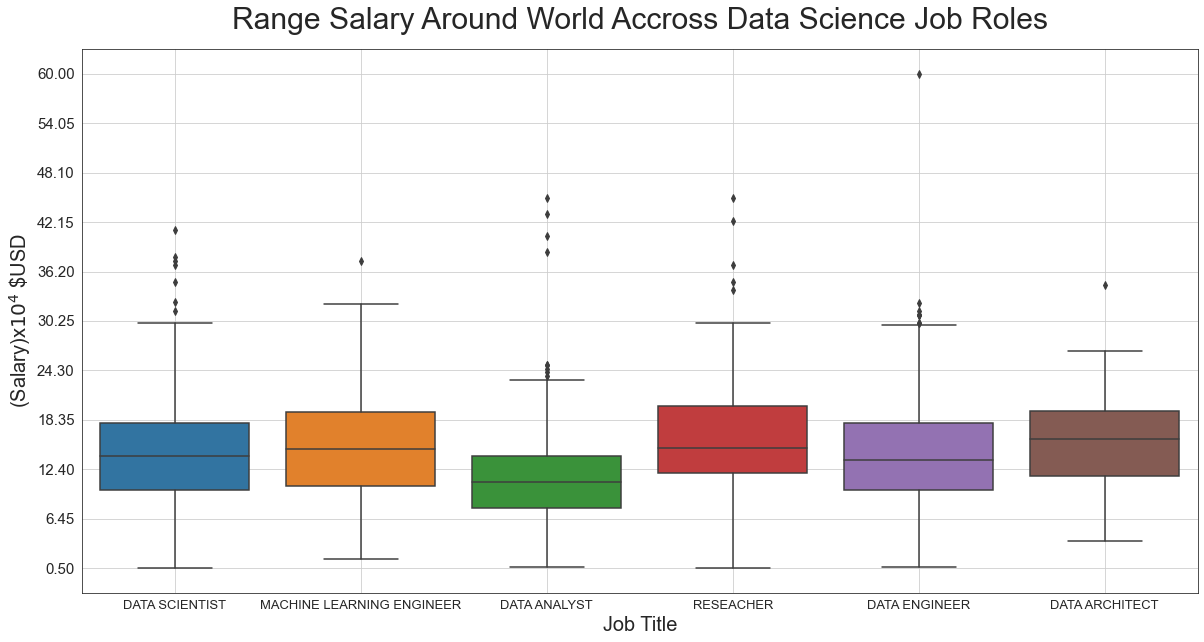

In [194]:

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
scaled_salaries, scaled_ticks, power = generate_scaled_ticks(salaries_world_around_df_preprocessed['salary_in_usd'], 1e4, 10 )
salaries_world_around_df_preprocessed['scaled_salary'] = scaled_salaries
min_sal = scaled_salaries.min()
max_sal = scaled_salaries.max()
sns.boxplot(x='job_title', y='scaled_salary', data=salaries_world_around_df_preprocessed)



plt.title('Range Salary Around World Accross Data Science Job Roles', fontsize= 30, pad = 20)
plt.xlabel("Job Title", fontsize=20)
plt.ylabel(f"(Salary)x$10^{power}$ \$USD", fontsize=20)
plt.yticks(scaled_ticks, fontsize=15)
plt.xticks( fontsize = 13)
plt.grid(visible=True)

vamos olhar mais detalhamdamente a distribuição de salarios por categorias

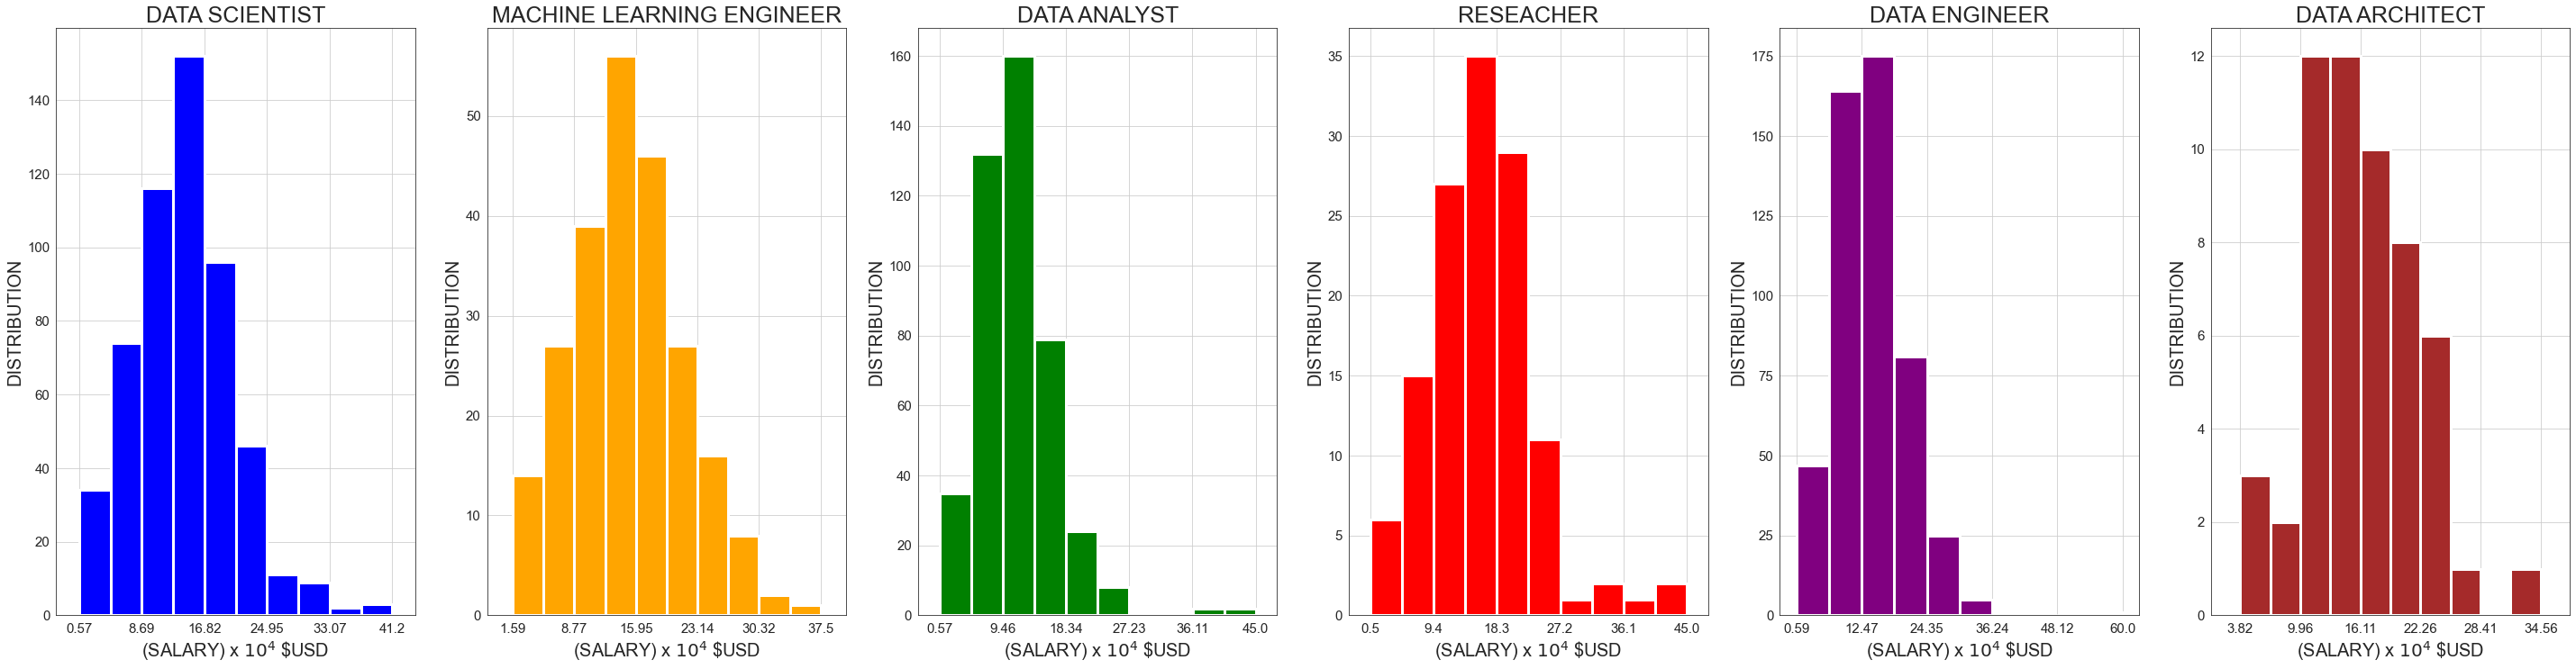

In [195]:
jobs = salaries_world_around_df_preprocessed['job_title'].unique()
fig,axs = plt.subplots(1, len(jobs), figsize=(50,12))
fig.set_facecolor('white')

for job, i in zip(jobs, range(0, len(jobs))):
    
    

    job_roles_salaries = salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['job_title'] == job]['salary_in_usd']
    scaled_salaries, scaled_ticks, power = generate_scaled_ticks(job_roles_salaries, 1e4, 5)
    max_sal = scaled_salaries.max()
    min_sal = scaled_salaries.min()
    
    
    scaled_salaries.plot(kind='hist', ax=axs[i], color=JOB_COLORS[i], linewidth = 3)
    
    # title
    
    axs[i].set_title(f"{job}", fontsize=25)
    
    #labels
    
    axs[i].set_xlabel(f"(SALARY) x $10^{power}$ \$USD", fontsize=20)
    axs[i].set_ylabel("DISTRIBUTION", fontsize= 20)
   
    # ticks
    
    offset= 3
    axs[i].set_xticks(scaled_ticks)
    axs[i].tick_params(axis='x', which='major', pad=5)
    axs[i].tick_params(axis='both', which='major', labelsize=15)
    axs[i].set_xticklabels( [str(i) for i in scaled_ticks])
    
    #limits
    
    axs[i].set_xlim([min_sal - offset, max_sal + offset])
    
    
   #grid 
   
    axs[i].grid(visible=True)

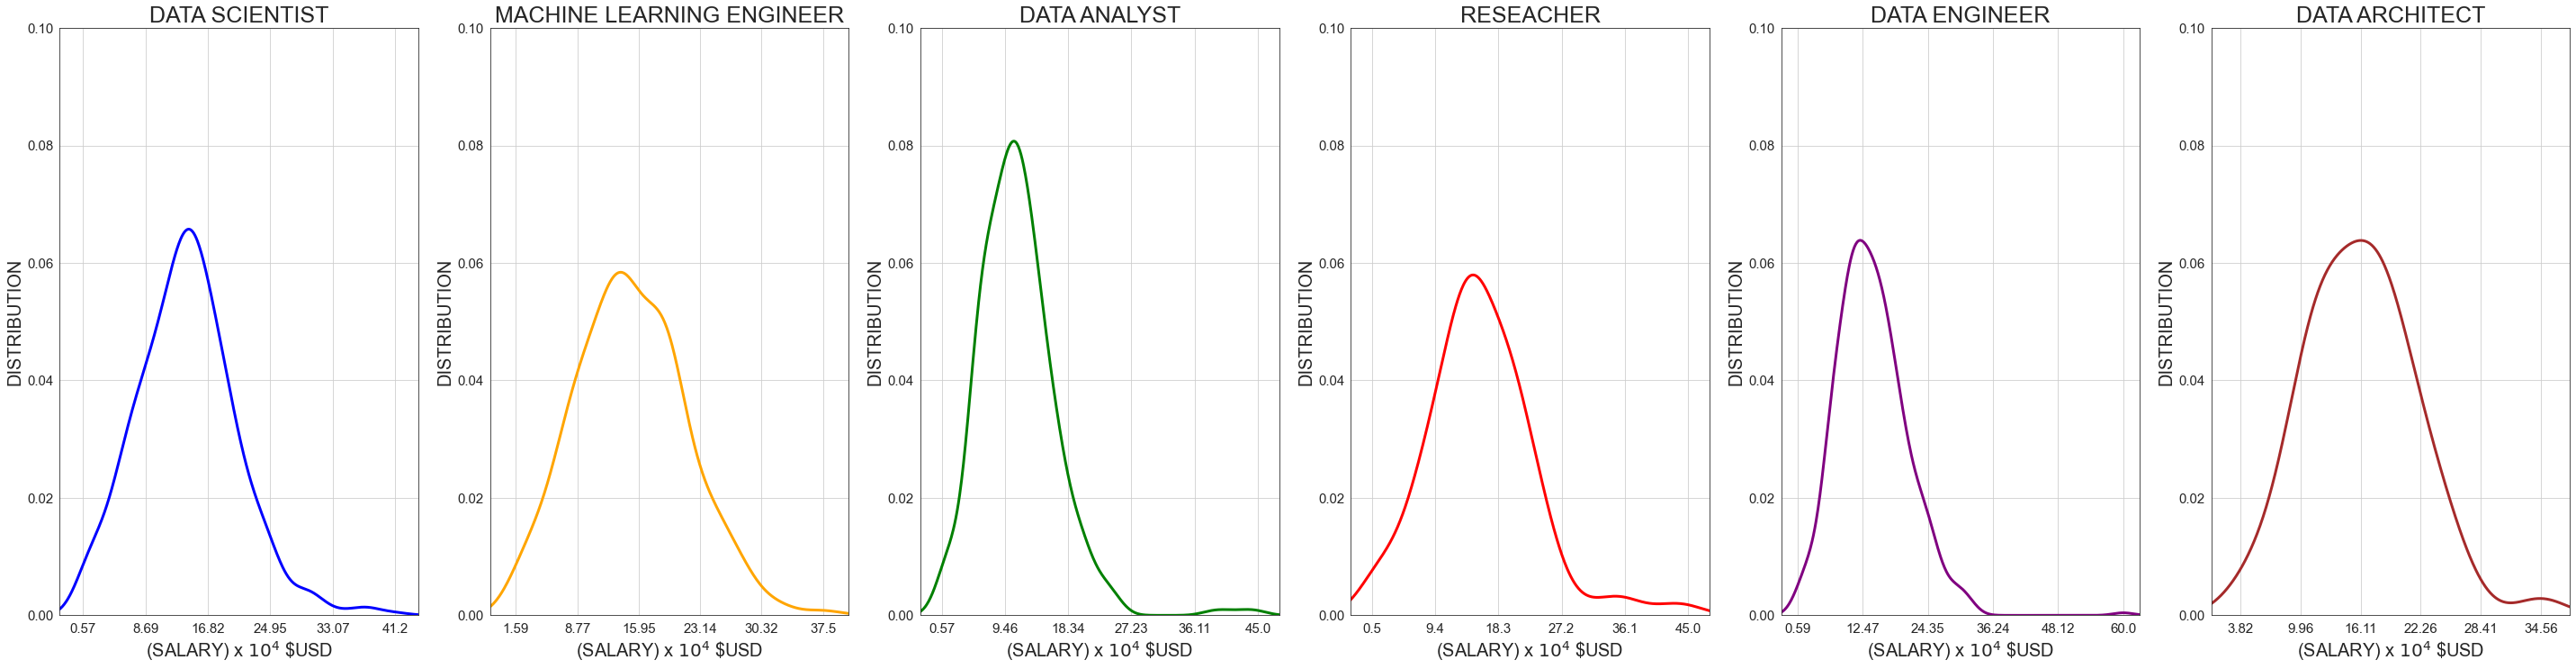

In [196]:


jobs = salaries_world_around_df_preprocessed['job_title'].unique()
fig,axs = plt.subplots(1, len(jobs), figsize=(50,12))
fig.set_facecolor('white')

for job, i in zip(jobs, range(0, len(jobs))):
    
    

    job_roles_salaries = salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['job_title'] == job]['salary_in_usd']
    scaled_salaries, scaled_ticks, power = generate_scaled_ticks(job_roles_salaries, 1e4, 5)
    max_sal = scaled_salaries.max()
    min_sal = scaled_salaries.min()
    
    
    scaled_salaries.plot(kind='density', ax=axs[i], color=JOB_COLORS[i], linewidth = 3)
    
    # title
    
    axs[i].set_title(f"{job}", fontsize=25)
    
    #labels
    
    axs[i].set_xlabel(f"(SALARY) x $10^{power}$ \$USD", fontsize=20)
    axs[i].set_ylabel("DISTRIBUTION", fontsize= 20)
   
    # ticks
    
    offset= 3
    axs[i].set_xticks(scaled_ticks)
    axs[i].tick_params(axis='x', which='major', pad=5)
    axs[i].tick_params(axis='both', which='major', labelsize=15)
    axs[i].set_xticklabels( [str(i) for i in scaled_ticks])
    
    #limits
    
    axs[i].set_xlim([min_sal - offset, max_sal + offset])
    axs[i].set_ylim([0, 0.1])
    
   #grid 
   
    axs[i].grid(visible=True)


Pelo que se pode observar nenhum deles visualmente demonstra uma distribuição normal, vamo então verificar isso numéricamente, para isso vamos usar o teste de Kolmogorov–Smirnov

In [197]:
#checar se tem distribuição normal por Koglomorov-Smirnov

for job in salaries_world_around_df_preprocessed['job_title'].unique():
    
    stat, p = kstest( salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['job_title'] == job]['salary_in_usd'], 'norm')
    alpha = 0.05
    
    if p > alpha:
        
        print(f"Os salarios para {job} SEGUEM uma distruição normal")
    else:
        
        print(f"Os salarios para {job} NÃO SEGUEM uma distruição normal")
    

Os salarios para DATA SCIENTIST NÃO SEGUEM uma distruição normal
Os salarios para MACHINE LEARNING ENGINEER NÃO SEGUEM uma distruição normal
Os salarios para DATA ANALYST NÃO SEGUEM uma distruição normal
Os salarios para RESEACHER NÃO SEGUEM uma distruição normal
Os salarios para DATA ENGINEER NÃO SEGUEM uma distruição normal
Os salarios para DATA ARCHITECT NÃO SEGUEM uma distruição normal


Segundo esse teste nenhuma dos salários seguem uma distribuição normal, sendo assim utilizaremos o IRQ como filtro de outliers

vamos tentar filtrar a variavel "salary_in_usd" de forma global, ou seja sem categorizações:

In [198]:
salaries_world_around_df_preprocessed['salary_in_usd']

0        64369.0
4       125000.0
5       120000.0
6       450000.0
9       127543.0
          ...   
962      67240.0
1047     75455.0
1048     63285.0
1051     58417.0
1052     46246.0
Name: salary_in_usd, Length: 1903, dtype: float64

Performing Data Filtering... 
Data Filtering DONE ! 



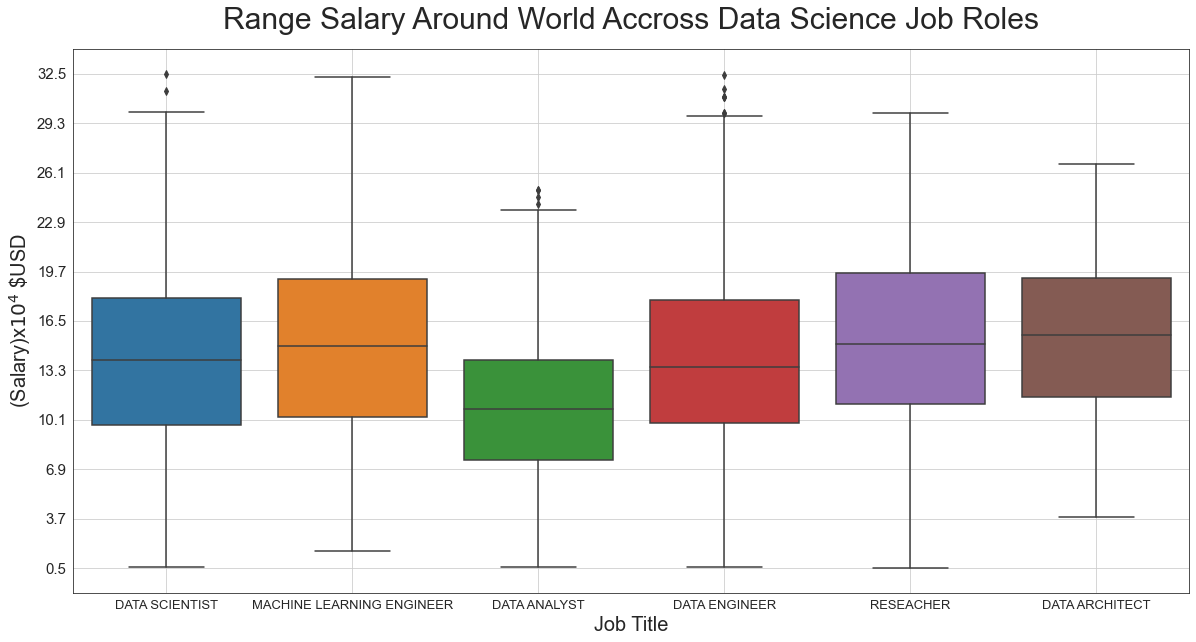

In [199]:
from Preprocessing.CleanData.DataFilter import  DataFilter
test_df = DataFilter(filter_by = "FILTER_OUTLIERS_BY_Z_SCORE",col ='salary_in_usd').process_data(salaries_world_around_df_preprocessed)



fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')


scaled_salaries, scaled_ticks, power = generate_scaled_ticks(test_df['salary_in_usd'], 1e4, 10 )
test_df['scaled_salary'] = scaled_salaries
min_sal = scaled_salaries.min()
max_sal = scaled_salaries.max()
sns.boxplot(x='job_title', y='scaled_salary', data=test_df)



plt.title('Range Salary Around World Accross Data Science Job Roles', fontsize= 30, pad = 20)
plt.xlabel("Job Title", fontsize=20)
plt.ylabel(f"(Salary)x$10^{power}$ \$USD", fontsize=20)
plt.yticks(scaled_ticks, fontsize=15)
plt.xticks( fontsize = 13)
plt.grid(visible=True)

Performing Data Filtering... 
Data Filtering DONE ! 



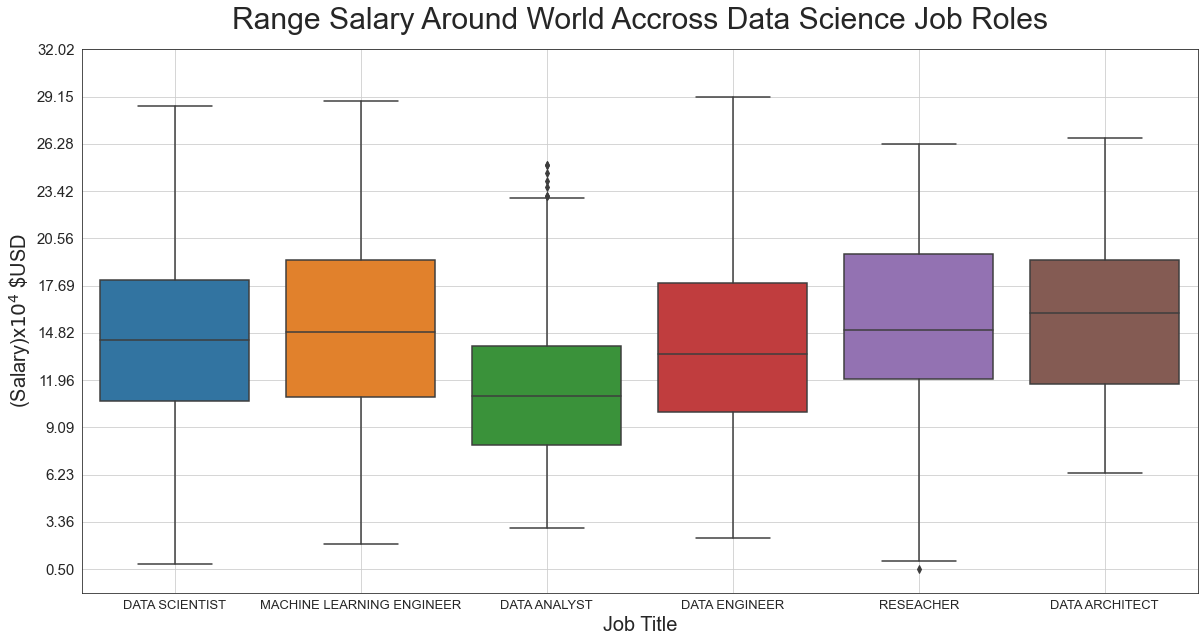

In [200]:

#Eliminar outliers e configurar ticks

test_df = DataFilter(filter_by = "FILTER_OUTLIERS_BY_IQR",col ='salary_in_usd').process_data(salaries_world_around_df_preprocessed)
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')


scaled_salaries, scaled_ticks, power = generate_scaled_ticks(test_df['salary_in_usd'], 1e4, 10 )
test_df['scaled_salary'] = scaled_salaries
min_sal = scaled_salaries.min()
max_sal = scaled_salaries.max()
sns.boxplot(x='job_title', y='scaled_salary', data=test_df)



plt.title('Range Salary Around World Accross Data Science Job Roles', fontsize= 30, pad = 20)
plt.xlabel("Job Title", fontsize=20)
plt.ylabel(f"(Salary)x$10^{power}$ \$USD", fontsize=20)
plt.yticks(scaled_ticks, fontsize=15)
plt.xticks( fontsize = 13)
plt.grid(visible=True)

Performou bem para boa parte das categorias, porém 2 categorias em específico ficaram com mais outliers, talvez sejam mais interessante filtrar por categoria

Performing Data Filtering... 
Data Filtering DONE ! 



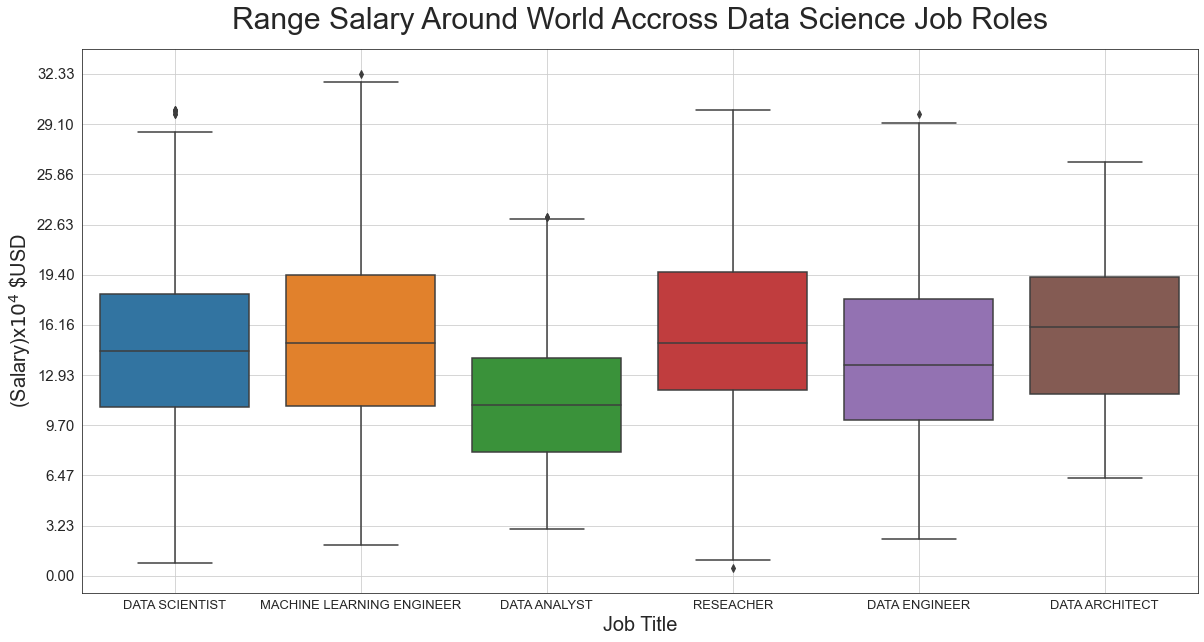

In [201]:
#Eliminar outliers e configurar ticks

test_df = DataFilter( filter_by="FILTER_OUTLIERS_CATEGORICALLY_BY_IRQ", col='salary_in_usd', category_col='job_title').process_data(salaries_world_around_df_preprocessed)
scaled_salaries, scaled_ticks, power = generate_scaled_ticks(test_df['salary_in_usd'], 1e4, 10, start_with_0=True)
test_df['rescaled_salaries'] = scaled_salaries

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
min_sal = scaled_salaries.min()
max_sal = scaled_salaries.max()

sns.boxplot(x='job_title', y='scaled_salary', data=test_df)



plt.title('Range Salary Around World Accross Data Science Job Roles', fontsize= 30, pad = 20)
plt.xlabel("Job Title", fontsize=20)
plt.ylabel(f"(Salary)x$10^{power}$ \$USD", fontsize=20)
plt.yticks(scaled_ticks, fontsize=15)
plt.xticks( fontsize = 13)
plt.grid(visible=True)

Dessa forma o desempenho foi melhor, sendo assim vamos ficar com a filtragem de outlier por categoria

In [202]:
salaries_world_around_df_preprocessed = test_df

In [203]:
salaries_world_around_df_preprocessed

work_year experience_level employment_type       job_title  salary  \
0        2021      ENTRY-LEVEL              FT  DATA SCIENTIST   54000   
9        2021     SENIOR-LEVEL              FT  DATA SCIENTIST  159500   
10       2021     SENIOR-LEVEL              FT  DATA SCIENTIST  144000   
12       2021        MID-LEVEL              FT  DATA SCIENTIST   95000   
13       2021        MID-LEVEL              FT  DATA SCIENTIST  150000   
..        ...              ...             ...             ...     ...   
389      2023     SENIOR-LEVEL              FT  DATA ARCHITECT  120000   
446      2023     SENIOR-LEVEL              FT  DATA ARCHITECT  198000   
447      2023     SENIOR-LEVEL              FT  DATA ARCHITECT  114000   
469      2023     SENIOR-LEVEL              FT  DATA ARCHITECT  160000   
480      2023     SENIOR-LEVEL              FT  DATA ARCHITECT  124999   

    salary_currency  salary_in_usd        employee_residence remote_ratio  \
0               EUR        64369.0                   GERMANY           50   
9               CAD       127543.0                   CANADA            50   
10              USD       144000.0  UNITED STATES OF AMERICA          100   
12              CAD        75966.0                   CANADA           100   
13              USD       150000.0  UNITED STATES OF AMERICA          100   
..              ...            ...                       ...          ...   
389             USD       120000.0  UNITED STATES OF AMERICA            0   
446             USD       198000.0  UNITED STATES OF AMERICA          100   
447             USD       114000.0  UNITED STATES OF AMERICA          100   
469             USD       160000.0  UNITED STATES OF AMERICA          100   
480             GBP       152126.0            UNITED KINGDOM          100   

             company_location company_size  scaled_salary  rescaled_salaries  
0                     GERMANY   LARGE-SIZE         6.4369             6.4369  
9                     CANADA    LARGE-SIZE        12.7543            12.7543  
10   UNITED STATES OF AMERICA   LARGE-SIZE        14.4000            14.4000  
12                    CANADA    LARGE-SIZE         7.5966             7.5966  
13   UNITED STATES OF AMERICA  MEDIUM-SIZE        15.0000            15.0000  
..                        ...          ...            ...                ...  
389  UNITED STATES OF AMERICA  MEDIUM-SIZE        12.0000            12.0000  
446  UNITED STATES OF AMERICA  MEDIUM-SIZE        19.8000            19.8000  
447  UNITED STATES OF AMERICA  MEDIUM-SIZE        11.4000            11.4000  
469  UNITED STATES OF AMERICA  MEDIUM-SIZE        16.0000            16.0000  
480            UNITED KINGDOM   LARGE-SIZE        15.2126            15.2126  

[1765 rows x 13 columns]

A etapa de verificação para  "Salaries Around World" foi concluida, agora vamos a verificação do dataset extraido do H1BData

### H1BData

Vamos então a verificação preliminar

In [204]:
h1bdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82431 entries, 0 to 82430
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  82431 non-null  int64 
 1   company     82430 non-null  object
 2   title       82396 non-null  object
 3   salary      82396 non-null  object
 4   location    82396 non-null  object
 5   date        82396 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.8+ MB


In [205]:
#Eliminação coluna indesejada

h1bdata_df = h1bdata_df.iloc[:,1:]
h1bdata_df

company           title   salary  \
0      FORTRESS INFORMATION SECURITY LLC  DATA SCIENTIST   45,980   
1                  PERCOLATA CORPORATION  DATA SCIENTIST   46,060   
2                   MY LIFE REGISTRY LLC  DATA SCIENTIST   47,960   
3                   MY LIFE REGISTRY LLC  DATA SCIENTIST   47,960   
4         BIG DATA ANALYTICS TRADING INC  DATA SCIENTIST   50,000   
...                                  ...             ...      ...   
82426                         GOOGLE LLC    STATISTICIAN  183,000   
82427               ERNST & YOUNG US LLP    STATISTICIAN  200,476   
82428               ERNST & YOUNG US LLP    STATISTICIAN  200,476   
82429                 AEM-USA FOUNDATION    STATISTICIAN  216,000   
82430              SUMRIDGE PARTNERS LLC    STATISTICIAN  225,000   

                location        date  
0            ORLANDO, FL  04/09/2020  
1          PALO ALTO, CA  03/18/2016  
2           FORT LEE, NJ  02/18/2015  
3           FORT LEE, NJ  02/18/2015  
4        JOHNS CREEK, GA  03/16/2017  
...                  ...         ...  
82426  MOUNTAIN VIEW, CA  01/29/2019  
82427       NEW YORK, NY  03/21/2022  
82428       WESTBURY, NY  03/21/2022  
82429         DALLAS, TX  03/08/2016  
82430    JERSEY CITY, NJ  08/20/2021  

[82431 rows x 5 columns]

Como pudemos ver algumas linhas tem valores nullos, vamos olhar um pouco mais a fundo para ver como essas linhas estão

In [206]:
h1bdata_df[h1bdata_df.isna().any( axis = 1)]

company             title  salary     location        date
10          \n \n               NaN     NaN          NaN         NaN
40     \n\n\n\n\n               NaN     NaN          NaN         NaN
81     \n\n\n\n\n               NaN     NaN          NaN         NaN
122    \n\n\n\n\n               NaN     NaN          NaN         NaN
163    \n\n\n\n\n               NaN     NaN          NaN         NaN
16968       \n \n               NaN     NaN          NaN         NaN
16998  \n\n\n\n\n               NaN     NaN          NaN         NaN
17039  \n\n\n\n\n               NaN     NaN          NaN         NaN
17080  \n\n\n\n\n               NaN     NaN          NaN         NaN
17121  \n\n\n\n\n               NaN     NaN          NaN         NaN
27860       \n \n               NaN     NaN          NaN         NaN
27890  \n\n\n\n\n               NaN     NaN          NaN         NaN
27931  \n\n\n\n\n               NaN     NaN          NaN         NaN
27972  \n\n\n\n\n               NaN     NaN          NaN         NaN
28013  \n\n\n\n\n               NaN     NaN          NaN         NaN
39550       \n \n               NaN     NaN          NaN         NaN
39580  \n\n\n\n\n               NaN     NaN          NaN         NaN
39621  \n\n\n\n\n               NaN     NaN          NaN         NaN
39662  \n\n\n\n\n               NaN     NaN          NaN         NaN
39703  \n\n\n\n\n               NaN     NaN          NaN         NaN
41137       \n \n               NaN     NaN          NaN         NaN
41167  \n\n\n\n\n               NaN     NaN          NaN         NaN
41208  \n\n\n\n\n               NaN     NaN          NaN         NaN
41249  \n\n\n\n\n               NaN     NaN          NaN         NaN
41290  \n\n\n\n\n               NaN     NaN          NaN         NaN
41803       \n \n               NaN     NaN          NaN         NaN
41833  \n\n\n\n\n               NaN     NaN          NaN         NaN
41874  \n\n\n\n\n               NaN     NaN          NaN         NaN
41915  \n\n\n\n\n               NaN     NaN          NaN         NaN
41956  \n\n\n\n\n               NaN     NaN          NaN         NaN
42374         NaN  BUSINESS ANALYST  53,260  FAIRFAX, VA  01/07/2016
81395       \n \n               NaN     NaN          NaN         NaN
81425  \n\n\n\n\n               NaN     NaN          NaN         NaN
81466  \n\n\n\n\n               NaN     NaN          NaN         NaN
81507  \n\n\n\n\n               NaN     NaN          NaN         NaN
81548  \n\n\n\n\n               NaN     NaN          NaN         NaN

Como visto acima, basta então eliminar todas as linhas que valor NaN em algumas das variáveis do dataset, assim eliminamos todas as linhas em branco.

In [207]:
#Eliminar linhas em branco

h1_bdata_blank_lines_cleaner = MissingDataHandler(handling_by = "CLEAN_BLANK_LINES")
h1bdata_df_preprocessed = h1_bdata_blank_lines_cleaner.process_data(h1bdata_df)
h1bdata_df_preprocessed.info()

Performing missing values elimination... 
missing values elimination DONE !

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82395 entries, 0 to 82430
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   company   82395 non-null  object
 1   title     82395 non-null  object
 2   salary    82395 non-null  object
 3   location  82395 non-null  object
 4   date      82395 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [208]:
sum(h1bdata_df_preprocessed.isna().any())

0

Todas as linhas em branco foram eliminadas ! Por seguinte passemos a análise de distribuição da variável correspondete aos salários por  título de trabalho, mas antes precisamos converter essa coluna para o tipo float

In [209]:
h1bdata_df_preprocessed['salary']

0         45,980
1         46,060
2         47,960
3         47,960
4         50,000
          ...   
82426    183,000
82427    200,476
82428    200,476
82429    216,000
82430    225,000
Name: salary, Length: 82395, dtype: object

precisamos nos livrar dessa vírgula e  converter essa coluna para float

In [210]:
h1_bdata_comma_replacer = DataReplacer(task = "CHARREPLACING", on_col = "salary", this = ",", by = "")
h1_bdata_convert_salaries_to_float = DataTypeConversor(to_type='TO_FLOAT', col='salary')
h1bdata_df_preprocessed = PreProcessing( pre_processors=[h1_bdata_comma_replacer,  h1_bdata_convert_salaries_to_float]).process_data(h1bdata_df_preprocessed)
h1bdata_df_preprocessed['salary']

Performing Data Replacement... 
Data Replacement DONE !

Perform Data conversion... 
Data conversion DONE !



0         45980.0
1         46060.0
2         47960.0
3         47960.0
4         50000.0
           ...   
82426    183000.0
82427    200476.0
82428    200476.0
82429    216000.0
82430    225000.0
Name: salary, Length: 82395, dtype: float64

perfeito, agora podemos fazer uma análise de distribuição dessa variável.

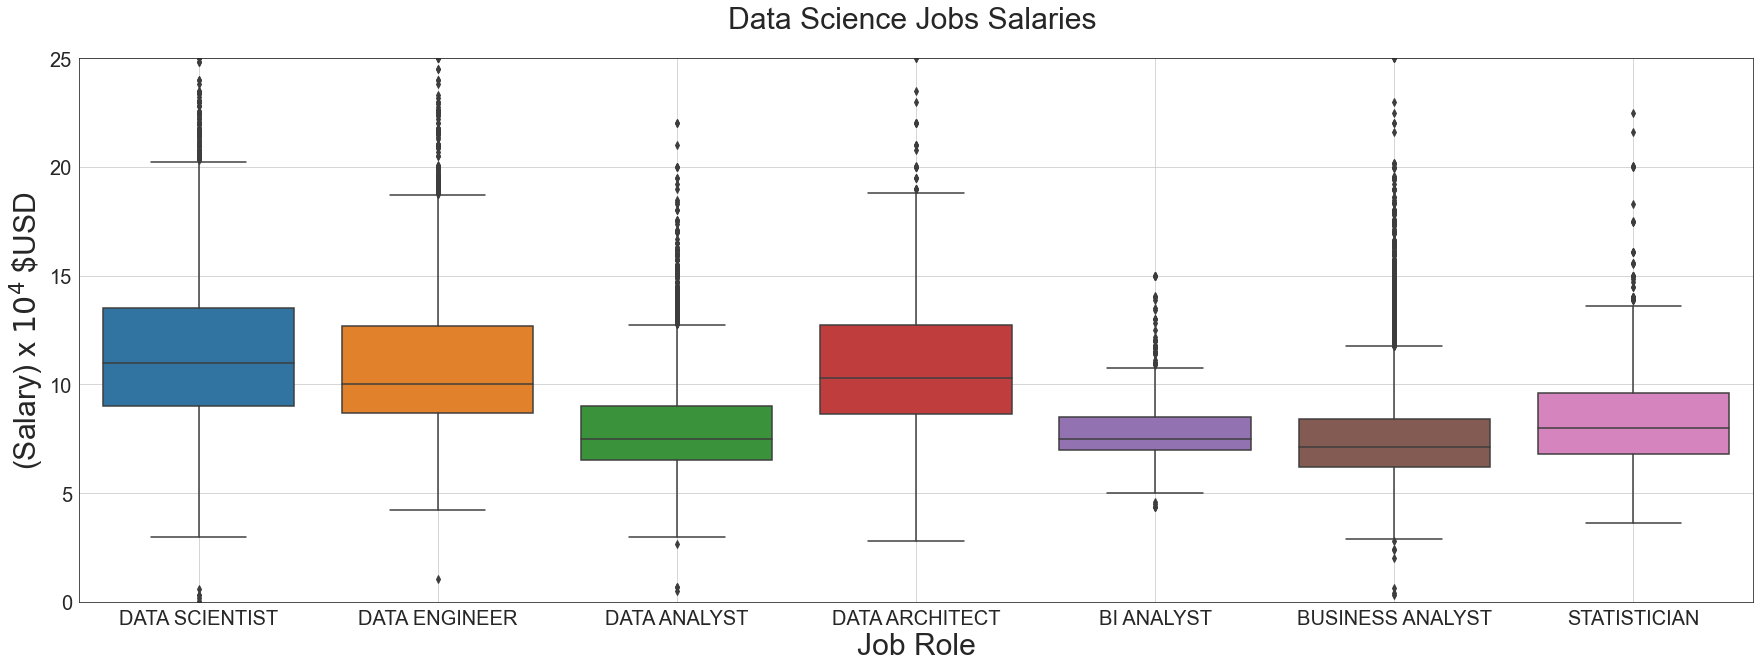

In [211]:
# Configura painel

fig = plt.figure(figsize=(30,10))
fig.set_facecolor('white')

# rescale

rescaled_salaries, rescaled_ticks, power = generate_scaled_ticks(h1bdata_df_preprocessed['salary'], 1e4, 10, start_with_0 = True )
h1bdata_df_preprocessed['rescaled_salary'] = rescaled_salaries

# plot

ax = sns.boxplot(data=h1bdata_df_preprocessed, y="rescaled_salary",x='title')


#title

ax.set_title("Data Science Jobs Salaries ", fontsize=30, pad = 30)

#labels

ax.set_ylabel(f"(Salary) x $10^{power}$ \$USD", fontsize = 30)
ax.set_xlabel("Job Role", fontsize = 30)

#ticks
offset= 2
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.ylim([0,2.5e1])

#grid

plt.grid()

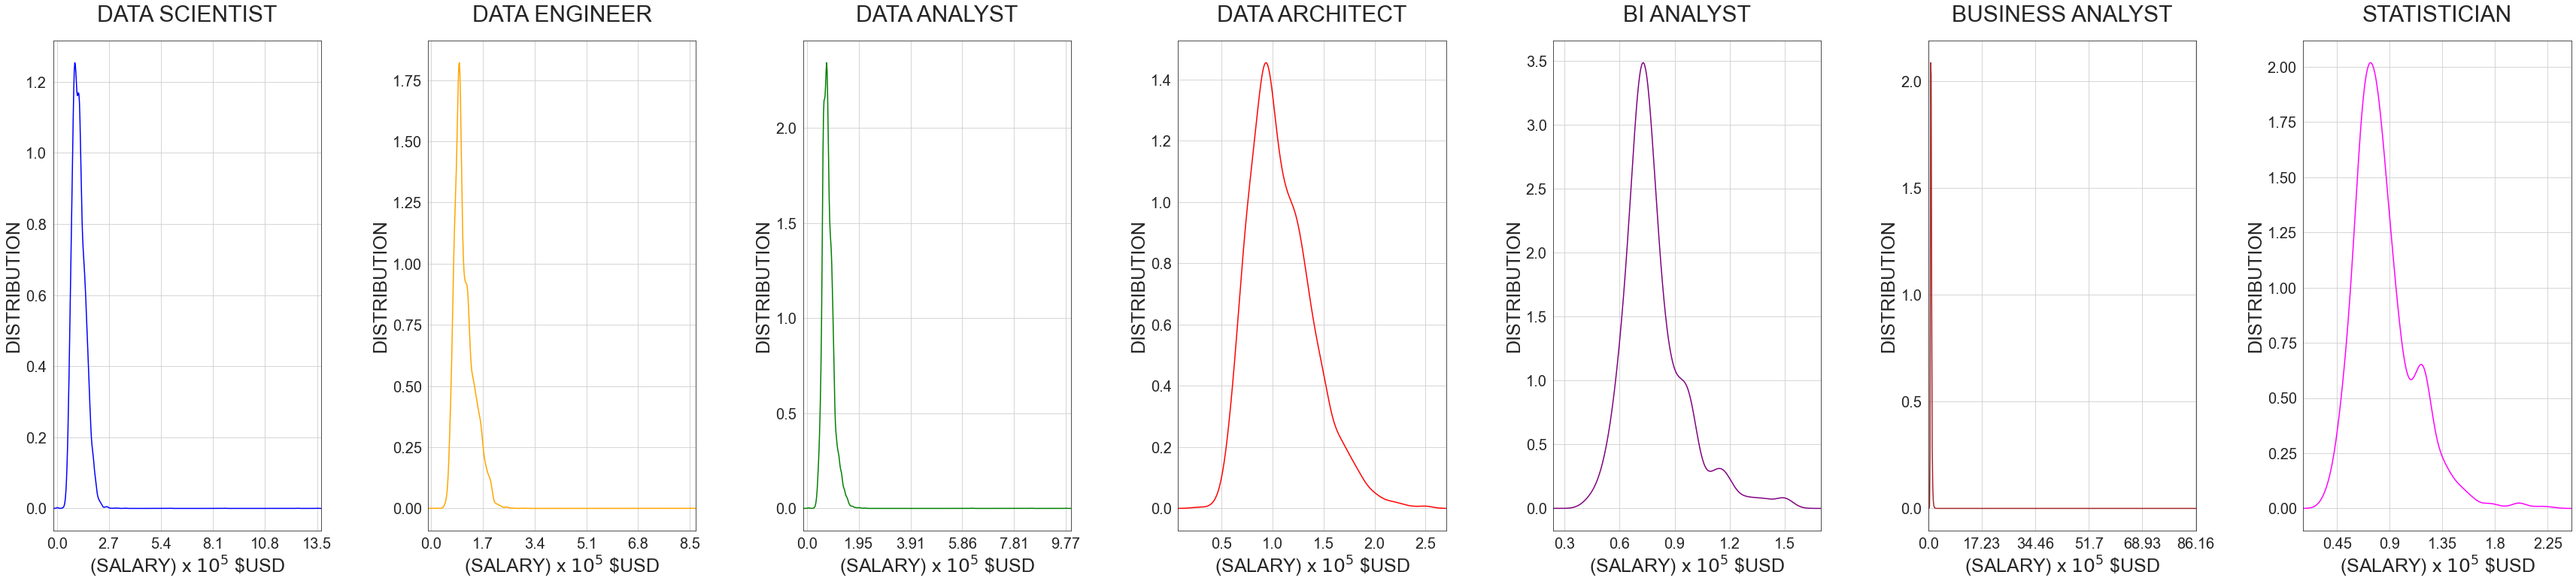

In [212]:
jobs = h1bdata_df_preprocessed['title'].unique()
fig, axs = plt.subplots(1,len(jobs), figsize=(60,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_facecolor('white')


for (i,job) in zip(range(0, len(jobs) ), jobs):
      

  # Carrega dados
     
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  scaled_salaries, scaled_ticks,  power = generate_scaled_ticks(salaries, 1e5, 5, start_with_0=True)
  max_sal = scaled_salaries.max()
  min_sal = scaled_salaries.min()
  
  
  #plot
  
  scaled_salaries.plot(kind='density', ax= axs[i],color=JOB_COLORS[i])
  
  # Configura ticks e labels
  
  offset = 0.2
  axs[i].set_xticks(scaled_ticks)
  axs[i].tick_params(axis='both', which='major', pad=5, labelsize= 20)
  axs[i].set_xticklabels( [str(i) for i in scaled_ticks])
  axs[i].set_xlabel(f"(SALARY) x $10^{power}$ \$USD", fontsize = 25)
  axs[i].set_ylabel("DISTRIBUTION", fontsize= 25)
  axs[i].set_title(f"{job}", fontsize = 30, pad = 25)
  axs[i].set_xlim([min_sal - offset, max_sal + offset])
  axs[i].grid(visible=True)
  

  


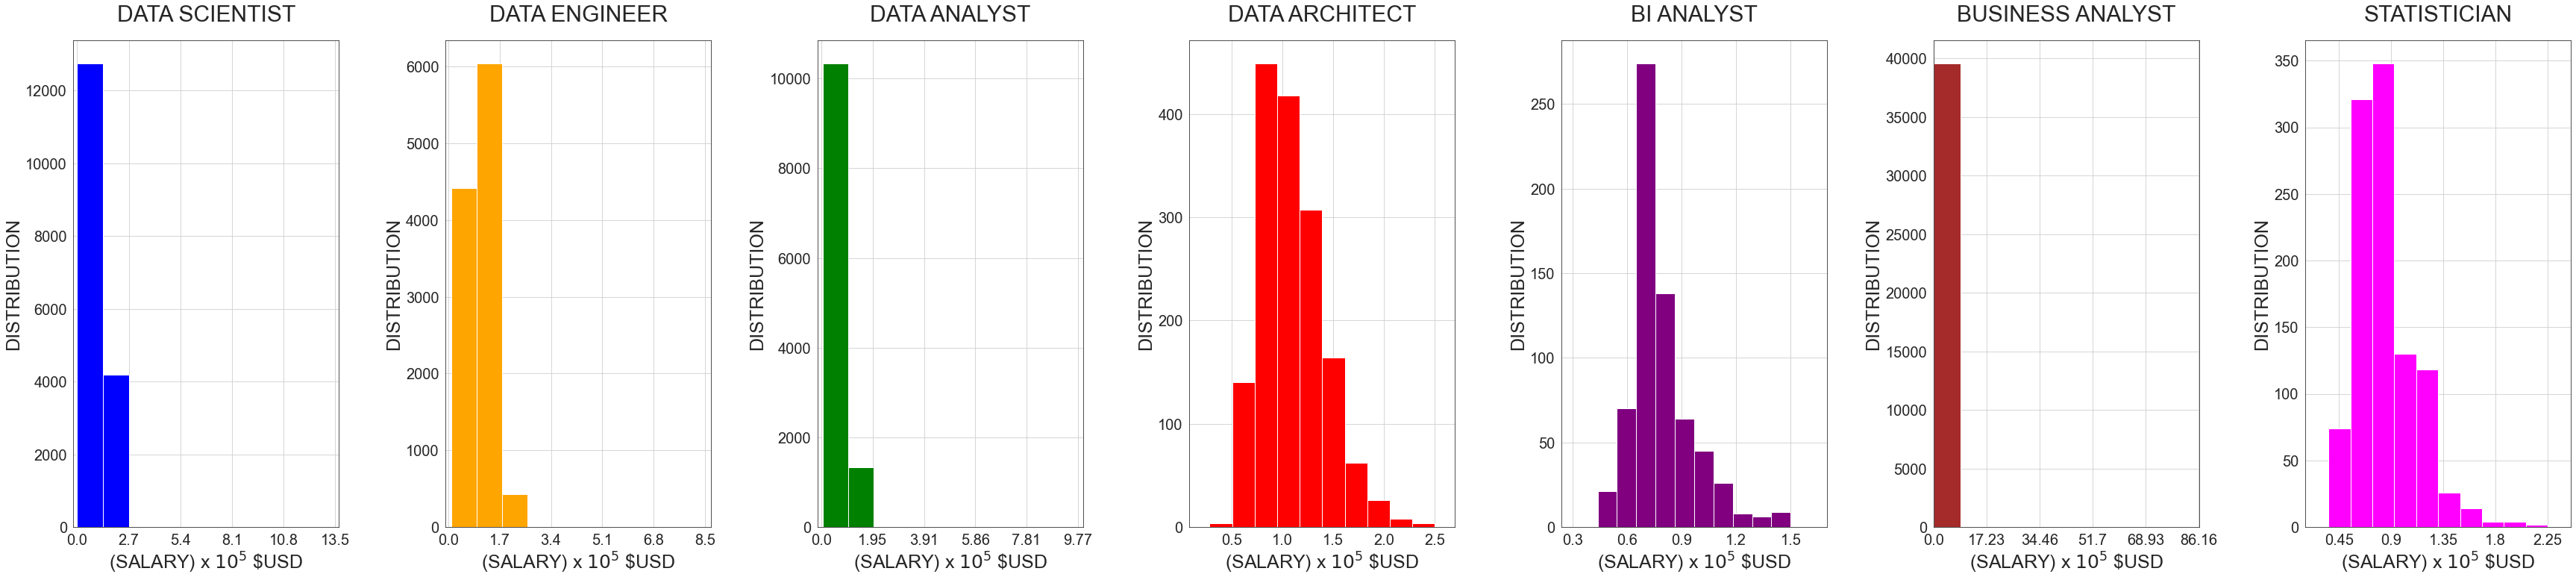

In [213]:
jobs = h1bdata_df_preprocessed['title'].unique()
fig, axs = plt.subplots(1,len(jobs), figsize=(60,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_facecolor('white')


for (i,job) in zip(range(0, len(jobs) ), jobs):
      

  # Carrega dados
     
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  scaled_salaries, scaled_ticks,  power = generate_scaled_ticks(salaries, 1e5, 5, start_with_0=True)
  max_sal = scaled_salaries.max()
  min_sal = scaled_salaries.min()
  
  #plot
  
  scaled_salaries.plot(kind='hist', ax= axs[i],color=JOB_COLORS[i])
  
  # Configura ticks e labels
  
  offset = 0.2
  axs[i].set_xticks(scaled_ticks)
  axs[i].tick_params(axis='both', which='major', pad=5, labelsize= 20)
  axs[i].set_xticklabels( [str(i) for i in scaled_ticks])
  axs[i].set_xlabel(f"(SALARY) x $10^{power}$ \$USD", fontsize = 25)
  axs[i].set_ylabel("DISTRIBUTION", fontsize= 25)
  axs[i].set_title(f"{job}", fontsize = 30, pad = 25)
  axs[i].set_xlim([min_sal - offset, max_sal + offset])
  axs[i].grid(visible=True)
  


Como podemos ver há muitos outliers, e eles estão distorcendo fortemente os dados, da a sua discrepância em relação aos valores representativos. Necessitamos elimina-los, como da última vez vamos checar se de fato todas as variáveis não são normais como visualmente aparentam.

In [214]:
for job in h1bdata_df_preprocessed['title'].unique():
    stat, p = kstest( h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title'] == job]['salary'], 'norm')
    alpha = 0.05
    
    if p > alpha:
        print(f"Os salarios para {job} SEGUEM uma distruição normal")
    else:
        print(f"Os salarios para {job} NÃO SEGUEM uma distruição normal")

Os salarios para DATA SCIENTIST NÃO SEGUEM uma distruição normal
Os salarios para DATA ENGINEER NÃO SEGUEM uma distruição normal
Os salarios para DATA ANALYST NÃO SEGUEM uma distruição normal
Os salarios para DATA ARCHITECT NÃO SEGUEM uma distruição normal
Os salarios para BI ANALYST NÃO SEGUEM uma distruição normal
Os salarios para BUSINESS ANALYST NÃO SEGUEM uma distruição normal
Os salarios para STATISTICIAN NÃO SEGUEM uma distruição normal


ok, então vamos filtrar os outliers pelo IRQ como fizemos no último deataset e das mesma forma, já que filtragem pela categorias que nos interessam são mais eficiente como pudemos ver.
Após a filtragem vamos checar como tudo ficou

In [215]:
h1bdata_df_preprocessed = DataFilter(filter_by="FILTER_OUTLIERS_CATEGORICALLY_BY_IRQ", col='salary', category_col='title').process_data(h1bdata_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



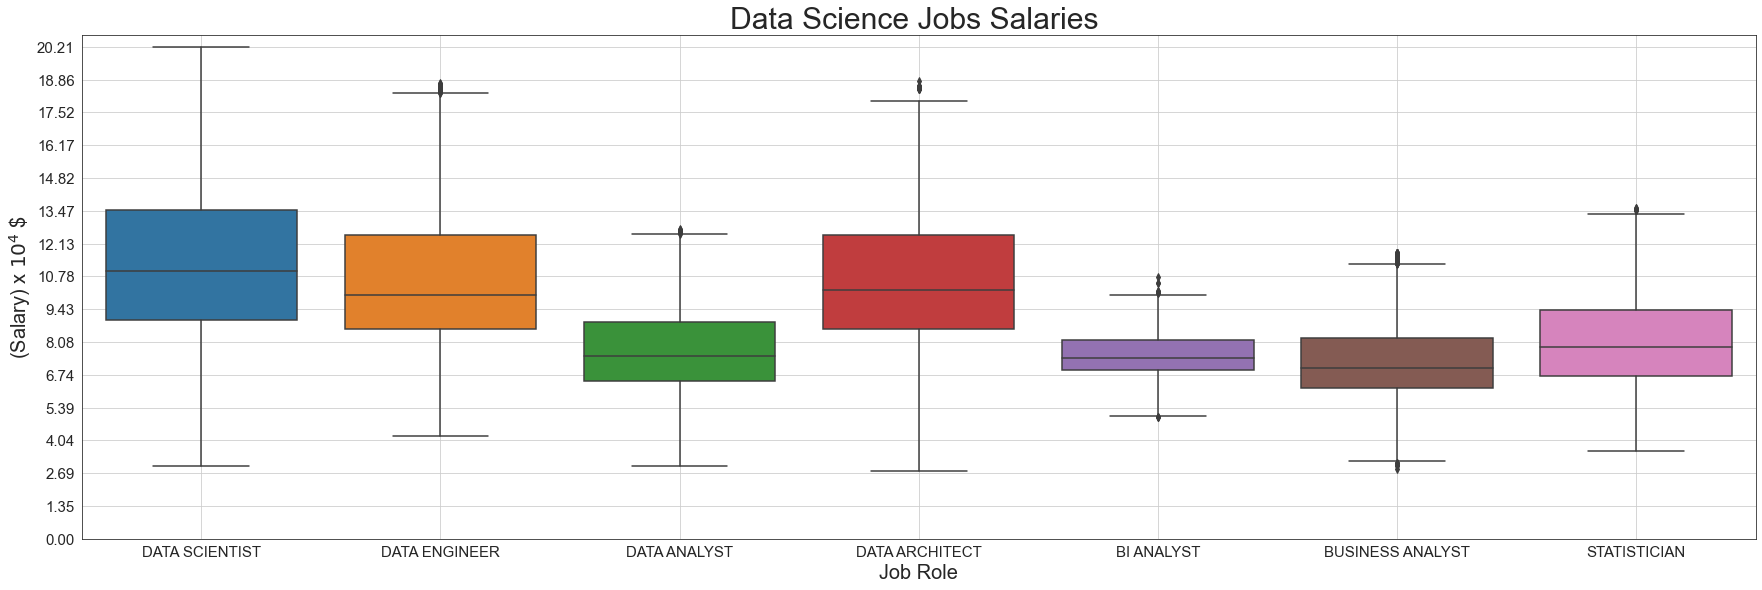

In [216]:
plt.figure(figsize=(30,20))

h1bdata_df_preprocessed_rescaled = h1bdata_df_preprocessed.copy()
salaries = h1bdata_df_preprocessed_rescaled['salary']
scaled_salaries, scaled_ticks, power = generate_scaled_ticks(salaries, 1e4, 15, start_with_0=True)
h1bdata_df_preprocessed['rescaled_salary'] = scaled_salaries

max_sal = np.max(scaled_ticks)
sns.boxplot(data=h1bdata_df_preprocessed, y="rescaled_salary",x='title')
sns.set_style('white')

offset = 0.5
plt.title("Data Science Jobs Salaries ", fontsize=30)
plt.ylabel(f"(Salary) x $10^{power}$ \$", fontsize=20)
plt.xlabel("Job Role", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(scaled_ticks, fontsize=15)

plt.ylim([0,  max_sal + offset])
plt.subplots_adjust(top=0.85, bottom=0.5)
plt.grid()

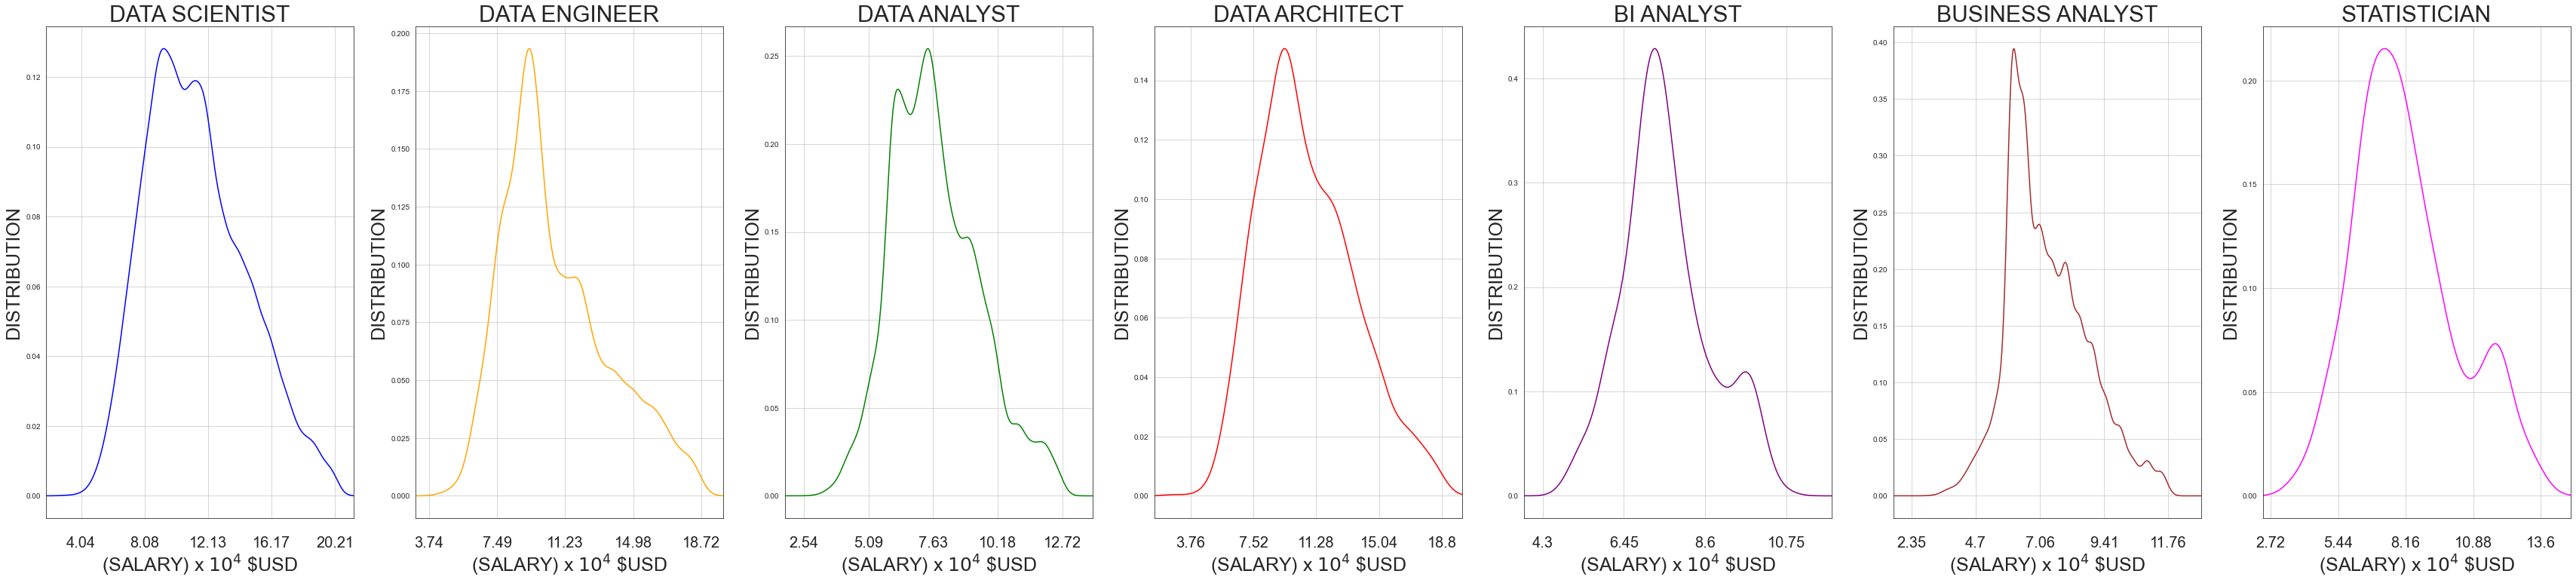

In [217]:
jobs = h1bdata_df_preprocessed['title'].unique()
fig, axs = plt.subplots(1,len(jobs), figsize=(60,12))
fig.set_facecolor('white')


for (i,job) in zip(range(0, len(jobs) ), jobs):
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  
#Rescaled Salaries

  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  scaled_salaries, scaled_ticks, power = generate_scaled_ticks(salaries, 1e4, 5, start_with_0=True)
  max_sal=  scaled_salaries.max()
  min_sal = scaled_salaries.min()
  
  #plot

  scaled_salaries.plot(kind='density', ax= axs[i],color=JOB_COLORS[i])
  
  
  #set ticks
  
  offset = 1.2
  
  axs[i].set_xticks( scaled_ticks )
  axs[i].tick_params( axis='x', which='major', pad=20 )
  axs[i].set_xticklabels( [ str(i) for i in scaled_ticks ], fontsize=20 )
  axs[i].set_xlabel( f"(SALARY) x $10^{power}$ \$USD", fontsize=25 )
  axs[i].set_ylabel( "DISTRIBUTION", fontsize= 25 )
  axs[i].set_title(f"{job}", fontsize=30)
  axs[i].set_xlim([ min_sal - offset, max_sal + offset ])
  axs[i].grid(visible=True)
  
  


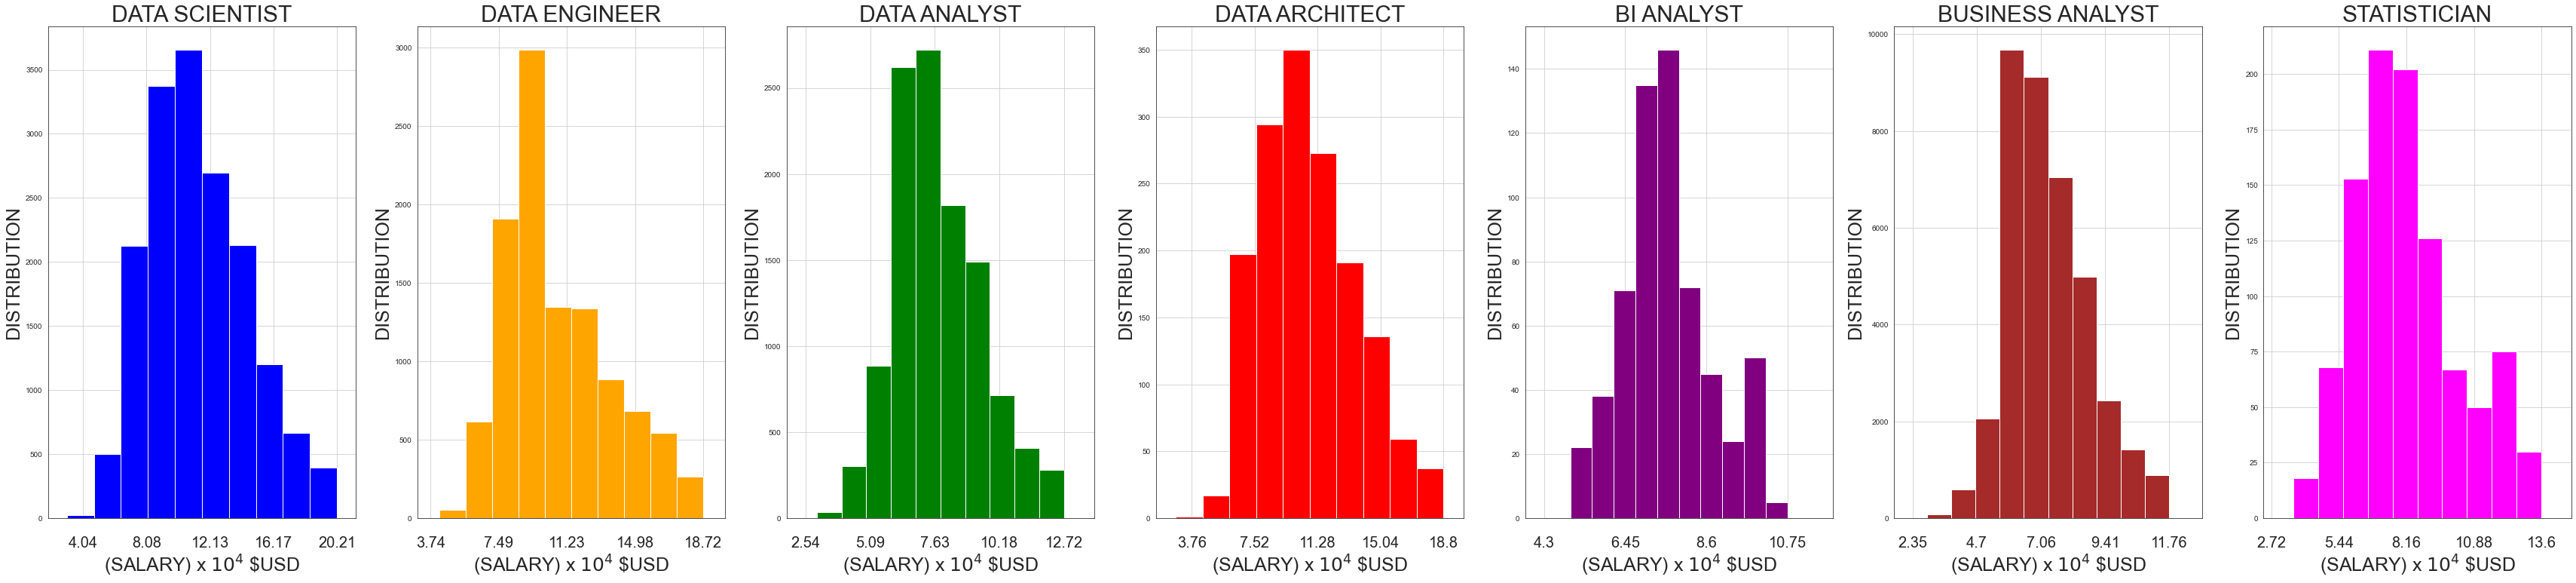

In [218]:
jobs = h1bdata_df_preprocessed['title'].unique()
fig, axs = plt.subplots(1,len(jobs), figsize=(60,12))
fig.set_facecolor('white')


for (i,job) in zip(range(0, len(jobs) ), jobs):
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  
  #Rescaled Salaries
  
  salaries = h1bdata_df_preprocessed[ h1bdata_df_preprocessed['title']== job ]['salary']
  scaled_salaries, scaled_ticks, power = generate_scaled_ticks(salaries, 1e4, 5, start_with_0=True)
  max_sal=  scaled_salaries.max()
  min_sal = scaled_salaries.min()
  
  #plot

  scaled_salaries.plot(kind='hist', ax= axs[i],color=JOB_COLORS[i])
  
  #set ticks
  
  offset = 1.2
  axs[i].set_xticks( scaled_ticks )
  axs[i].tick_params( axis='x', which='major', pad=20 )
  axs[i].set_xticklabels( [ str(i) for i in scaled_ticks ], fontsize=20 )
  axs[i].set_xlabel( f"(SALARY) x $10^{power}$ \$USD", fontsize=25 )
  axs[i].set_ylabel( "DISTRIBUTION", fontsize= 25 )
  axs[i].set_title(f"{job}", fontsize=30)
  axs[i].set_xlim([ min_sal - offset, max_sal + offset ])
  axs[i].grid(visible=True)
  

Outra coisa observada na avaliação preliminar foi que   a coluna de data não esta no formato de data e sim object, por isso precisamos converte-la e ajusta-la para formato brasileiro, já que a data está em formato americano.

In [219]:
#checkpoint
h1bdata_df_preprocessed['date']

0        04/09/2020
1        03/18/2016
2        02/18/2015
3        02/18/2015
4        03/16/2017
            ...    
82389    08/27/2022
82390    08/26/2022
82391    10/26/2015
82392    03/13/2019
82393    06/09/2018
Name: date, Length: 80150, dtype: object

In [220]:
#Converter coluna de de strig para datetime

h1_bdata_covert_date_to_datetime = DataTypeConversor(to_type='TO_DATETIME', col = 'date',actual_date_format="%m/%d/%Y", to_date_format = "%d/%m/%Y")
h1bdata_df_preprocessed = h1_bdata_covert_date_to_datetime.process_data(h1bdata_df_preprocessed)

Perform Data conversion... 
Data conversion DONE !



In [221]:
h1bdata_df_preprocessed['date']

0       2020-04-09
1       2016-03-18
2       2015-02-18
3       2015-02-18
4       2017-03-16
           ...    
82389   2022-08-27
82390   2022-08-26
82391   2015-10-26
82392   2019-03-13
82393   2018-06-09
Name: date, Length: 80150, dtype: datetime64[ns]

In [222]:
h1bdata_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80150 entries, 0 to 82393
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   company          80150 non-null  object        
 1   title            80150 non-null  object        
 2   salary           80150 non-null  float64       
 3   location         80150 non-null  object        
 4   date             80150 non-null  datetime64[ns]
 5   rescaled_salary  80150 non-null  float64       
 6   date_str         80150 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.9+ MB


outro ajuste a ser feito é um split na coluna location. Não faz sentido para nossa análise ter uma coluna  com estado,cidade.

In [223]:
h1bdata_df_preprocessed['location']

0            ORLANDO, FL
1          PALO ALTO, CA
2           FORT LEE, NJ
3           FORT LEE, NJ
4        JOHNS CREEK, GA
              ...       
82389       SOMERSET, NJ
82390       SOMERSET, NJ
82391      CHARLOTTE, NC
82392       BENSALEM, PA
82393       SOMERSET, NJ
Name: location, Length: 80150, dtype: object

In [224]:
#Faz divisão da coluna referente a localização para uma coluna refente a cidade e  outra ao estado nos EUA

h1_bdata_splitt_location_column = DataSplitter(delimiter = ',' , old_col = 'location', new_col1='city', new_col2='state')
h1bdata_df_preprocessed = h1_bdata_splitt_location_column.process_data(h1bdata_df_preprocessed)

Performing Data splitting...
Data splitting DONE !



In [225]:
h1bdata_df_preprocessed[['city','state']]

city state
0          ORLANDO    FL
1        PALO ALTO    CA
2         FORT LEE    NJ
3         FORT LEE    NJ
4      JOHNS CREEK    GA
...            ...   ...
82389     SOMERSET    NJ
82390     SOMERSET    NJ
82391    CHARLOTTE    NC
82392     BENSALEM    PA
82393     SOMERSET    NJ

[80150 rows x 2 columns]

Contudo ainda existe um pequeno problema, algumas colunas estavam formatadas incorretamente. Ou com um nome contendo o estado ou com a  cidade correspondente na coluna onde deveriam estar apenas siglas dos estados americanos.


In [226]:
h1bdata_df_preprocessed['state'].unique()

array([' FL', ' CA', ' NJ', ' GA', ' IL', ' WI', ' TX', ' MA', ' MI',
       ' WA', ' DE', ' MD', ' NY', ' VA', ' MO', ' NC', ' TN', ' MN',
       ' IN', ' PA', ' OH', ' IA', ' AZ', ' CO', ' UT', ' LA', ' OK',
       ' AR', ' OR', ' KS', ' NH', ' NV', ' DC', ' NE', ' CT', ' PR', '',
       ' KY', ' SC', ' AL', ' NM', ' MS', ' ND', ' RI', ' ID',
       ' IL 60654', ' HI', ' WY', ' SD', ' VT', ' ME', ' SHOREVIEW',
       ' NJ 07642', ' D.C.', ' WV', 'NEW YORK', ' VT.', ' SAN RAMON',
       ' ATLANTA', ' MT', ' CA 95134', ' TX 77002', ' 5TH FL', ' AK',
       ' D.C', ' DC 20006', ' VI', ' MINNEAPOLIS', 'LONG ISLAND CITY',
       ' ETS DRIVE', ' ', ' MO 63105', ' WASHINGTON', ' NEW YORK'],
      dtype=object)

sendo assim feizmos um mapeamento e a substituição para corrigir esse problema

In [227]:
# Faz substituição usando um mapa

map_replace_states = DataReplacer(task="MAPREPLACING", on_col='state', map = MAP_USA_STATES_H1BDATA)
h1bdata_df_preprocessed = map_replace_states.process_data(h1bdata_df_preprocessed)

Performing Data Replacement... 
Data Replacement DONE !



In [228]:
h1bdata_df_preprocessed['state'].unique()

array(['FL', 'CA', 'NJ', 'GA', 'IL', 'WI', 'TX', 'MA', 'MI', 'WA', 'DE',
       'MD', 'NY', 'VA', 'MO', 'NC', 'TN', 'MN', 'IN', 'PA', 'OH', 'IA',
       'AZ', 'CO', 'UT', 'LA', 'OK', 'AR', 'OR', 'KS', 'NH', 'NV', 'DC',
       'NE', 'CT', 'PR', 'UNKNOWN', 'KY', 'SC', 'AL', 'NM', 'MS', 'ND',
       'RI', 'ID', 'HI', 'WY', 'SD', 'VT', 'ME', 'WV', 'MT', 'AK', 'VI'],
      dtype=object)

não estamos interessandos em registros de localiade desconhecida, vamos então elimina-los.

In [229]:
h1bdata_df_preprocessed  = DataFilter(filter_by="FILTER_EQUAL_VALUE", by_value='unknown', col='state').process_data(h1bdata_df_preprocessed)

Performing Data Filtering... 
Data Filtering DONE ! 



In [230]:
h1bdata_df_preprocessed['state'].unique()

array(['FL', 'CA', 'NJ', 'GA', 'IL', 'WI', 'TX', 'MA', 'MI', 'WA', 'DE',
       'MD', 'NY', 'VA', 'MO', 'NC', 'TN', 'MN', 'IN', 'PA', 'OH', 'IA',
       'AZ', 'CO', 'UT', 'LA', 'OK', 'AR', 'OR', 'KS', 'NH', 'NV', 'DC',
       'NE', 'CT', 'PR', 'UNKNOWN', 'KY', 'SC', 'AL', 'NM', 'MS', 'ND',
       'RI', 'ID', 'HI', 'WY', 'SD', 'VT', 'ME', 'WV', 'MT', 'AK', 'VI'],
      dtype=object)

In [231]:
h1bdata_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80150 entries, 0 to 82393
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   company          80150 non-null  object        
 1   title            80150 non-null  object        
 2   salary           80150 non-null  float64       
 3   date             80150 non-null  datetime64[ns]
 4   rescaled_salary  80150 non-null  float64       
 5   date_str         80150 non-null  object        
 6   city             80150 non-null  object        
 7   state            80150 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 5.5+ MB


In [232]:
h1bdata_df_preprocessed.head(20)

company           title   salary       date  \
0   FORTRESS INFORMATION SECURITY LLC  DATA SCIENTIST  45980.0 2020-04-09   
1               PERCOLATA CORPORATION  DATA SCIENTIST  46060.0 2016-03-18   
2                MY LIFE REGISTRY LLC  DATA SCIENTIST  47960.0 2015-02-18   
3                MY LIFE REGISTRY LLC  DATA SCIENTIST  47960.0 2015-02-18   
4      BIG DATA ANALYTICS TRADING INC  DATA SCIENTIST  50000.0 2017-03-16   
5                     YONO HEALTH INC  DATA SCIENTIST  50220.0 2017-02-28   
6                           EONUM INC  DATA SCIENTIST  51100.0 2021-04-08   
7                           EONUM INC  DATA SCIENTIST  51100.0 2021-04-12   
8                           EONUM INC  DATA SCIENTIST  51100.0 2021-04-16   
9                 OPEN DATA GROUP INC  DATA SCIENTIST  51860.0 2019-02-28   
11           SRIVEN SYSTEMS OF TX INC  DATA SCIENTIST  52000.0 2018-03-07   
12   NECTO-NET CONTACT MANAGEMENT INC  DATA SCIENTIST  52300.0 2017-03-16   
13             THE BALMORAL GROUP LLC  DATA SCIENTIST  58920.0 2018-03-21   
14           BLINKAI TECHNOLOGIES INC  DATA SCIENTIST  59340.0 2019-03-12   
15            MESONS TECHNOLOGIES LLC  DATA SCIENTIST  60000.0 2022-05-18   
16          ADECCO GROUP NA/MODIS INC  DATA SCIENTIST  60000.0 2017-06-13   
17                           LTLW INC  DATA SCIENTIST  60080.0 2021-04-02   
18                      ARIES APP INC  DATA SCIENTIST  60140.0 2017-03-06   
19   CLINPHARMA CLINICAL RESEARCH LLC  DATA SCIENTIST  60360.0 2017-03-10   
20                      DSFEDERAL INC  DATA SCIENTIST  60420.0 2019-03-05   

    rescaled_salary    date_str          city state  
0             4.598  09/04/2020       ORLANDO    FL  
1             4.606  18/03/2016     PALO ALTO    CA  
2             4.796  18/02/2015      FORT LEE    NJ  
3             4.796  18/02/2015      FORT LEE    NJ  
4             5.000  16/03/2017   JOHNS CREEK    GA  
5             5.022  28/02/2017     SUNNYVALE    CA  
6             5.110  08/04/2021        IRVINE    CA  
7             5.110  12/04/2021        IRVINE    CA  
8             5.110  16/04/2021        IRVINE    CA  
9             5.186  28/02/2019       CHICAGO    IL  
11            5.200  07/03/2018       MADISON    WI  
12            5.230  16/03/2017       HOUSTON    TX  
13            5.892  21/03/2018   WINTER PARK    FL  
14            5.934  12/03/2019        BOSTON    MA  
15            6.000  18/05/2022  JACKSONVILLE    FL  
16            6.000  13/06/2017      DEARBORN    MI  
17            6.008  02/04/2021   LOS ANGELES    CA  
18            6.014  06/03/2017      BELLEVUE    WA  
19            6.036  10/03/2017    WILMINGTON    DE  
20            6.042  05/03/2019     ROCKVILLE    MD

pre-processamento no h1bdata ok, vamos aos dataset relativos a descriptions: Glassdoor e kaggle

### Jobs Description
Faremos agora a verificação dos datasets relativos  a descrições de vagas de trabalho anunciadas nas principais plataformas (kaagle, linkedin, dentre outros). É importante destacar que ambos os datasets são de vagas restrito nos EUA. Apesar disso, eles podem mostrar um tendencia global já que o mercado dos EUA tem forte influência global

In [233]:
job_description_kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    790 non-null    int64 
 1   title         790 non-null    object
 2   company       790 non-null    object
 3   announcement  790 non-null    object
 4   description   790 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.0+ KB


In [234]:
job_description_kaggle_df.head(20)

Unnamed: 0                                              title  \
0            0         Senior Analyst, Data Science and Analytics   
1            1                              Senior Data Scientist   
2            2                          Lead Data Science Analyst   
3            3                                Data Science Intern   
4            4                                     Data Scientist   
5            5          Senior Solutions Architect (Data Science)   
6            6                              Senior Data Scientist   
7            7  Data Scientist - Research, Development & Const...   
8            8                Data Science Manager - S&A Strategy   
9            9                    Senior/Principal Data Scientist   
10          10                                     Data Scientist   
11          11                               Data Science Analyst   
12          12       Senior Data Scientist - Knowledge Management   
13          13                         Data Scientist, Consultant   
14          14                              Senior-Data Scientist   
15          15                               Staff Data Scientist   
16          16                            Data Science Internship   
17          17  Undergrad Intern – Data Science Program (Summe...   
18          18  Data Science, Department of Information Techno...   
19          19                                     Data Scientist   

                                     company         announcement  \
0                                 TransUnion             The Muse   
1                     Grubhub Holdings, Inc.         ZipRecruiter   
2                Discover Financial Services             LinkedIn   
3                              AbelsonTaylor         Startup Jobs   
4          NORC at the University of Chicago          SimplyHired   
5                             The Trade Desk             LinkedIn   
6                                 Tango Card         Startup Jobs   
7                                        HFR             LinkedIn   
8                                   Deloitte             Mendeley   
9                                   Lumicity             LinkedIn   
10                       Booz Allen Hamilton  Booz Allen Hamilton   
11                     JLT Employee Benefits               Adzuna   
12                                Intelletec             LinkedIn   
13                                Guidehouse                Nexxt   
14                                      AT&T       CareerCast.com   
15                                     Waymo                Waymo   
16                 Bureau of Fiscal Services           Salary.com   
17                             Amgen Careers        Amgen Careers   
18  The University of Maryland Global Campus               Adzuna   
19                              confidential         Apex Systems   

                                          description  
0   TransUnion's Job Applicant Privacy Notice  Wha...  
1   About The Opportunity  We're all about connect...  
2   Discover. A brighter future.  With us, you’ll ...  
3   Are you a 2023 college graduate or rising coll...  
4   JOB DESCRIPTION:  At NORC, Data Scientists pla...  
5   The Trade Desk is a global technology company ...  
6   The JobTango Card is hiring our first ever Sen...  
7   Company Description: HFR, Inc. (HFR) was found...  
8   Data Science Manager  SFL Scientific, a Deloit...  
9   Senior Data Scientist AND Principal Data Scien...  
10  Data Scientist  The Opportunity...  As a Data ...  
11  At Mercer, we deliver innovative solutions tha...  
12  Leading NYC Private Equity firm focused on Pha...  
13  Job Family  Data Science Consulting...  Travel...  
14  Join AT&T and reimagine the communications and...  
15  Waymo is an autonomous driving technology comp...  
16  Summary  The Office of the Chief Data Officer ...  
17  HOW MIGHT YOU DEFY IMAGINATION?  Do more with ...  
18  Data Science Department of Informati

In [235]:
#Retitrando coluna indesejada
job_description_kaggle_df.drop('Unnamed: 0', axis = 1, inplace=True)

Nesse dataset, é interssante somente simplificar os título dos jobs. Pois queremos apenas usa-lo para descobrir o que é mais requqerido nas vagas anunciadas.  Um mapeamento cuidadoso fora feito e colocado num arquivo csv, em seguida esse mesmo arquivo fora usado para  realizar a simplificação,  não foi possível simplificar alguns títulos dado a falta de clareza que alguns expressavam e o fato de alguns deles nem mesmo parecer ser  vagas de  trabalhos em datascience, então simplimento o eliminamos  no pré-processamento.

In [236]:
job_title_kaggle_map = CsvReader(DATASET_PATH + "Jobs_descriptions_EUA/job_role_mapping/mapa_job_roles_kaggle.csv" , delimiter=';').load_data()
job_title_kaggle_map = dict(job_title_kaggle_map[['Original','Simplyfied']].values)
job_title_kaggle_map = {k.upper(): v.upper() for k,v in  job_title_kaggle_map.items()}
job_title_kaggle_map

#Simplifying job roles on kaggle dataset Preprocessor

simplify_job_role_on_glassdorr_db = DataReplacer(task="MAPREPLACING", on_col="title", map = job_title_kaggle_map)

# Eliminate useless titles by frequency  Preprocessor

useless_title_eliminator = DataFilter(filter_by="FREQ_LOWER_THAN_VALUE", col='title', by_value= 2)


#Perform preprocessing
job_description_kaggle_preprocessors = [ simplify_job_role_on_glassdorr_db, useless_title_eliminator ]
job_description_kaggle_preprocessing =  PreProcessing( pre_processors= job_description_kaggle_preprocessors)
job_description_kaggle_df_preprocessed =  job_description_kaggle_preprocessing.process_data(job_description_kaggle_df)


job_description_kaggle_df_preprocessed['title'].value_counts()


Performing Data Replacement... 
Data Replacement DONE !

Performing Data Filtering... 
Data Filtering DONE ! 



DATA ANALYST       438
DATA SIENTIST      270
DATA SPECIALIST     22
DATA ENGINEER        4
Name: title, dtype: int64

In [237]:
job_description_kaggle_df_preprocessed.head(20)

title                                  company  \
0    DATA ANALYST                               TransUnion   
1   DATA SIENTIST                   Grubhub Holdings, Inc.   
3   DATA SIENTIST                            AbelsonTaylor   
4   DATA SIENTIST        NORC at the University of Chicago   
6   DATA SIENTIST                               Tango Card   
7   DATA SIENTIST                                      HFR   
9   DATA SIENTIST                                 Lumicity   
10  DATA SIENTIST                      Booz Allen Hamilton   
11   DATA ANALYST                    JLT Employee Benefits   
12  DATA SIENTIST                               Intelletec   
13  DATA SIENTIST                               Guidehouse   
14  DATA SIENTIST                                     AT&T   
15  DATA SIENTIST                                    Waymo   
19  DATA SIENTIST                             confidential   
21  DATA SIENTIST                                 Sedgwick   
22  DATA SIENTIST  Blue Cross Blue Shield of Massachusetts   
24   DATA ANALYST                            HR&A Advisors   
27   DATA ANALYST                       State of Louisiana   
28  DATA SIENTIST  General Dynamics Information Technology   
30  DATA SIENTIST                               CVS Health   

                                    announcement  \
0                                       The Muse   
1                                   ZipRecruiter   
3                                   Startup Jobs   
4                                    SimplyHired   
6                                   Startup Jobs   
7                                       LinkedIn   
9                                       LinkedIn   
10                           Booz Allen Hamilton   
11                                        Adzuna   
12                                      LinkedIn   
13                                         Nexxt   
14                                CareerCast.com   
15                                         Waymo   
19                                  Apex Systems   
21                                  CDO Magazine   
22  Blue Cross Blue Shield Of Massachusetts Jobs   
24                        HR&A Advisors - JazzHR   
27                               Government Jobs   
28                                Clearance Jobs   
30                                    CVS Health   

                                          description  
0   TransUnion's Job Applicant Privacy Notice  Wha...  
1   About The Opportunity  We're all about connect...  
3   Are you a 2023 college graduate or rising coll...  
4   JOB DESCRIPTION:  At NORC, Data Scientists pla...  
6   The JobTango Card is hiring our first ever Sen...  
7   Company Description: HFR, Inc. (HFR) was found...  
9   Senior Data Scientist AND Principal Data Scien...  
10  Data Scientist  The Opportunity...  As a Data ...  
11  At Mercer, we deliver innovative solutions tha...  
12  Leading NYC Private Equity firm focused on Pha...  
13  Job Family  Data Science Consulting...  Travel...  
14  Join AT&T and reimagine the communications and...  
15  Waymo is an autonomous driving technology comp...  
19  Contract to Hire Data Scientist  Send all resu...  
21  Location: TENNESSEE, UNITED STATES  Job descri...  
22  This role is eligible for our eWorker, Mobile ...  
24  ABOUT US |   HR&A Advisors, Inc. (HR&A) is an ...  
27  Baton Rouge Community College (BRCC) seeks to ...  
28  REQ#: RQ137979 Travel Required: None Requisiti...  
30  Job Description Aetna Resources LLC, a CVS Hea...

No dataset vindo do Kaggle o trabalho é o mesmo, a diferença é que tem uma etapa a mais antes da realização da substituição por mapeamento. Antes   simplificamos os nome dos títulos dos job por palavra chaves que nele contém para depois fazer a substituição por mapeamento para depois eliminar os títulos que não interessam. Além disso algumas substituições serão feitas para os dados ficar mais claros, onde está com "-1" significa que não se tem aquele dado, então ele será subsituído por 'unknown' para ficar mais explícito

In [238]:
job_description_glassdoor_df

Unnamed: 0  index                                          Job Title  \
0              0      0                              Senior Data Scientist   
1              1      1                  Data Scientist, Product Analytics   
2              2      2                               Data Science Manager   
3              3      3                                       Data Analyst   
4              4      4                             Director, Data Science   
...          ...    ...                                                ...   
3904        3904   4375                                  AWS Data Engineer   
3905        3905   4376                              Data Analyst â Junior   
3906        3906   4377                   Security Analytics Data Engineer   
3907        3907   4378                   Security Analytics Data Engineer   
3908        3908   4379  Patient Safety Physician or Safety Scientist -...   

                   Salary Estimate  \
0     $111K-$181K (Glassdoor est.)   
1     $111K-$181K (Glassdoor est.)   
2     $111K-$181K (Glassdoor est.)   
3     $111K-$181K (Glassdoor est.)   
4     $111K-$181K (Glassdoor est.)   
...                            ...   
3904   $55K-$112K (Glassdoor est.)   
3905   $55K-$112K (Glassdoor est.)   
3906   $55K-$112K (Glassdoor est.)   
3907   $55K-$112K (Glassdoor est.)   
3908   $55K-$112K (Glassdoor est.)   

                                        Job Description  Rating  \
0     ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5   
1     At Noom, we use scientifically proven methods ...     4.5   
2     Decode_M\n\nhttps://www.decode-m.com/\n\nData ...    -1.0   
3     Sapphire Digital seeks a dynamic and driven mi...     3.4   
4     Director, Data Science - (200537)\nDescription...     3.4   
...                                                 ...     ...   
3904  About Us\n\nTachyon Technologies is a Digital ...     4.4   
3905  Job description\nInterpret data, analyze resul...     5.0   
3906  Job DescriptionThe Security Analytics Data Eng...     3.8   
3907  The Security Analytics Data Engineer will inte...     4.0   
3908  Help us transform patients' lives.\nAt UCB, we...     3.7   

                               Company Name       Location      Headquarters  \
0                               Hopper\n3.5   New York, NY  Montreal, Canada   
1                              Noom US\n4.5   New York, NY      New York, NY   
2                                  Decode_M   New York, NY      New York, NY   
3                     Sapphire Digital\n3.4  Lyndhurst, NJ     Lyndhurst, NJ   
4           United Entertainment Group\n3.4   New York, NY      New York, NY   
...                                     ...            ...               ...   
3904              Tachyon Technologies\n4.4     Dublin, OH        Irving, TX   
3905  Staffigo Technical Services, LLC\n5.0   Columbus, OH     Woodridge, IL   
3906                    PDS Tech, Inc.\n3.8     Dublin, OH        Irving, TX   
3907        Data Resource Technologies\n4.0     Dublin, OH         Omaha, NE   
3908                               UCB\n3.7     Slough, OH  Brussel, Belgium   

                         Size  Founded  Type of ownership  \
0       501 to 1000 employees     2007  Company - Private   
1      1001 to 5000 employees     2008  Company - Private   
2           1 to 50 employees       -1            Unknown   
3        201 to 500 employees     2019  Company - Private   
4         51 to 200 employees     2007  Company - Private   
...                       ...      ...                ...   
3904     201 to 500 employees     2011  Company - Private   
3905      51 to 200 employees     2008  Company - Private   
3906  5001 to 10000 employees     1977  Company - Private   
3907        1 to 50 employees       -1  Company - Private   
3908  5001 to 10000 employees       -1   Company - Public   

                       Industry                     Sector  \
0               Travel Agencies           Travel & 

In [239]:
job_description_glassdoor_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [240]:
# Replace if contains

glassdoor_job_replace_if_contains = DataReplacer(task="IFCONTAINSREPLACNING", on_col= 'Job Title', values = DS_JOBS_GLASSDOOR_JOB_DESCRIPTION)


#Simplifying titles on glassdoor database


glassdoor_job_title_simplifier = DataReplacer(task='MAPREPLACING', on_col = 'Job Title', map = JOB_ROLES_MAP_GLASSDOOR_JOB_DESCRIPTION)


#eliminate unfrequent values

glassdoor_unfrequent_title_elimination = DataFilter(filter_by = "FREQ_LOWER_THAN_VALUE", col='Job Title', by_value= 108)


#glassdoor preprocessing


job_description_glassdoor_preprocessors = [ glassdoor_job_replace_if_contains, glassdoor_job_title_simplifier, glassdoor_unfrequent_title_elimination ]
job_description_glassdoor_preprocessing =  PreProcessing( pre_processors= job_description_glassdoor_preprocessors)
job_description_glassdoor_preprocessed =  job_description_glassdoor_preprocessing.process_data(job_description_glassdoor_df)
job_description_glassdoor_preprocessed.replace(-1, 'unknown', inplace=True)
job_description_glassdoor_preprocessed.replace('-1', 'unknown', inplace=True)



Performing Data Replacement... 
Data Replacement DONE !

Performing Data Replacement... 
Data Replacement DONE !

Performing Data Filtering... 
Data Filtering DONE ! 



In [241]:
job_description_glassdoor_preprocessed

index       Job Title               Salary Estimate  \
0         0  DATA SCIENTIST  $111K-$181K (Glassdoor est.)   
1         1  DATA SCIENTIST  $111K-$181K (Glassdoor est.)   
2         2  DATA SCIENTIST  $111K-$181K (Glassdoor est.)   
3         3    DATA ANALYST  $111K-$181K (Glassdoor est.)   
4         4  DATA SCIENTIST  $111K-$181K (Glassdoor est.)   
...     ...             ...                           ...   
3903   4374   DATA ENGINEER   $55K-$112K (Glassdoor est.)   
3904   4375   DATA ENGINEER   $55K-$112K (Glassdoor est.)   
3905   4376    DATA ANALYST   $55K-$112K (Glassdoor est.)   
3906   4377   DATA ENGINEER   $55K-$112K (Glassdoor est.)   
3907   4378   DATA ENGINEER   $55K-$112K (Glassdoor est.)   

                                        Job Description   Rating  \
0     ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...      3.5   
1     At Noom, we use scientifically proven methods ...      4.5   
2     Decode_M\n\nhttps://www.decode-m.com/\n\nData ...  unknown   
3     Sapphire Digital seeks a dynamic and driven mi...      3.4   
4     Director, Data Science - (200537)\nDescription...      3.4   
...                                                 ...      ...   
3903  ApTask is a leading staffing and recruitment c...      3.9   
3904  About Us\n\nTachyon Technologies is a Digital ...      4.4   
3905  Job description\nInterpret data, analyze resul...      5.0   
3906  Job DescriptionThe Security Analytics Data Eng...      3.8   
3907  The Security Analytics Data Engineer will inte...      4.0   

                               Company Name       Location      Headquarters  \
0                               Hopper\n3.5   New York, NY  Montreal, Canada   
1                              Noom US\n4.5   New York, NY      New York, NY   
2                                  Decode_M   New York, NY      New York, NY   
3                     Sapphire Digital\n3.4  Lyndhurst, NJ     Lyndhurst, NJ   
4           United Entertainment Group\n3.4   New York, NY      New York, NY   
...                                     ...            ...               ...   
3903                            ApTask\n3.9     Dublin, OH        Iselin, NJ   
3904              Tachyon Technologies\n4.4     Dublin, OH        Irving, TX   
3905  Staffigo Technical Services, LLC\n5.0   Columbus, OH     Woodridge, IL   
3906                    PDS Tech, Inc.\n3.8     Dublin, OH        Irving, TX   
3907        Data Resource Technologies\n4.0     Dublin, OH         Omaha, NE   

                         Size  Founded  Type of ownership  \
0       501 to 1000 employees     2007  Company - Private   
1      1001 to 5000 employees     2008  Company - Private   
2           1 to 50 employees  unknown            Unknown   
3        201 to 500 employees     2019  Company - Private   
4         51 to 200 employees     2007  Company - Private   
...                       ...      ...                ...   
3903     201 to 500 employees     2010  Company - Private   
3904     201 to 500 employees     2011  Company - Private   
3905      51 to 200 employees     2008  Company - Private   
3906  5001 to 10000 employees     1977  Company - Private   
3907        1 to 50 employees  unknown  Company - Private   

                       Industry                  Sector  \
0               Travel Agencies        Travel & Tourism   
1     Health, Beauty, & Fitness       Consumer Services   
2                       unknown                 unknown   
3                      Internet  Information Technology   
4       Advertising & Marketing       Business Services   
...                         ...                     ...   
3903                IT Services  Information Technology   
3904                IT Services  Information Technology   
3905                IT Services  Information Technology   
3906     Staffing & Outsourcing       Business Services   
3907                 Accounting      Accounting & Legal   

                         Revenue                     

In [242]:
job_description_glassdoor_preprocessed['Job Title'].value_counts()

DATA SCIENTIST               1151
DATA ANALYST                  988
DATA ENGINEER                 742
RESEARCHER                    217
MACHINE LEARNING ENGINEER     108
Name: Job Title, dtype: int64

#### Preprocessamento das descrições de trabalho

In [243]:
# Relizar preprocesssamento das descrições no dataset do glassdoor

glassdoor_text_processor = TextProcessor(col='Job Description')
glassdoor_descrptions_preprocessed = glassdoor_text_processor.process_data(job_description_glassdoor_df)

# Realizar o preprocessamento no dataset do Kaggle

kaggle_text_processor = TextProcessor(col='description')
kaggle_descriptions_preprocessed = kaggle_text_processor.process_data(job_description_kaggle_df)

#Salva preprocessamento

job_description_kaggle_df_preprocessed['description'] = kaggle_descriptions_preprocessed['description']
job_description_glassdoor_preprocessed['Job Description'] = glassdoor_descrptions_preprocessed['Job Description']


Removing Especial Characters... 
Removing Stop Words... 
Tokenizing Descriptions... 
Stemming Descriptions... 
Converting all to a single setence
Processing is done!
Removing Especial Characters... 
Removing Stop Words... 
Tokenizing Descriptions... 
Stemming Descriptions... 
Converting all to a single setence
Processing is done!


### Preprocesssamento do dataset de  mapeamento de Skills

In [244]:
skills_mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9178 entries, 0 to 9177
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Database Fundamentals            9178 non-null   object
 1   Computer Architecture            9178 non-null   object
 2   Distributed Computing Systems    9178 non-null   object
 3   Cyber Security                   9178 non-null   object
 4   Networking                       9178 non-null   object
 5   Software Development             9178 non-null   object
 6   Programming Skills               9178 non-null   object
 7   Project Management               9178 non-null   object
 8   Computer Forensics Fundamentals  9178 non-null   object
 9   Technical Communication          9178 non-null   object
 10  AI ML                            9178 non-null   object
 11  Software Engineering             9178 non-null   object
 12  Business Analysis                9

In [245]:
skills_mapping_df

Database Fundamentals Computer Architecture  \
0             Professional        Not Interested   
1             Professional                  Poor   
2             Professional              Beginner   
3             Professional               Average   
4             Professional          Intermediate   
...                    ...                   ...   
9173        Not Interested        Not Interested   
9174        Not Interested        Not Interested   
9175        Not Interested        Not Interested   
9176        Not Interested        Not Interested   
9177        Not Interested        Not Interested   

     Distributed Computing Systems  Cyber Security      Networking  \
0                   Not Interested  Not Interested  Not Interested   
1                   Not Interested  Not Interested  Not Interested   
2                   Not Interested  Not Interested  Not Interested   
3                   Not Interested  Not Interested  Not Interested   
4                   Not Interested  Not Interested  Not Interested   
...                            ...             ...             ...   
9173                Not Interested  Not Interested  Not Interested   
9174                Not Interested  Not Interested  Not Interested   
9175                Not Interested  Not Interested  Not Interested   
9176                Not Interested  Not Interested  Not Interested   
9177                Not Interested  Not Interested  Not Interested   

     Software Development Programming Skills Project Management  \
0          Not Interested     Not Interested     Not Interested   
1          Not Interested     Not Interested     Not Interested   
2          Not Interested     Not Interested     Not Interested   
3          Not Interested     Not Interested     Not Interested   
4          Not Interested     Not Interested     Not Interested   
...                   ...                ...                ...   
9173       Not Interested     Not Interested     Not Interested   
9174       Not Interested     Not Interested     Not Interested   
9175       Not Interested     Not Interested     Not Interested   
9176       Not Interested     Not Interested     Not Interested   
9177       Not Interested     Not Interested     Not Interested   

     Computer Forensics Fundamentals Technical Communication           AI ML  \
0                     Not Interested          Not Interested  Not Interested   
1                     Not Interested          Not Interested  Not Interested   
2                     Not Interested          Not Interested  Not Interested   
3                     Not Interested          Not Interested  Not Interested   
4                     Not Interested          Not Interested  Not Interested   
...                              ...                     ...             ...   
9173                  Not Interested          Not Interested  Not Interested   
9174                  Not Interested          Not Interested  Not Interested   
9175                  Not Interested          Not Interested  Not Interested   
9176                  Not Interested          Not Interested  Not Interested   
9177                  Not Interested          Not Interested  Not Interested   

     Software Engineering Business Analysis Communication skills  \
0          Not Interested    Not Interested       Not Interested   
1          Not Interested    Not Interested       Not Interested   
2          Not Interested    Not Interested       Not Interested   
3          Not Interested    Not Interested       Not Interested   
4          Not Interested    Not Interested       Not Interested   
...                   ...               ...                  ...   
9173       Not Interested    Not Interested       Not Interested   
9174       Not Interested    Not Interested       Not Interested   
9175       Not Interested    Not Interested       Not Interested   
9176       Not Interested    Not Interested       Not Interested   
9177       Not Interested

Vamos verificar se possui o roles que nos interessam

In [246]:
skills_mapping_df['Role'].value_counts()

Database Administrator             540
Hardware Engineer                  540
Data Scientist                     540
Customer Service Executive         540
Business Analyst                   540
Software tester                    540
AI ML Specialist                   540
Technical Writer                   540
Information Security Specialist    540
Project Manager                    540
API Specialist                     540
Software Developer                 540
Networking Engineer                540
Cyber Security Specialist          540
Application Support Engineer       540
Helpdesk Engineer                  539
Graphics Designer                  539
Name: Role, dtype: int64

Alguns Roles não são interessante para nossa analise por isso só ficaremos com aqueles relativo a cargos de trabalho em Data Science: "Database Administrator", "Data Scientist","Business Analyst", "AI ML Specialist"

In [247]:
dict_cols = {}
for skill in skills_mapping_df.columns:
    dict_cols[skill] = (skills_mapping_df[skill].value_counts())

Após uma inspeção visual na saída acima, percebe-se que o dataset tem  as cada skill classificada em 6 categorias bem definidas:

    - Poor             
    - Beginner         
    - Average           
    - Intermediate     
    - Excellent         
    - Professional 

  nenhuma coluna do dataset apresentar alguma inconsistência ou valor faltantes
  Sendo assim basta filtrar o Roles que não nos interessam
  

In [248]:
ds_roles  = ["Database Administrator", "Data Scientist","Business Analyst", "AI ML Specialist"]
skills_mapping_filtering_roles = DataFilter(filter_by="FILTER_BY_VALUES", by_value=ds_roles, col = 'Role')
skills_mapping_df_preprocessed = skills_mapping_filtering_roles.process_data(skills_mapping_df)
skills_mapping_df_preprocessed['Role'].value_counts()

Performing Data Filtering... 
Data Filtering DONE ! 



Database Administrator    540
AI ML Specialist          540
Business Analyst          540
Data Scientist            540
Name: Role, dtype: int64

### Salvando dados pre-processados

Agora que terminamos com o preprocessamento vamos salvar os dados pre-porcessados para possíveis usos futuros

In [249]:
h1bdata_df_preprocessed.to_csv(PRE_PROCESSED_PATH + 'h1bdata_df_preprocessed.csv' )
salaries_world_around_df_preprocessed.to_csv(PRE_PROCESSED_PATH  + 'salaries_world_around_df_preprocessed.csv')
job_description_glassdoor_preprocessed.to_csv(PRE_PROCESSED_PATH + 'job_description_glassdoor_preprocessed.csv')
skills_mapping_df_preprocessed.to_csv(PRE_PROCESSED_PATH + 'skills_mapping_df_preprocessed.csv')

# Extração de Insights

Agora que temos os dados pre-processados podemos começar a extrarir os insights.  Iremos extrair os seguintes insgihts:

- Insights sobre faixas salariais nos 5 países do mundo representativos no conjunto de dados obtivdo, nas seguinte categorias
    - pelos princiapis Job Roles em DS
    - Por nível de experiência
    - focalizaremos no nivel iniciante
- Depois damos um  zoom para os EUA, já que é o páis do qual mais temos dados:
    - Por nível de experiência
    - Por job role
    - Evolução das médias salarias por job role

- Avaliaremos a oportunidade de vagas nos Setores da indústria nos EUA.

- Obter Insights das principais skills demandas tanto pelas descrições da vaga como pelo mapeamento de skills

Mãos a obra...




In [250]:
salaries_world_around_df_preprocessed

work_year experience_level employment_type       job_title  salary  \
0        2021      ENTRY-LEVEL              FT  DATA SCIENTIST   54000   
9        2021     SENIOR-LEVEL              FT  DATA SCIENTIST  159500   
10       2021     SENIOR-LEVEL              FT  DATA SCIENTIST  144000   
12       2021        MID-LEVEL              FT  DATA SCIENTIST   95000   
13       2021        MID-LEVEL              FT  DATA SCIENTIST  150000   
..        ...              ...             ...             ...     ...   
389      2023     SENIOR-LEVEL              FT  DATA ARCHITECT  120000   
446      2023     SENIOR-LEVEL              FT  DATA ARCHITECT  198000   
447      2023     SENIOR-LEVEL              FT  DATA ARCHITECT  114000   
469      2023     SENIOR-LEVEL              FT  DATA ARCHITECT  160000   
480      2023     SENIOR-LEVEL              FT  DATA ARCHITECT  124999   

    salary_currency  salary_in_usd        employee_residence remote_ratio  \
0               EUR        64369.0                   GERMANY           50   
9               CAD       127543.0                   CANADA            50   
10              USD       144000.0  UNITED STATES OF AMERICA          100   
12              CAD        75966.0                   CANADA           100   
13              USD       150000.0  UNITED STATES OF AMERICA          100   
..              ...            ...                       ...          ...   
389             USD       120000.0  UNITED STATES OF AMERICA            0   
446             USD       198000.0  UNITED STATES OF AMERICA          100   
447             USD       114000.0  UNITED STATES OF AMERICA          100   
469             USD       160000.0  UNITED STATES OF AMERICA          100   
480             GBP       152126.0            UNITED KINGDOM          100   

             company_location company_size  scaled_salary  rescaled_salaries  
0                     GERMANY   LARGE-SIZE         6.4369             6.4369  
9                     CANADA    LARGE-SIZE        12.7543            12.7543  
10   UNITED STATES OF AMERICA   LARGE-SIZE        14.4000            14.4000  
12                    CANADA    LARGE-SIZE         7.5966             7.5966  
13   UNITED STATES OF AMERICA  MEDIUM-SIZE        15.0000            15.0000  
..                        ...          ...            ...                ...  
389  UNITED STATES OF AMERICA  MEDIUM-SIZE        12.0000            12.0000  
446  UNITED STATES OF AMERICA  MEDIUM-SIZE        19.8000            19.8000  
447  UNITED STATES OF AMERICA  MEDIUM-SIZE        11.4000            11.4000  
469  UNITED STATES OF AMERICA  MEDIUM-SIZE        16.0000            16.0000  
480            UNITED KINGDOM   LARGE-SIZE        15.2126            15.2126  

[1765 rows x 13 columns]

In [251]:
avg_sala_per_country = salaries_world_around_df_preprocessed[['employee_residence','salary_in_usd']].groupby('employee_residence').mean().reset_index().sort_values('salary_in_usd', ascending=False)
avg_sala_per_country

employee_residence  salary_in_usd
4  UNITED STATES OF AMERICA  149230.879751
0                   CANADA   119836.250000
1                   GERMANY   92673.264151
3            UNITED KINGDOM   83131.033149
2                     INDIA   66375.000000

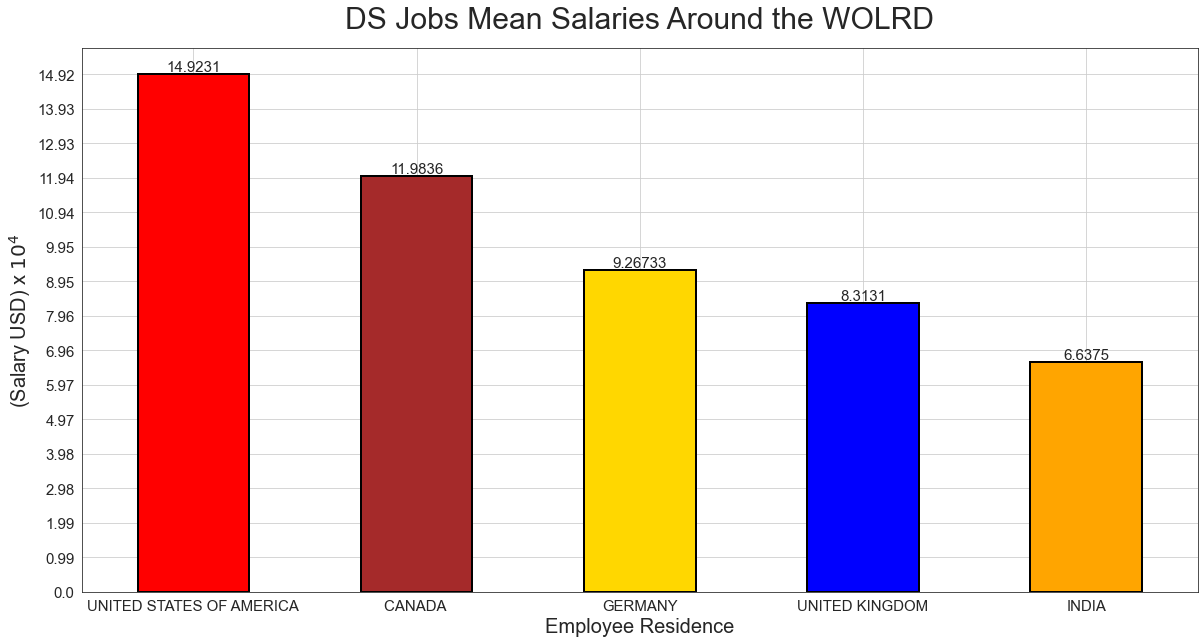

In [252]:
employee_residence = avg_sala_per_country['employee_residence'].values

# Cria ticks

rescaled_salaries, rescaled_ticks, power = generate_scaled_ticks(avg_sala_per_country['salary_in_usd'], 1e4, 15, start_with_0=True)
avg_sala_per_country['rescaled_salary'] = rescaled_salaries
nticks = 15
max_avg_sal =  rescaled_salaries.max()

#plot

ax = avg_sala_per_country.plot(x = 'employee_residence',y = 'rescaled_salary' ,kind='bar', figsize=(20,10), color=['red', 'brown','gold','blue','orange'], legend=False, linewidth=2, edgecolor='black')

# ticks e labels

ax.set_title("DS Jobs Mean Salaries Around the WOLRD", fontsize=30, pad = 20)
ax.set_yticks(rescaled_ticks)
ax.set_yticklabels([str(round(sal,2)) for sal in rescaled_ticks]    ,fontsize=15)
ax.set_ylabel(f"(Salary USD) x $10^{power}$", fontsize=20)
ax.set_xlabel("Employee Residence", fontsize = 20)
ax.tick_params(axis='x', rotation=0, labelsize=15)
ax.grid()

# Coloca legenda da média de salário

for i, bar in enumerate(ax.containers):
    
  ax.bar_label(bar, label='$ %.2f'%(float(avg_sala_per_country['rescaled_salary'].values.flat[i])), label_type='edge', fontsize=15)



## Insights Salarios por nívels de experiência

Depois de ter visto as médias salarios de uma fomra global por país vamos ver-la por nível de experiência, por isso primeiramente vamos agrupar salários pela job role e pelo nívels de expirência calculando a média

In [253]:
group_by_sal_job_role =  salaries_world_around_df_preprocessed[['job_title','salary_in_usd']].groupby(['job_title']).mean('salary_in_usd').reset_index()
group_by_sal_job_role


job_title  salary_in_usd
0               DATA ANALYST  112583.012195
1             DATA ARCHITECT  159819.830189
2              DATA ENGINEER  141966.222930
3             DATA SCIENTIST  146977.747433
4  MACHINE LEARNING ENGINEER  152665.986547
5                  RESEACHER  152196.553719

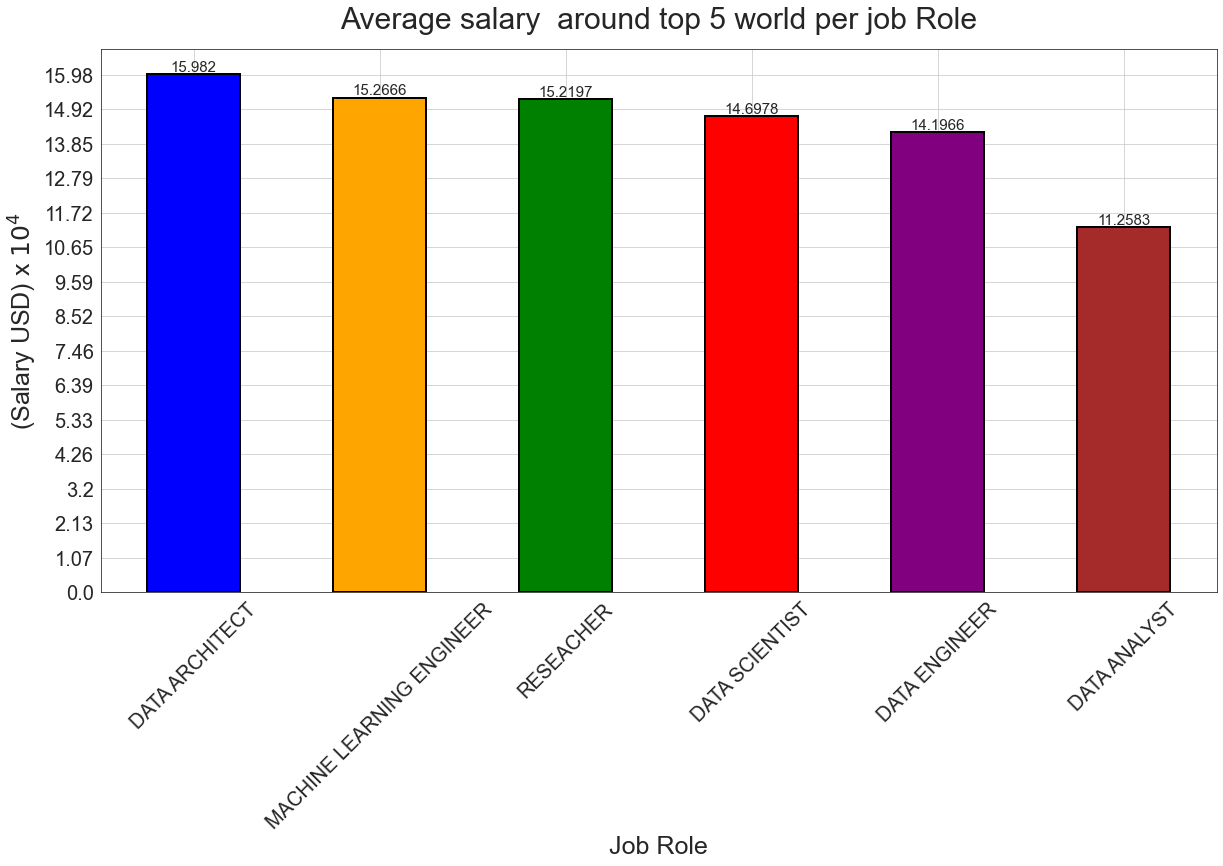

In [254]:

# Agrupa calculando a média

group_by_sal_job_role['rescaled_salary'], scaled_ticks, power = generate_scaled_ticks(group_by_sal_job_role['salary_in_usd'], 1e4, 15, start_with_0=True)

#Reordena Média de salários na ordem crescente

avg_sorted_salaries = group_by_sal_job_role.sort_values('rescaled_salary', ascending=False)

#plot

ax = avg_sorted_salaries.plot(kind='bar',x='job_title', y='rescaled_salary', figsize=(20,10), color=JOB_COLORS, linewidth=2, edgecolor='black', legend=False)




#Coloca legenda média de salários em cima das barras

for i, bar in enumerate(ax.containers):
    
  ax.bar_label(bar, label='$ %.2f'%(float(group_by_sal_job_role['rescaled_salary'].values.flat[i])), label_type='edge', fontsize=15)

# Configura elementos visuais do gráfico

ax.set_title('Average salary  around top 5 world per job Role', fontsize=30, pad =20)
ax.set_ylabel(f"(Salary USD) x $10^{power}$", fontsize=25)
ax.set_xlabel("Job Role", fontsize=25)
ax.tick_params(axis='x', rotation=45, labelsize=20)
ax.set_yticklabels([str(round(sal,2)) for sal in scaled_ticks] ,fontsize=20)
ax.set_yticks(scaled_ticks)
ax.grid(visible = True)


In [255]:
group_by_exp_lvl_job_title = salaries_world_around_df_preprocessed[['experience_level','job_title','salary_in_usd']].groupby(['experience_level','job_title']).mean('salary_in_usd').reset_index()
group_by_exp_lvl_job_title.sort_values('job_title')

experience_level                  job_title  salary_in_usd
0       ENTRY-LEVEL               DATA ANALYST   72091.812500
15     SENIOR-LEVEL               DATA ANALYST  123716.535565
9         MID-LEVEL               DATA ANALYST   98217.539062
5       EXPIRIENCED               DATA ANALYST  155636.363636
16     SENIOR-LEVEL             DATA ARCHITECT  159409.020000
10        MID-LEVEL             DATA ARCHITECT  166666.666667
6       EXPIRIENCED              DATA ENGINEER  189589.888889
11        MID-LEVEL              DATA ENGINEER  113565.647059
1       ENTRY-LEVEL              DATA ENGINEER   82773.360000
17     SENIOR-LEVEL              DATA ENGINEER  151716.511041
7       EXPIRIENCED             DATA SCIENTIST  187325.473684
12        MID-LEVEL             DATA SCIENTIST  112111.500000
2       ENTRY-LEVEL             DATA SCIENTIST   86878.764706
18     SENIOR-LEVEL             DATA SCIENTIST  163070.226708
3       ENTRY-LEVEL  MACHINE LEARNING ENGINEER  100657.045455
19     SENIOR-LEVEL  MACHINE LEARNING ENGINEER  177559.398551
13        MID-LEVEL  MACHINE LEARNING ENGINEER  116299.412698
8       EXPIRIENCED                  RESEACHER  193333.333333
14        MID-LEVEL                  RESEACHER  132601.057143
4       ENTRY-LEVEL                  RESEACHER  113337.142857
20     SENIOR-LEVEL                  RESEACHER  168232.260870

Agora vamos a extração do Insight graficamente:

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

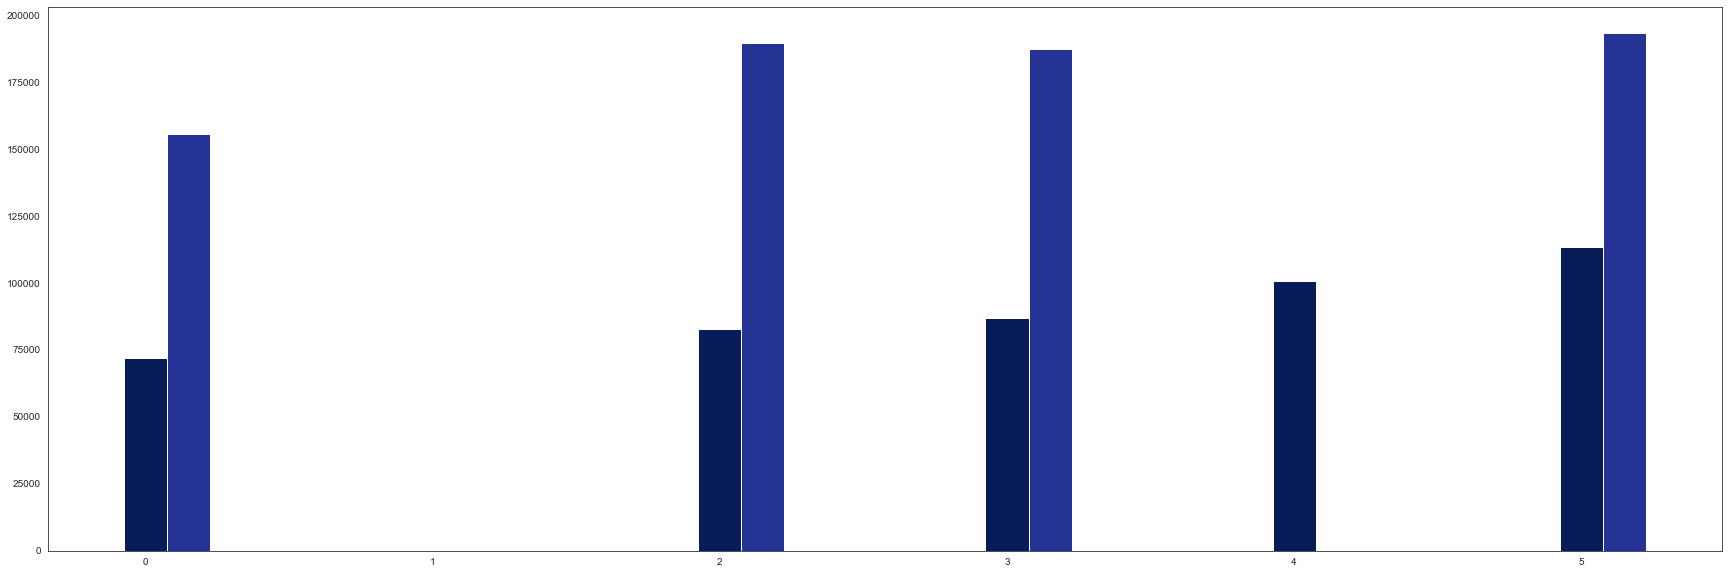

In [256]:
# Data

#'DATA ANALYST' 'DATA ARCHITECT' 'DATA ENGINEER' 'DATA SCIENTIST' 'MACHINE LEARNING ENGINEER' 'RESEACHER'
power= 4
scaling = 10**power
group_by_exp_lvl_job_title_rescaled = group_by_exp_lvl_job_title.copy()
group_by_exp_lvl_job_title_rescaled['salary_in_usd'] = group_by_exp_lvl_job_title_rescaled['salary_in_usd']/scaling


categories = salaries_world_around_df_preprocessed['job_title'].sort_values(ascending=True).unique()
seniors_sals =   [ round(el,2 ) for el in list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'SENIOR-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd'])  ]
mid_level_sals =  [ round(el,2 ) for el in list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'MID-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd'])  ]



#Foi verificado que as categorias expirienced and ENTRY-LEVEL estão faltantes para DATA-Architect e Machinelearning ENGINEER

expirienced_sals =  [ round(el,2) for el in list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'EXPIRIENCED'].sort_values('job_title',ascending=True)['salary_in_usd'])  ]
expirienced_sals.insert(1, 0.0)
expirienced_sals.insert(4, 0.0)


#Já aqui só falta para Data Architect
entry_sals = [ round(el,2 ) for el in  list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'ENTRY-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd']) ] 
entry_sals.insert(1, 0.0)


exp_levels_sals = [entry_sals, expirienced_sals, mid_level_sals, seniors_sals  ]


# Set up the figure

fig, ax = plt.subplots(figsize=(30,10))

# Set the width of each bar

bar_width = 0.15
# Set the x positions of the bars

x_pos = np.arange(len(categories))


# Plot the bars


for i in range(0,len(exp_levels_sals)):
    
    exp_level_sal = exp_levels_sals[i]
    
    job_roles = group_by_exp_lvl_job_title['job_title'].unique()     
        

    if i ==0 :
        ax.bar(x_pos+i*bar_width   , exp_level_sal, width=bar_width, color=EXPIRIENCE_LEVEL_PALLETE[i], align='center')
    
    else:
        ax.bar(x_pos+i*bar_width  , exp_level_sal, width=bar_width, color=EXPIRIENCE_LEVEL_PALLETE[i], align='center')
    
# Set the x-axis labels and tick positions
ax.set_xticks(x_pos + bar_width + 0.09)
ax.set_xticklabels(categories, fontsize=15)

# Set the y-axis label
ax.set_ylabel(f' (Salary in USD) x $10^{power}$', fontsize= 20)


offset= 2
max_sal = group_by_exp_lvl_job_title['salary_in_usd'].max()
min_sal = 0
n_ticks = 10
step = (max_sal - min_sal)/n_ticks
range_sal = np.arange(min_sal, max_sal + step + offset, step)

ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el/scaling,2)) for el in range_sal], fontsize=15)




ax.set_xlabel("Job Role", fontsize=20)
# Set the title
ax.set_title('Salários por Job Role e nível de experiência', fontsize=20)

# Add a legend]
ax.legend(['ENTRY-LEVEL','EXPIRIENCED','MID-LEVEL','SENIOR-LEVEL'], fontsize= 15)
ax.set_ylim([0, np.max(range_sal)])
ax.grid(visible=True)



Observa-se que temos uma anomalia no gráfico, não é esperado que nenhum nível de experiencia ganhe mais que um nível senior, vamos verificar o porque. Observase que o nivel "Expirienced" ta ganhando mais que  todos os outros nível em todos os job roles, E que no  job role "Data architect", um MID-LEVEL ta ganhando mais que um SENIOR-LEVEL. Vamos verificar o porque:

In [ ]:
salaries_world_around_df_preprocessed[['employee_residence','experience_level']][salaries_world_around_df_preprocessed['experience_level']=='EXPIRIENCED' ]['employee_residence'].value_counts()

UNITED STATES OF AMERICA    50
CANADA                       4
GERMANY                      3
UNITED KINGDOM               2
INDIA                        1
Name: employee_residence, dtype: int64

In [ ]:
data_architect_jbs = salaries_world_around_df_preprocessed[['employee_residence','experience_level','job_title']][salaries_world_around_df_preprocessed['job_title']=='DATA ARCHITECT']

In [ ]:
data_architect_jbs.value_counts()

employee_residence        experience_level  job_title     
UNITED STATES OF AMERICA  SENIOR-LEVEL      DATA ARCHITECT    44
CANADA                    SENIOR-LEVEL      DATA ARCHITECT     4
UNITED STATES OF AMERICA  MID-LEVEL         DATA ARCHITECT     3
UNITED KINGDOM            SENIOR-LEVEL      DATA ARCHITECT     2
dtype: int64

O que se verificou é que as vagas de data architect estão concentradas na américa do norte, nos  dois países que mais bem pagam, o que não explicaria o fato de Senior ganhar menor que um pleno. 


Pesquisas demonstraram que as empresas utilizam mais as cataegorias, junior, pleno, senior, então para esse insight vamos ficar somente com essas 3, até porque a expirienced está em sua sua gigantesca maioria nos EUA, o país que mais bem paga o que explica a distorção dela em relação a outros paises.

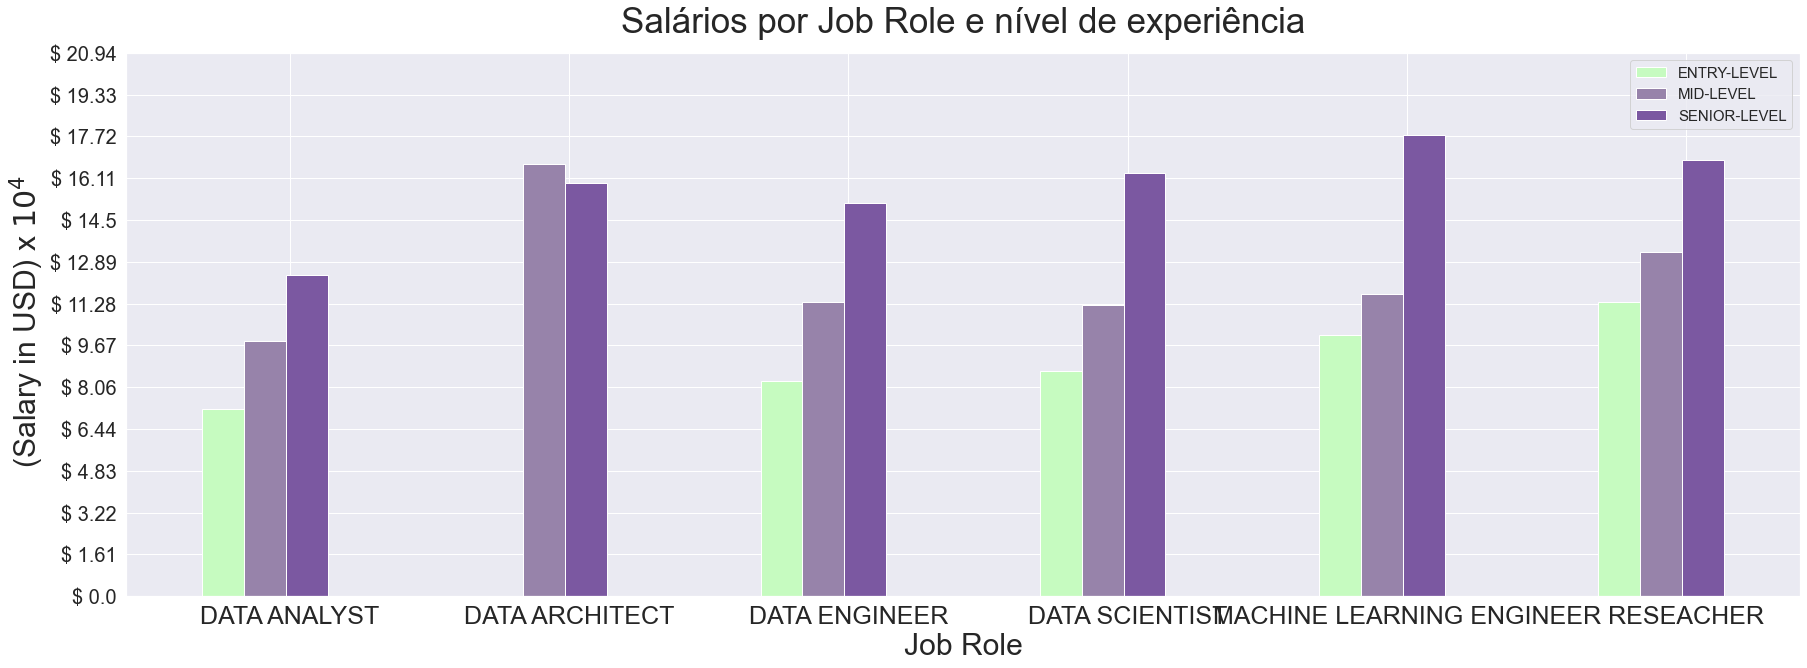

In [ ]:
# Data

power= 4
scaling = 10**power
group_by_exp_lvl_job_title_rescaled = group_by_exp_lvl_job_title.copy()
group_by_exp_lvl_job_title_rescaled['salary_in_usd'] = group_by_exp_lvl_job_title_rescaled['salary_in_usd']/scaling


categories = salaries_world_around_df_preprocessed['job_title'].sort_values(ascending=True).unique()
seniors_sals =   [ round(el,2 ) for el in list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'SENIOR-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd'])  ]
mid_level_sals =  [ round(el,2 ) for el in list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'MID-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd'])  ]

# Adiona zero no dado faltando para o role Data Architect

entry_sals = [ round(el,2 ) for el in  list( group_by_exp_lvl_job_title[ group_by_exp_lvl_job_title['experience_level'] == 'ENTRY-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd']) ] 
entry_sals.insert(1, 0.0)


exp_levels_sals = [entry_sals, mid_level_sals, seniors_sals  ]


# Novo Painel

fig, ax = plt.subplots(figsize=(30,10))

# Configura Largura da barra

bar_width = 0.15

# Define as posições no eixo X

x_pos = np.arange(len(categories))


# Plot

for i in range(0,len(exp_levels_sals)):
    
    exp_level_sal = exp_levels_sals[i]
    
    job_roles = group_by_exp_lvl_job_title['job_title'].unique()     
        

    if i ==0 :
        ax.bar(x_pos+i*bar_width   , exp_level_sal, width=bar_width, color=EXPIRIENCE_LEVEL_PALLETE[i], align='center')
    
    else:
        ax.bar(x_pos+i*bar_width  , exp_level_sal, width=bar_width, color=EXPIRIENCE_LEVEL_PALLETE[i], align='center')
    
# Configura ticks e labes
ax.set_xticks(x_pos + bar_width + 0.09)
ax.set_xticklabels(categories, fontsize=25)
ax.set_ylabel(f' (Salary in USD) x $10^{power}$', fontsize= 30)


# Muda ticks de escala

max_sal = group_by_exp_lvl_job_title['salary_in_usd'].max()
min_sal = 0
n_ticks = 12
step = (max_sal - min_sal)/n_ticks
range_sal = np.arange(min_sal, max_sal + step, step)

# Configura elementos visuais

ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el/scaling,2)) for el in range_sal], fontsize=20)
ax.set_xlabel("Job Role", fontsize=30)
ax.set_title('Salários por Job Role e nível de experiência', fontsize=35, pad = 20)
ax.legend(['ENTRY-LEVEL','MID-LEVEL','SENIOR-LEVEL'], fontsize=15)
ax.set_ylim([0, np.max(range_sal)])
ax.grid(visible=True)


## Faixa salarial por Job role e nivel de experiência nos TOP 5

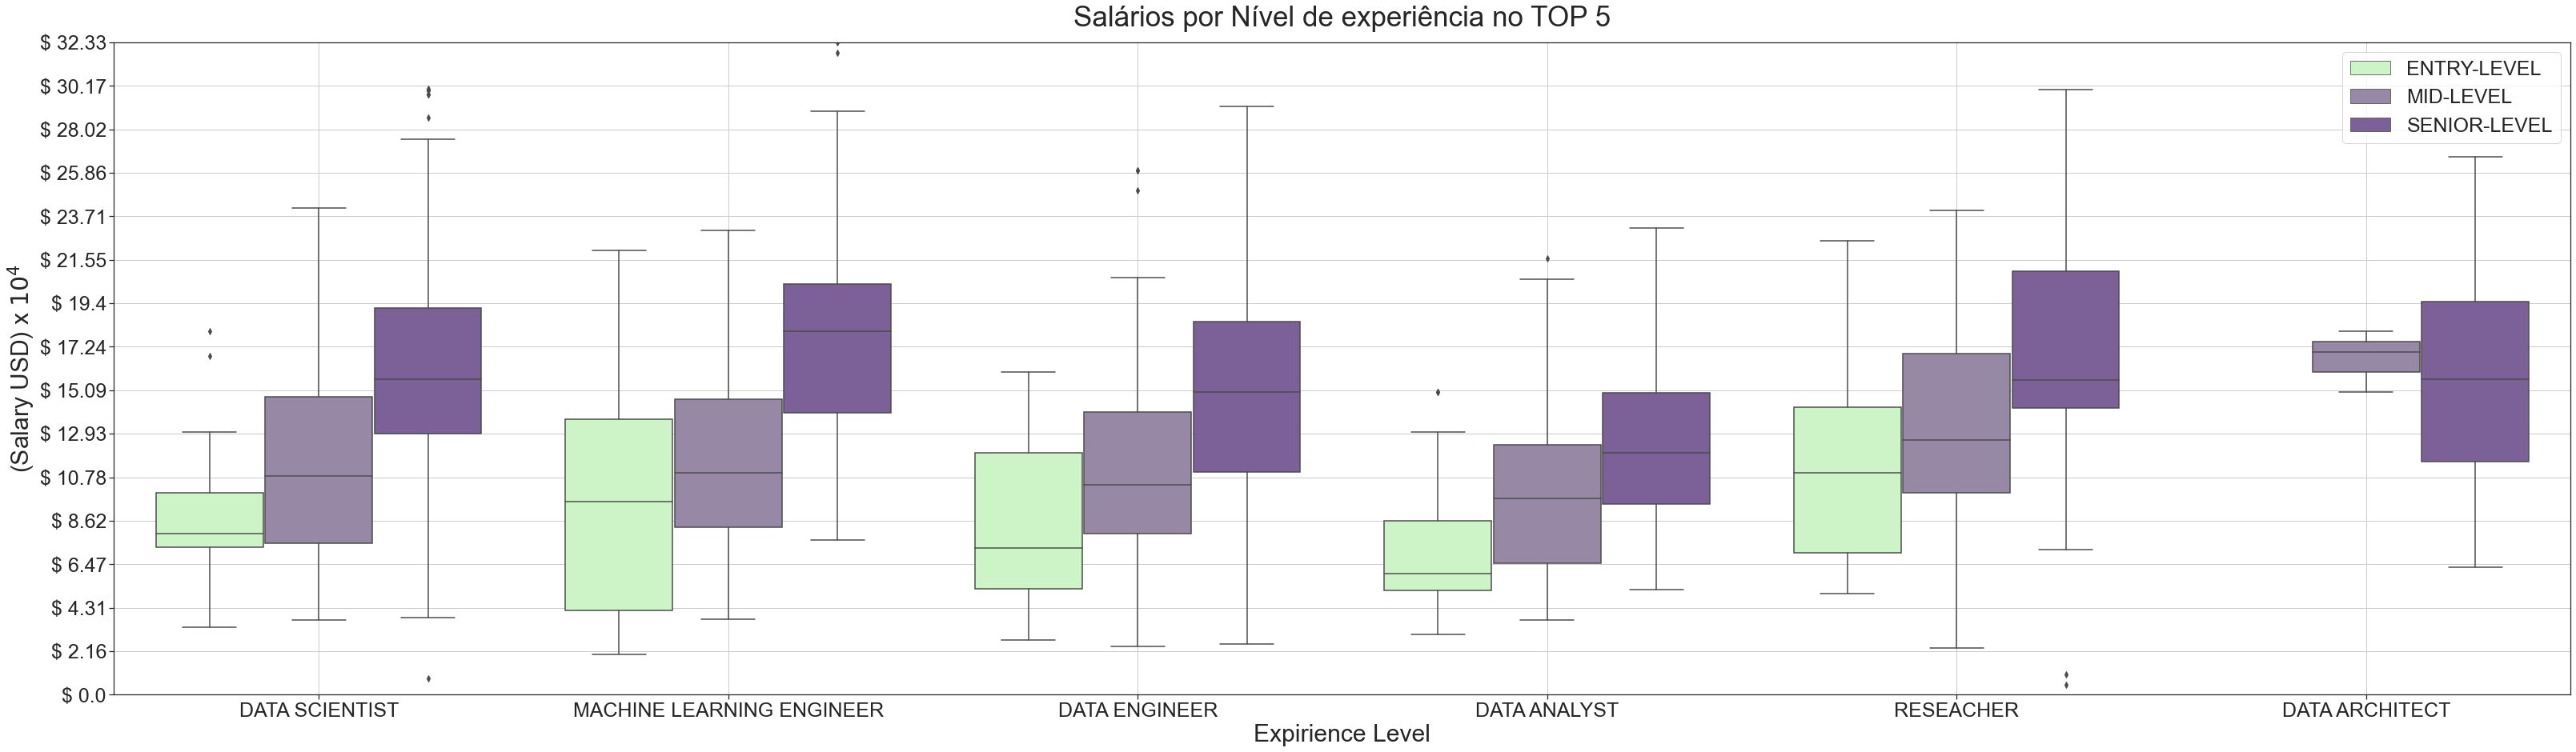

In [ ]:
#Carrega e adequa dados a escala

power= 4
scaling = 10**power
range_sals_lvl_exp = salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['experience_level'] != 'EXPIRIENCED'].sort_values('experience_level')
rescaled = range_sals_lvl_exp.copy()
rescaled['salary_in_usd'] = rescaled['salary_in_usd'] / scaling

#Configura parametros de plot

max_sal = rescaled['salary_in_usd'].max()
min_sal = 0
n_ticks = 15
step = (max_sal - min_sal)/n_ticks
range_sal = np.arange(min_sal, max_sal + step, step)

#plot

fig= plt.figure(figsize=(55,15)) 
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(x="job_title", y="salary_in_usd",
            hue="experience_level", palette=EXPIRIENCE_LEVEL_PALLETE,
            data=rescaled)

# Configura Elementos Visuais

ax.set_title('Range salary  on top 5 world per job Role', fontsize=40)
ax.set_ylabel(f"(Salary USD) x $10^{power}$", fontsize=30)
ax.set_xlabel("Job Role", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_ylim([0, np.max(range_sal)])
ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el,2)) for el in range_sal])
ax.set_xlabel("Expirience Level", fontsize=30)
ax.set_title('Salários por Nível de experiência no TOP 5', fontsize=35, pad = 20)
ax.legend( fontsize=25)
ax.grid(visible=True)

## Faixa de salário por nível de experiência

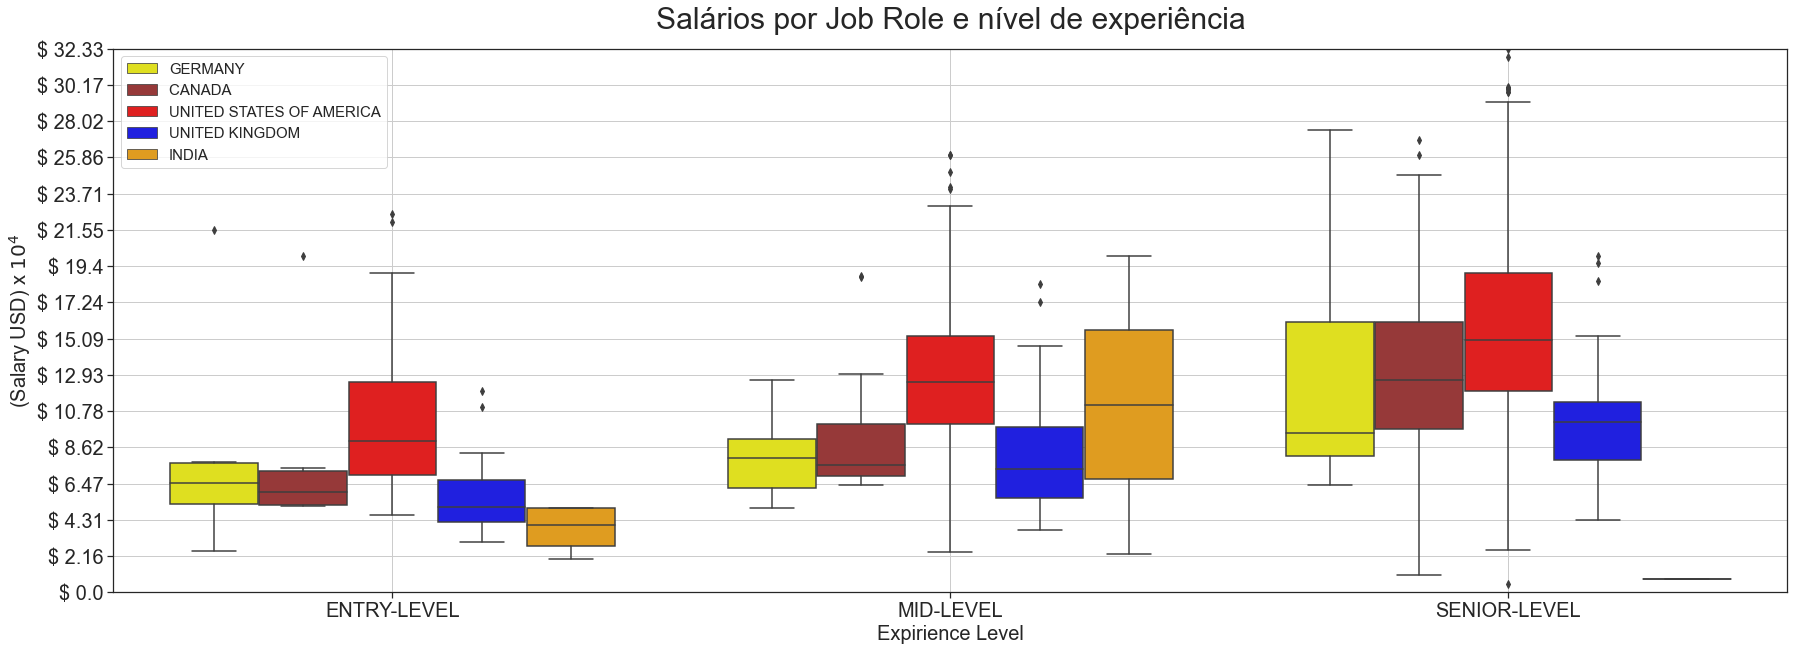

In [ ]:
# Carrega dadis
range_sals_lvl_exp = salaries_world_around_df_preprocessed[ salaries_world_around_df_preprocessed['experience_level'] != 'EXPIRIENCED'].sort_values('experience_level')
rescaled = range_sals_lvl_exp.copy()

# Confgiura parametros de plot

power= 4
scaling = 10**power
rescaled['salary_in_usd'] = rescaled['salary_in_usd'] / scaling
max_sal = rescaled['salary_in_usd'].max()
min_sal = 0
n_ticks = 15
step = (max_sal - min_sal)/n_ticks
range_sal = np.arange(min_sal, max_sal + step, step)


# Load the example tips dataset

fig= plt.figure(figsize=(30,10))
tips = sns.load_dataset("tips")

# Deseja boxplot agrupado

sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(x="experience_level", y="salary_in_usd",
            hue="employee_residence", palette=["yellow","brown","red",'blue','orange'],
            data=rescaled)

#Configura elementos visuais


ax.set_ylabel(f"(Salary USD) x $10^{power}$", fontsize=20)
ax.set_xlabel("Job Role", fontsize=20)
ax.tick_params( axis='both', which='major', labelsize=20)
ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el,2)) for el in range_sal], fontsize=20)
ax.set_xlabel("Expirience Level", fontsize=20)
ax.set_title('Salários por Job Role e nível de experiência', fontsize=30, pad = 20)
ax.set_ylim([0, np.max(range_sal)])
ax.legend(fontsize=15)
ax.grid(visible=True)

## Faixa de salário por Job Role

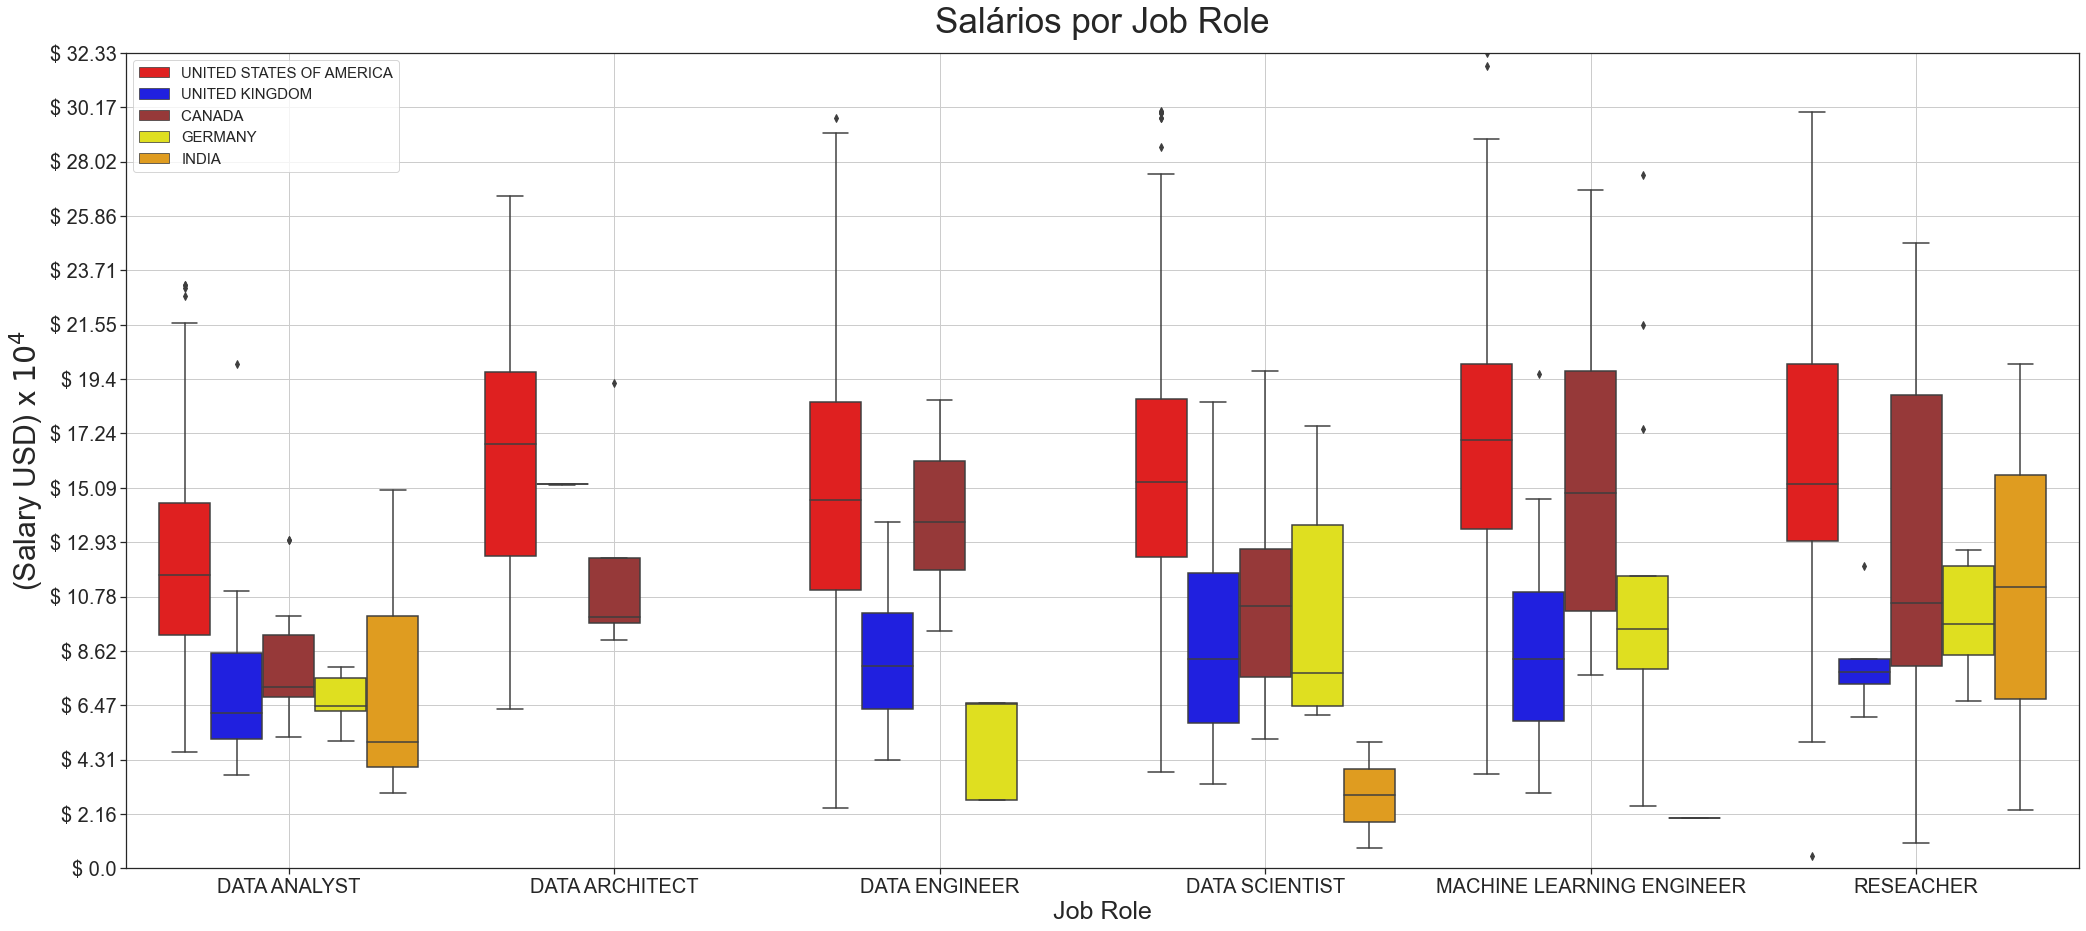

In [ ]:
#Carrega Dados

range_sals_lvl_exp = salaries_world_around_df_preprocessed.sort_values('job_title')
rescaled = range_sals_lvl_exp.copy()

# Adequa a escala e configura parâmetros de plot

power= 4
scaling = 10**power
rescaled['salary_in_usd'] = rescaled['salary_in_usd'] / scaling
max_sal = rescaled['salary_in_usd'].max()
min_sal = 0
n_ticks = 15
step = (max_sal - min_sal)/n_ticks
range_sal = np.arange(min_sal, max_sal + step, step)


sns.set_theme(style="ticks", palette="pastel")

# Plot

fig= plt.figure(figsize=(35,15))
ax = sns.boxplot(x="job_title", y="salary_in_usd",
            hue="employee_residence", palette=["red","blue","brown",'yellow','orange'],
            data=rescaled)

# Configura elementos visuais

ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el,2)) for el in range_sal])
ax.set_xlabel("Expirience Level", fontsize=30)
ax.set_ylabel(f"(Salary USD) x $10^{power}$", fontsize=30)
ax.set_xlabel("Job Role", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title('Salários por Job Role', fontsize=35, pad= 20)
ax.legend(fontsize=15)
ax.set_ylim([0, np.max(range_sal)])
ax.grid(visible=True)

faixa de salári

In [ ]:
h1bdata_df_preprocessed

company           title    salary       date  \
0      FORTRESS INFORMATION SECURITY LLC  DATA SCIENTIST   45980.0 2020-04-09   
1                  PERCOLATA CORPORATION  DATA SCIENTIST   46060.0 2016-03-18   
2                   MY LIFE REGISTRY LLC  DATA SCIENTIST   47960.0 2015-02-18   
3                   MY LIFE REGISTRY LLC  DATA SCIENTIST   47960.0 2015-02-18   
4         BIG DATA ANALYTICS TRADING INC  DATA SCIENTIST   50000.0 2017-03-16   
...                                  ...             ...       ...        ...   
82389       TECHDATA SERVICE COMPANY LLC    STATISTICIAN  135000.0 2022-08-27   
82390       TECHDATA SERVICE COMPANY LLC    STATISTICIAN  135000.0 2022-08-26   
82391         WELLS FARGO SECURITIES LLC    STATISTICIAN  135000.0 2015-10-26   
82392       ARION CAPITAL MANAGEMENT LLC    STATISTICIAN  135000.0 2019-03-13   
82393                   TIGERMED-BDM INC    STATISTICIAN  135869.0 2018-06-09   

       rescaled_salary    date_str         city state  
0               4.5980  09/04/2020      ORLANDO    FL  
1               4.6060  18/03/2016    PALO ALTO    CA  
2               4.7960  18/02/2015     FORT LEE    NJ  
3               4.7960  18/02/2015     FORT LEE    NJ  
4               5.0000  16/03/2017  JOHNS CREEK    GA  
...                ...         ...          ...   ...  
82389          13.5000  27/08/2022     SOMERSET    NJ  
82390          13.5000  26/08/2022     SOMERSET    NJ  
82391          13.5000  26/10/2015    CHARLOTTE    NC  
82392          13.5000  13/03/2019     BENSALEM    PA  
82393          13.5869  09/06/2018     SOMERSET    NJ  

[80150 rows x 8 columns]

# Um zoom nos EUA

De acordo com a análise feita no TOP 5 ficou bem percebiptível que tanto na média quanto na faixa de valores os EUA é o país que melhor bem paga os profissionais de Data Science. Por isso vale a pena olha com um pouco mai de detalhe esse país e descobrir tendências globais, dado a forte influência que esse o país possuil, incluisive pelo fato de ter sido o pioneiro a introduzir o conceito Data science.

# Médias de salários nos Estado unidos por Job role e nível de experiência

In [ ]:
salaries_on_EUA  = salaries_world_around_df_preprocessed[salaries_world_around_df_preprocessed['employee_residence'] == 'UNITED STATES OF AMERICA'][['experience_level','job_title','salary_in_usd']]
group_by_exp_level_EUA = salaries_on_EUA.groupby(['job_title', 'experience_level']).mean('salary_in_usd').reset_index()


In [ ]:
#Carrega e adequa os dados a escala

power= 4
scaling = 10**power
group_by_exp_level_EUA_rescaled = group_by_exp_level_EUA.copy()
group_by_exp_level_EUA_rescaled['salary_in_usd'] = group_by_exp_level_EUA_rescaled['salary_in_usd']/scaling
max_sal = group_by_exp_level_EUA_rescaled['salary_in_usd'].max()
min_sal = 0
n_ticks = 12
step = (max_sal - min_sal)/n_ticks
range_sal = np.arange(min_sal, max_sal + step, step)

# Salva as categorias de Roles e  os salarios por categoria adicionando dados faltantes

categories = salaries_world_around_df_preprocessed['job_title'].sort_values(ascending=True).unique()
seniors_sals =   [ round(el,2 ) for el in list( group_by_exp_level_EUA_rescaled[ group_by_exp_level_EUA_rescaled['experience_level'] == 'SENIOR-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd'])  ]
mid_level_sals =  [ round(el,2 ) for el in list( group_by_exp_level_EUA_rescaled[ group_by_exp_level_EUA_rescaled['experience_level'] == 'MID-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd'])  ]
entry_sals = [ round(el,2 ) for el in  list( group_by_exp_level_EUA_rescaled[ group_by_exp_level_EUA_rescaled['experience_level'] == 'ENTRY-LEVEL'].sort_values('job_title',ascending=True) ['salary_in_usd']) ] 
entry_sals.insert(1, 0.0)
exp_levels_sals = [entry_sals, mid_level_sals, seniors_sals  ]


# Configura plot

fig, ax = plt.subplots(figsize=(30,10))
bar_width = 0.15
x_pos = np.arange(len(categories))


# Plot


for i in range(0,len(exp_levels_sals)):
    
    exp_level_sal = exp_levels_sals[i]
    
    job_roles = group_by_exp_level_EUA_rescaled['job_title'].unique()     
        

    if i ==0 :
        ax.bar(x_pos+i*bar_width   , exp_level_sal, width=bar_width, color=EXPIRIENCE_LEVEL_PALLETE[i], align='center')
    
    else:
        ax.bar(x_pos+i*bar_width  , exp_level_sal, width=bar_width, color=EXPIRIENCE_LEVEL_PALLETE[i], align='center')
    
# Cofigura elementos visuais

ax.set_xticks(x_pos + bar_width + 0.09)
ax.set_xticklabels(categories, fontsize=15)
ax.set_ylabel(f' (Salary in USD) x $10^{power}$', fontsize= 20)
ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el,2)) for el in range_sal], fontsize=15)
ax.set_xlabel("Job Role", fontsize=20)
ax.set_title('Salários por Job Role e nível de experiência nos EUA', fontsize=20)
ax.legend(['ENTRY-LEVEL','MID-LEVEL','SENIOR-LEVEL'], fontsize=15)
ax.set_ylim([0, np.max(range_sal)])
ax.grid(visible=True)

NameError: name 'group_by_exp_level_EUA' is not defined

### Faixa de salarios por categoria nos EUA  E nível de experiência

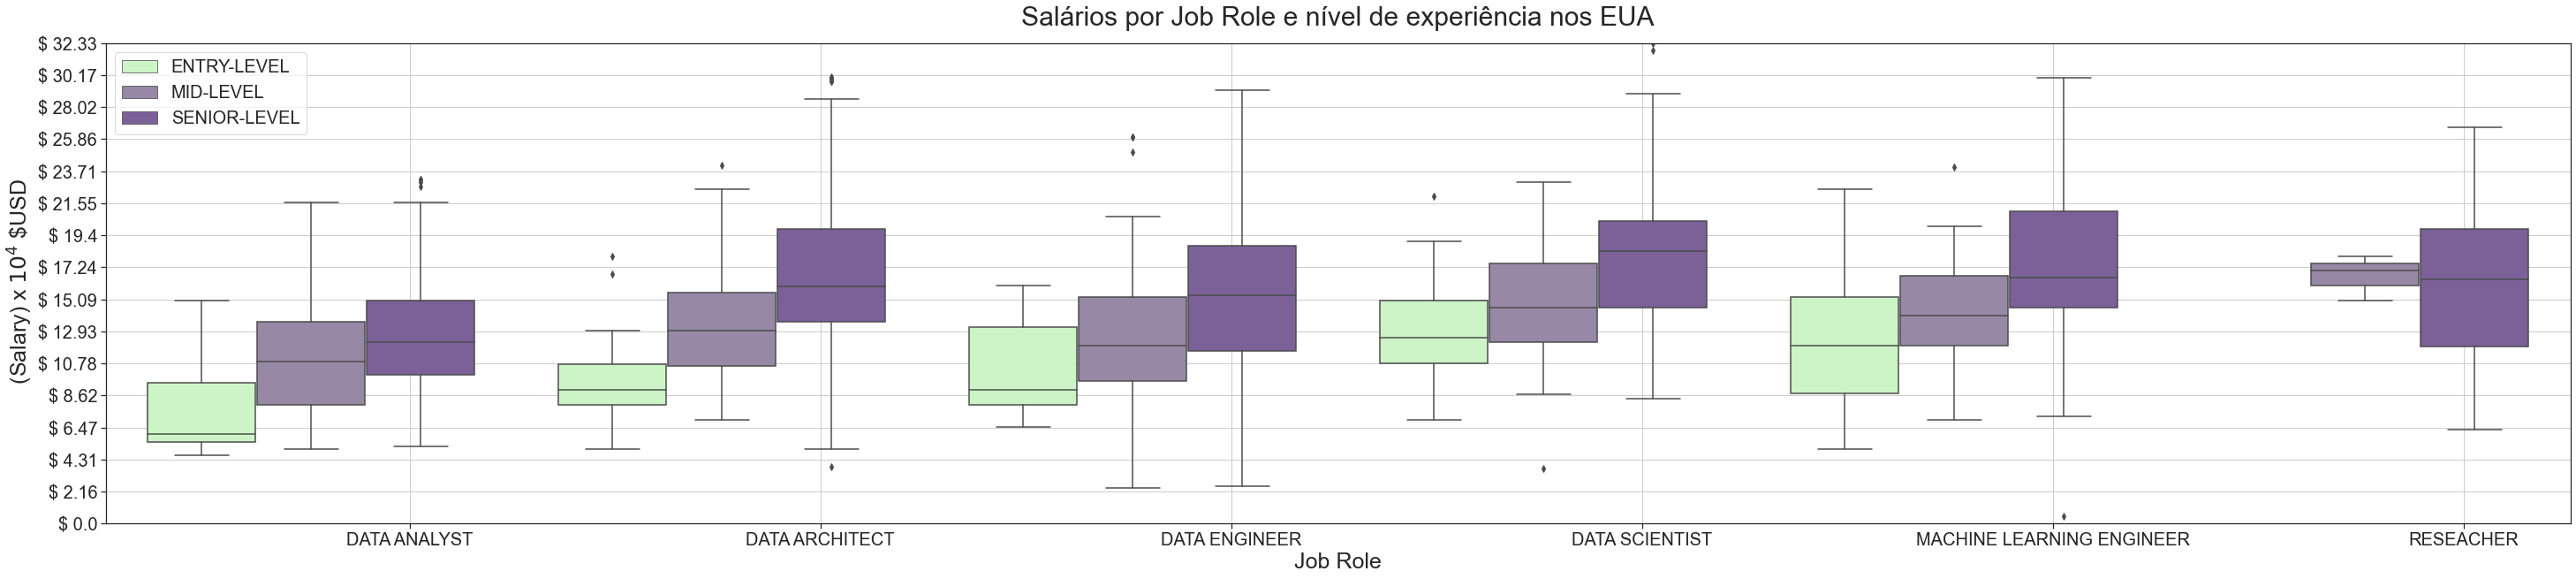

In [ ]:
#Carrega Dados e os adequa a escala

salaries_on_EUA  = salaries_world_around_df_preprocessed[salaries_world_around_df_preprocessed['employee_residence'] == 'UNITED STATES OF AMERICA'].sort_values('experience_level')
salaries_on_EUA = salaries_on_EUA[ salaries_on_EUA['experience_level'] != 'EXPIRIENCED' ]
rescaled = salaries_on_EUA.copy()
power= 4
scaling = 10**power
rescaled['salary_in_usd'] = rescaled['salary_in_usd'] / scaling
max_sal = rescaled['salary_in_usd'].max()
min_sal = 0
n_ticks = 15
step = (max_sal - min_sal)/n_ticks
range_sal = np.arange(min_sal, max_sal + step, step)


#Plot

fig= plt.figure(figsize=(50,10))
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(x="job_title", y="salary_in_usd",
            hue="experience_level", palette=EXPIRIENCE_LEVEL_PALLETE,
            data=rescaled)

# Cofigura elementos visuais

ax.set_xticks(x_pos + bar_width + 0.09)
ax.set_xticklabels(categories)
ax.set_ylabel(f' (Salary) x $10^{power}$ \$USD', fontsize= 25)
ax.set_xlabel("Job Role", fontsize=25)
ax.set_yticks(range_sal)
ax.set_yticklabels([ "$ "+ str(round(el,2)) for el in range_sal])
ax.set_title('Salários por Job Role e nível de experiência nos EUA', fontsize=30, pad = 20)
ax.legend( fontsize=20)
ax.set_ylim([0, np.max(range_sal)])
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(visible=True)

# Evolução de salários nos EUA

In [ ]:
salaries_ds_eua_over_time = h1bdata_df_preprocessed[['date','date_str','title','salary']].groupby(['date','date_str','title']).mean().reset_index().sort_values('date',ascending=True)
salaries_ds_eua_over_time

date    date_str             title         salary
0     2011-10-17  17/10/2011  BUSINESS ANALYST   53000.000000
1     2012-02-15  15/02/2012      DATA ANALYST   60000.000000
2     2012-04-03  03/04/2012      DATA ANALYST   62000.000000
3     2012-04-12  12/04/2012  BUSINESS ANALYST   45926.000000
4     2012-09-18  18/09/2012  BUSINESS ANALYST   77251.000000
...          ...         ...               ...            ...
10306 2022-12-22  22/12/2022    DATA ARCHITECT  180000.000000
10307 2022-12-22  22/12/2022     DATA ENGINEER  115319.500000
10304 2022-12-22  22/12/2022  BUSINESS ANALYST   77272.166667
10305 2022-12-22  22/12/2022      DATA ANALYST   89831.500000
10308 2022-12-22  22/12/2022    DATA SCIENTIST  143775.666667

[10309 rows x 4 columns]

## Tendência Geral

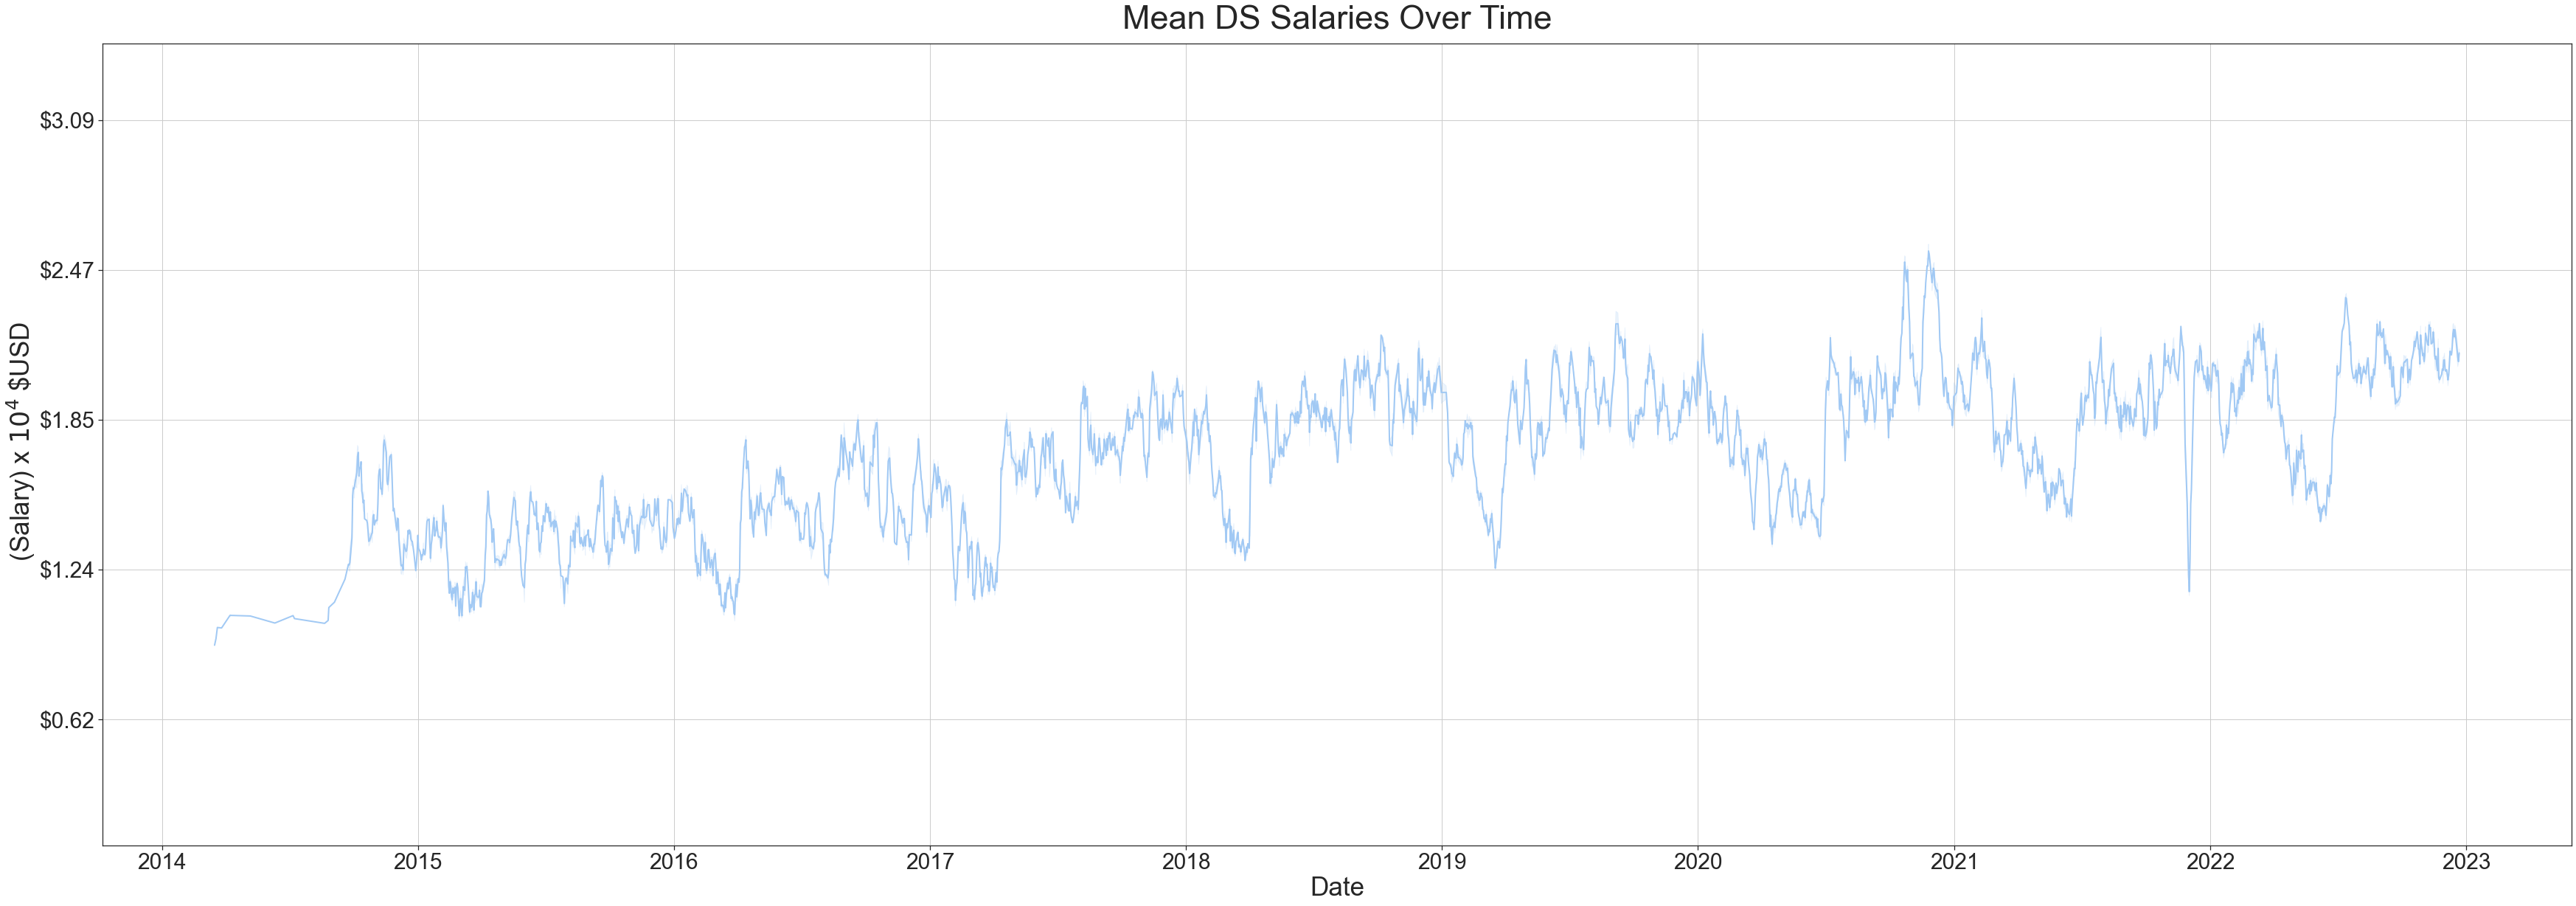

In [ ]:

#Calcula média movel dos salarios

sal_mov_mean = salaries_ds_eua_over_time['salary'].rolling(window=30).mean()

# Adequa dados a escala

scaled_data, scaled_ticks, power= generate_scaled_ticks(sal_mov_mean, 1e4, 20, start_with_0=True)
max_val = scaled_data.max()

#Plot

plt.figure(figsize = (60,20))
ax = sns.lineplot(data=salaries_ds_eua_over_time, x='date', y=sal_mov_mean, linewidth=2)

#Configura elementos visuais

ax.tick_params(axis='both', which='major', labelsize= 30)
ax.set_yticklabels(['$' + str(sal) for sal in scaled_ticks])
ax.set_ylabel(f' (Salary) x $10^{power}$ \$USD', fontsize= 35)
ax.set_xlabel("Date", fontsize=35)
ax.set_title("Mean DS Salaries Over Time", fontsize= 45, pad = 20)
ax.grid(visible=True)


## Por Job Role

In [ ]:
salaries_ds_eua_over_time

date    date_str             title         salary
0     2011-10-17  17/10/2011  BUSINESS ANALYST   53000.000000
1     2012-02-15  15/02/2012      DATA ANALYST   60000.000000
2     2012-04-03  03/04/2012      DATA ANALYST   62000.000000
3     2012-04-12  12/04/2012  BUSINESS ANALYST   45926.000000
4     2012-09-18  18/09/2012  BUSINESS ANALYST   77251.000000
...          ...         ...               ...            ...
10306 2022-12-22  22/12/2022    DATA ARCHITECT  180000.000000
10307 2022-12-22  22/12/2022     DATA ENGINEER  115319.500000
10304 2022-12-22  22/12/2022  BUSINESS ANALYST   77272.166667
10305 2022-12-22  22/12/2022      DATA ANALYST   89831.500000
10308 2022-12-22  22/12/2022    DATA SCIENTIST  143775.666667

[10309 rows x 4 columns]

Text(0.5, 0, 'Date')

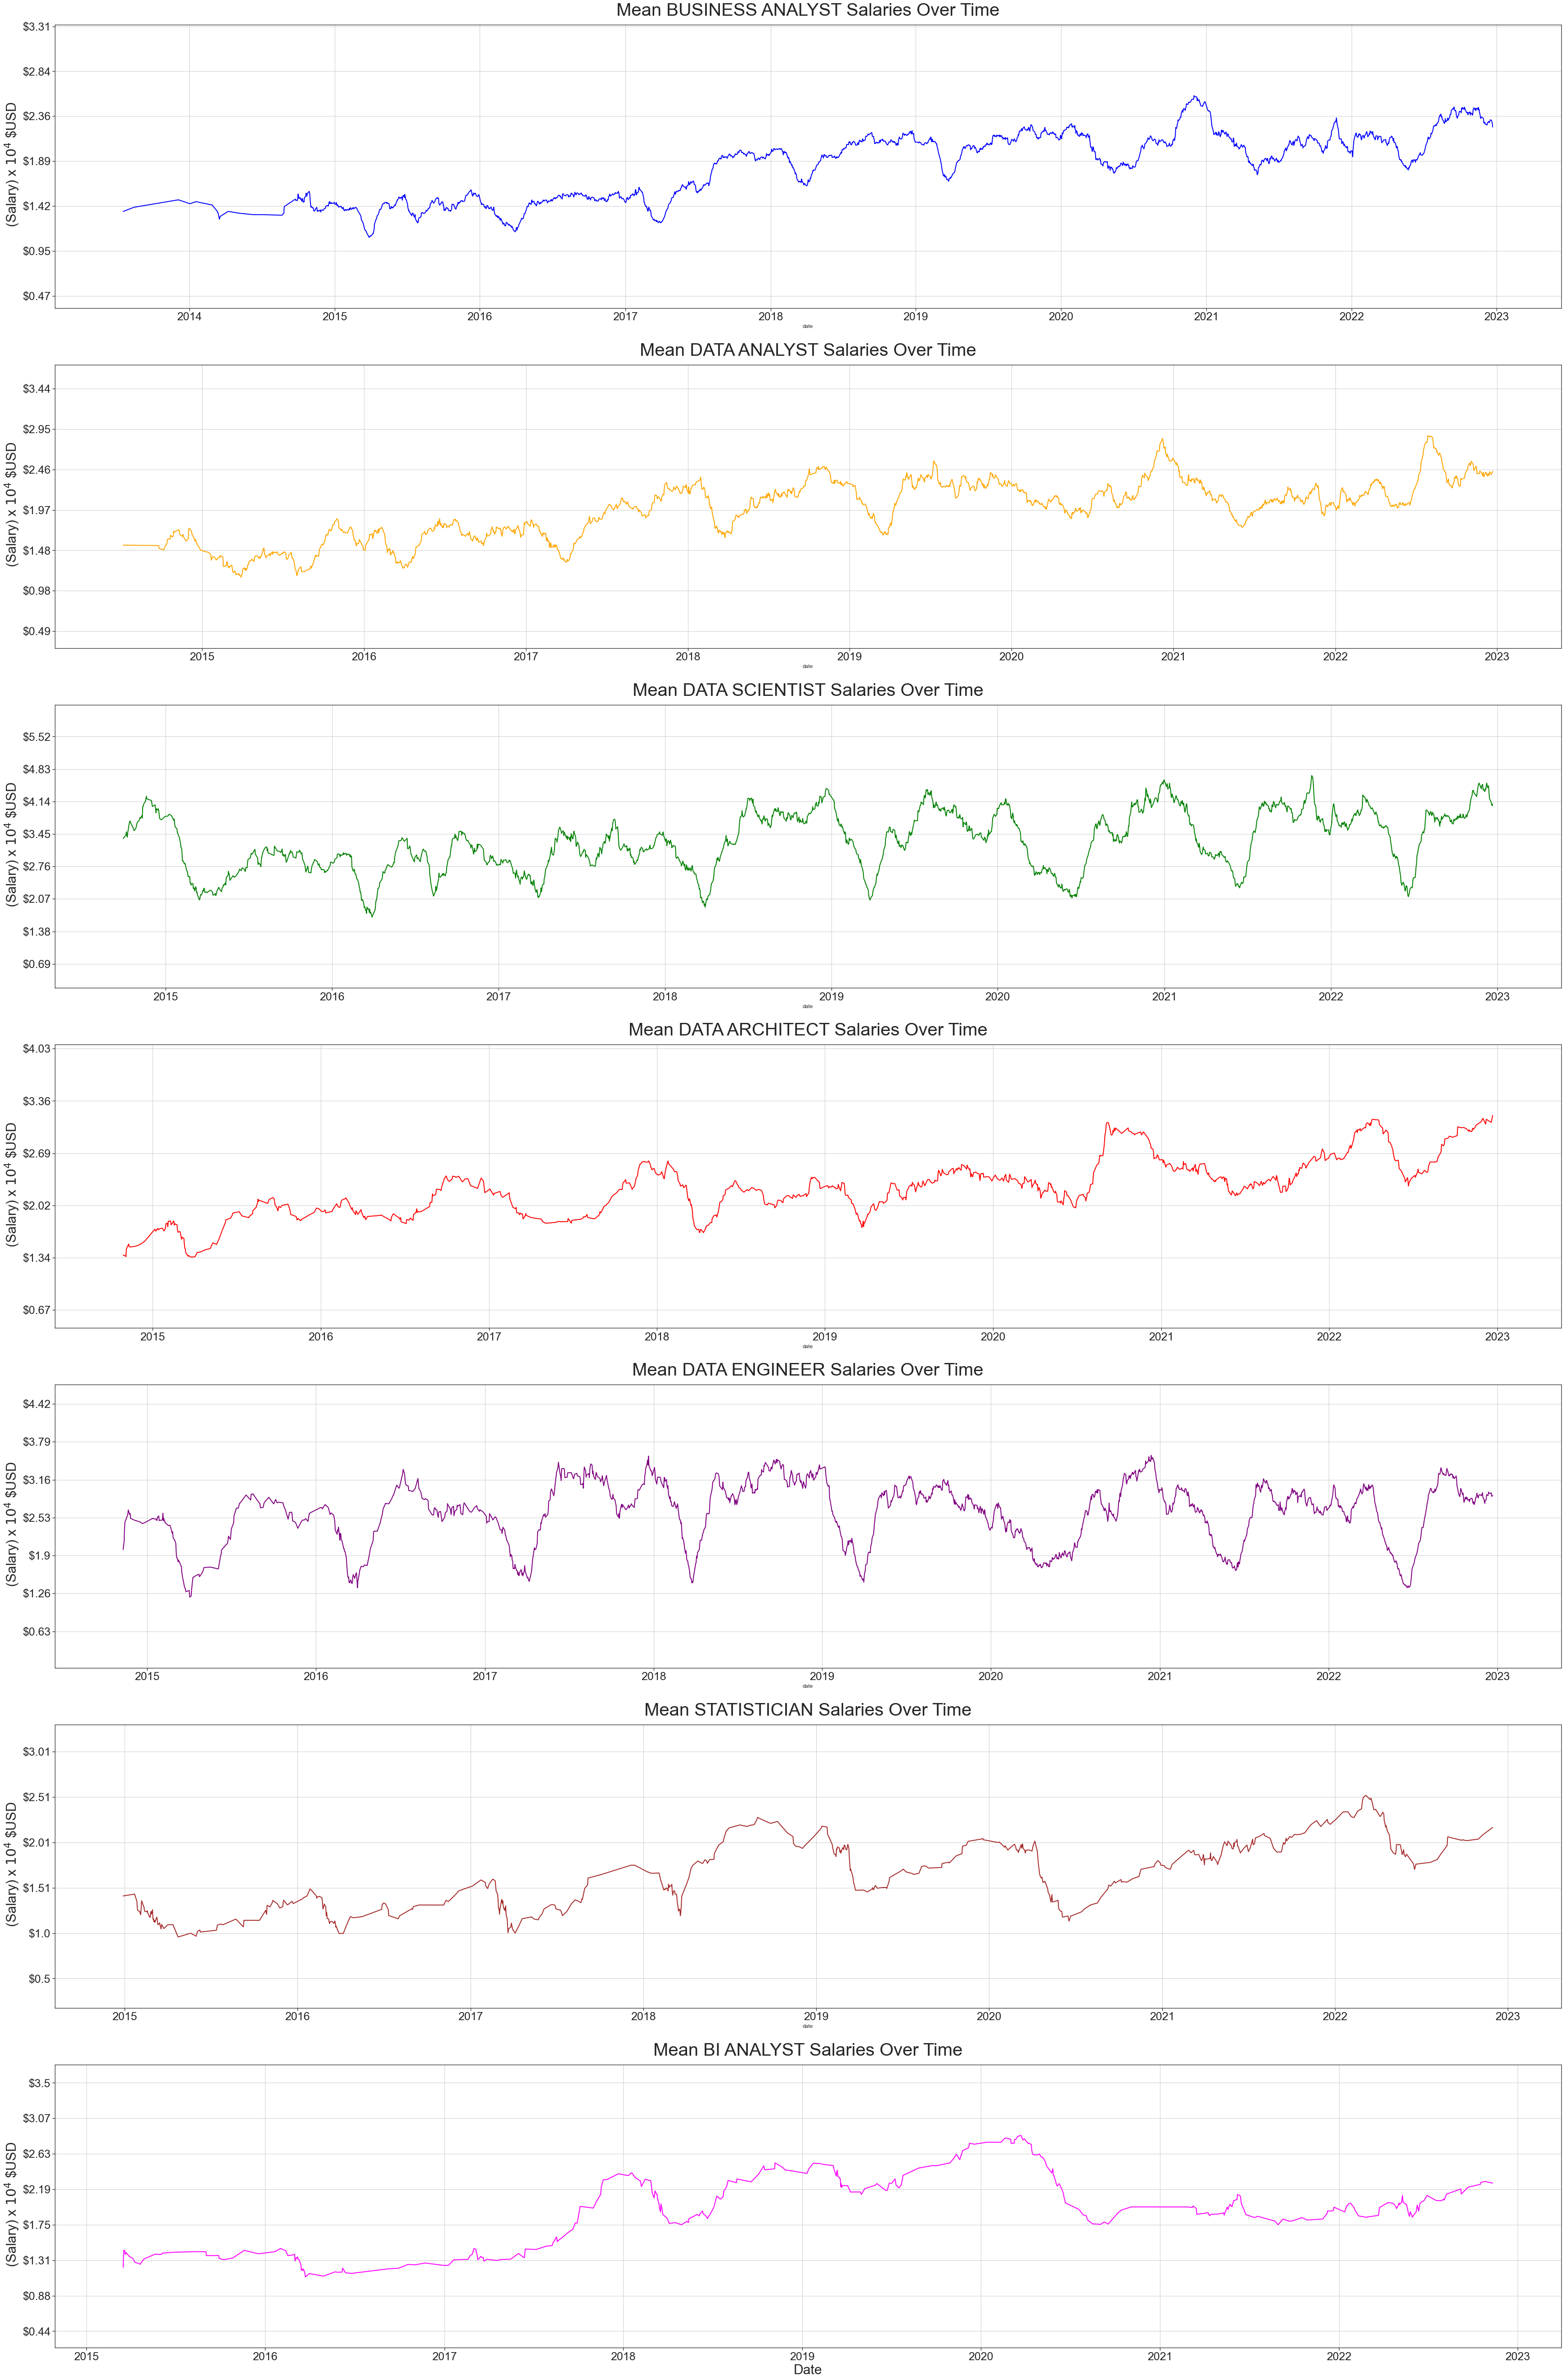

In [ ]:
#Parametros para o plot

ds_jobs =salaries_ds_eua_over_time['title'].unique()
fig, axs = plt.subplots(nrows=len(ds_jobs) ,figsize = (60,95))

#Gera plot evolução de salarios por categoria

for (i,job) in zip( range(0, len(ds_jobs)) , ds_jobs ):
    
    #calcula média movel e adequa a escala
    
    sal_mov_mean =  salaries_ds_eua_over_time.copy()
    sal_mov_mean['salary'] =  salaries_ds_eua_over_time[['salary']][salaries_ds_eua_over_time['title'] == job].rolling(window=30,min_periods=10).mean()
    scaled_data, scaled_ticks, power= generate_scaled_ticks(sal_mov_mean['salary'], 1e4, 20, start_with_0=True)
    
    #plot
    
    ax = sns.lineplot(data=sal_mov_mean,x='date', y='salary', ax = axs[i] , linewidth=2, legend=False, color = JOB_COLORS[i])
    ax.tick_params(axis='both', which='major', labelsize= 25)
    ax.set_yticklabels(['$' + str(sal) for sal in scaled_ticks])
    ax.set_ylabel(f' (Salary) x $10^{power}$ \$USD', fontsize= 30)
    ax.set_title(f"Mean {job} Salaries Over Time", fontsize= 40, pad = 20)
    ax.grid(visible=True)
    
    
ax.set_xlabel("Date", fontsize=30)
   

## Oportunidade de vagas por setor de mercado nos EUA

Text(0.5, 1.0, 'DS Opportunities per Industry')

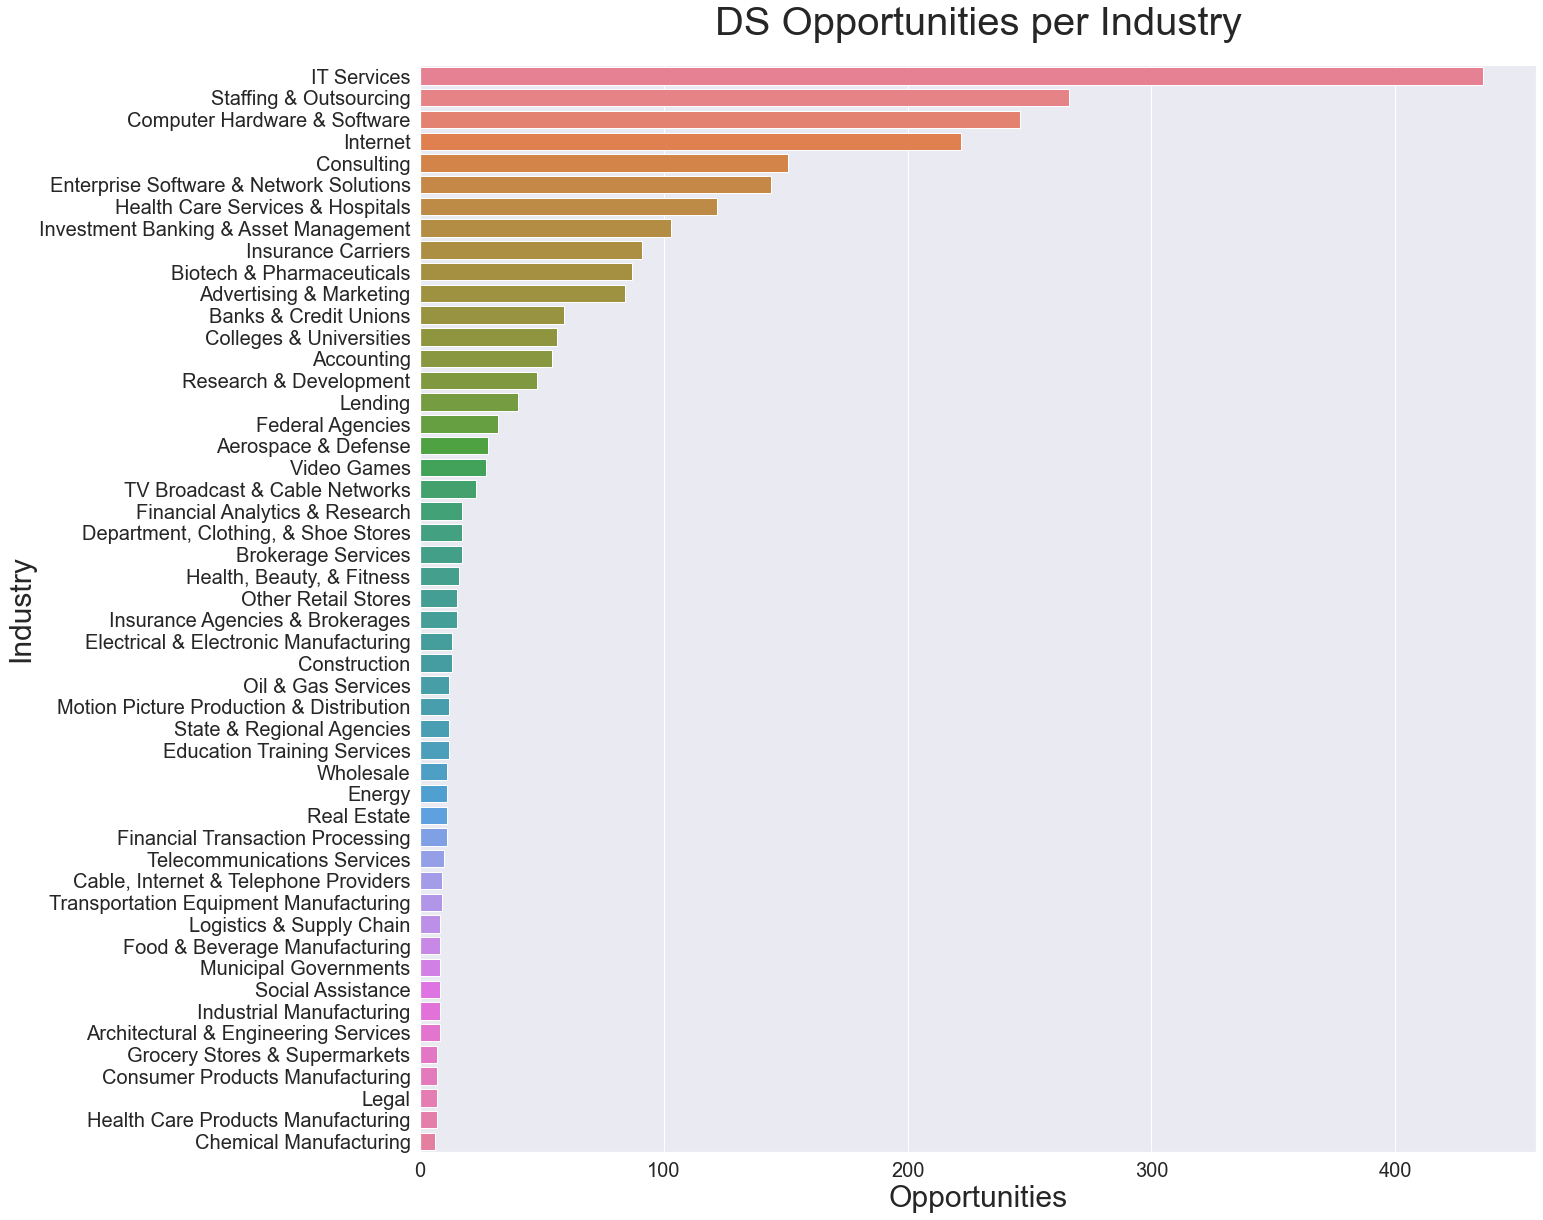

In [ ]:
import random
industries = 50
industry_color_palette = sns.color_palette("husl", 50)
market_sectors = job_description_glassdoor_preprocessed[job_description_glassdoor_preprocessed['Industry'] != 'unknown']['Industry']
count_opportunities_per_market_sector = market_sectors.value_counts().iloc[:industries]

sectors = list(count_opportunities_per_market_sector.index)
opportunities = list(count_opportunities_per_market_sector.iloc[:])

#plot
plt.figure(figsize=(20,20))
ax = sns.barplot(x=opportunities, y= sectors,  palette= industry_color_palette)
sns.set(rc={"axes.ymargin":1})
ax.tick_params(axis='both', which='major', labelsize = 20)
ax.set_ylabel('Industry', fontsize=30)
ax.set_xlabel("Opportunities", fontsize=30)
ax.set_title("DS Opportunities per Industry", fontsize = 40, pad =30)

## Insight Mapeamento Skill EUA

In [ ]:
skills_mapping_df_preprocessed

Database Fundamentals Computer Architecture  \
0             Professional        Not Interested   
1             Professional                  Poor   
2             Professional              Beginner   
3             Professional               Average   
4             Professional          Intermediate   
...                    ...                   ...   
8095             Excellent             Excellent   
8096             Excellent             Excellent   
8097             Excellent             Excellent   
8098             Excellent             Excellent   
8099             Excellent             Excellent   

     Distributed Computing Systems  Cyber Security      Networking  \
0                   Not Interested  Not Interested  Not Interested   
1                   Not Interested  Not Interested  Not Interested   
2                   Not Interested  Not Interested  Not Interested   
3                   Not Interested  Not Interested  Not Interested   
4                   Not Interested  Not Interested  Not Interested   
...                            ...             ...             ...   
8095                     Excellent       Excellent       Excellent   
8096                     Excellent       Excellent       Excellent   
8097                     Excellent       Excellent       Excellent   
8098                     Excellent       Excellent       Excellent   
8099                     Excellent       Excellent       Excellent   

     Software Development Programming Skills Project Management  \
0          Not Interested     Not Interested     Not Interested   
1          Not Interested     Not Interested     Not Interested   
2          Not Interested     Not Interested     Not Interested   
3          Not Interested     Not Interested     Not Interested   
4          Not Interested     Not Interested     Not Interested   
...                   ...                ...                ...   
8095            Excellent          Excellent          Excellent   
8096            Excellent          Excellent          Excellent   
8097            Excellent          Excellent          Excellent   
8098            Excellent          Excellent          Excellent   
8099            Excellent          Excellent          Excellent   

     Computer Forensics Fundamentals Technical Communication           AI ML  \
0                     Not Interested          Not Interested  Not Interested   
1                     Not Interested          Not Interested  Not Interested   
2                     Not Interested          Not Interested  Not Interested   
3                     Not Interested          Not Interested  Not Interested   
4                     Not Interested          Not Interested  Not Interested   
...                              ...                     ...             ...   
8095                       Excellent               Excellent       Excellent   
8096                       Excellent               Excellent       Excellent   
8097                       Excellent               Excellent       Excellent   
8098                       Excellent               Excellent       Excellent   
8099                       Excellent               Excellent       Excellent   

     Software Engineering Business Analysis Communication skills  \
0          Not Interested    Not Interested       Not Interested   
1          Not Interested    Not Interested       Not Interested   
2          Not Interested    Not Interested       Not Interested   
3          Not Interested    Not Interested       Not Interested   
4          Not Interested    Not Interested       Not Interested   
...                   ...               ...                  ...   
8095            Excellent         Excellent                 Poor   
8096            Excellent         Excellent             Beginner   
8097            Excellent         Excellent              Average   
8098            Excellent         Excellent         Intermediate   
8099            Excellent

In [ ]:
np.unique(skills_mapping_df_preprocessed.iloc[:,:-1].values.reshape(-1))

array(['Average', 'Beginner', 'Excellent', 'Intermediate',
       'Not Interested', 'Poor', 'Professional'], dtype=object)

In [ ]:
# Remodulação do mapa
ds_jobs = skills_mapping_df_preprocessed['Role'].unique()
skill_types = skills_mapping_df_preprocessed.columns[:-1]
skill_performances = ['Not Interested', 'Poor', 'Beginner', 'Average','Intermediate','Excellent', 'Professional']
schema = ["skill_performance"] + list(skill_types)

overral_mapping= pd.DataFrame([], columns = schema)
for job in ds_jobs:
    skill_count_map = pd.DataFrame(np.full( ( len(skill_performances), len(skill_types) + 1  ), 0 ),columns = schema )
    skill_count_map['skill_performance'] = skill_performances
    tmp_df = skills_mapping_df_preprocessed[ skills_mapping_df_preprocessed['Role'] == job ] 

    for skill in skill_types:
        skill_counts = dict(tmp_df[skill].value_counts())
        counts = list(skill_counts.values())
        performances = skill_counts.keys()
        mask = skill_count_map['skill_performance'].isin(performances)
        skill_count_map.loc[mask, skill] = counts
        skill_count_map['Role'] = job
    
    overral_mapping = pd.concat([overral_mapping, skill_count_map])   
    
    
overral_mapping

skill_performance Database Fundamentals Computer Architecture  \
0    Not Interested                     0                    90   
1              Poor                     0                    90   
2          Beginner                     0                    90   
3           Average                     0                    90   
4      Intermediate                     0                    90   
5         Excellent                     0                    90   
6      Professional                   540                     0   
0    Not Interested                    90                    90   
1              Poor                    90                    90   
2          Beginner                    90                    90   
3           Average                    90                    90   
4      Intermediate                    90                    90   
5         Excellent                    90                    90   
6      Professional                     0                     0   
0    Not Interested                    90                    90   
1              Poor                    90                    90   
2          Beginner                    90                    90   
3           Average                    90                    90   
4      Intermediate                    90                    90   
5         Excellent                    90                    90   
6      Professional                     0                     0   
0    Not Interested                    90                    90   
1              Poor                    90                    90   
2          Beginner                    90                    90   
3           Average                    90                    90   
4      Intermediate                    90                    90   
5         Excellent                    90                    90   
6      Professional                     0                     0   

  Distributed Computing Systems Cyber Security Networking  \
0                            90             90         90   
1                            90             90         90   
2                            90             90         90   
3                            90             90         90   
4                            90             90         90   
5                            90             90         90   
6                             0              0          0   
0                            90             90         90   
1                            90             90         90   
2                            90             90         90   
3                            90             90         90   
4                            90             90         90   
5                            90             90         90   
6                             0              0          0   
0                            90             90         90   
1                            90             90         90   
2                            90             90         90   
3                            90             90         90   
4                            90             90         90   
5                            90             90         90   
6                             0              0          0   
0                            90             90         90   
1                            90             90         90   
2                            90             90         90   
3                            90             90         90   
4                            90             90         90   
5                            90             90         90   
6                             0              0          0   

  Software Development Programming Skills Project Management  \
0                   90                 90                 90   
1                   90                 90                 90   
2                   90                 90                 90   
3                   90          

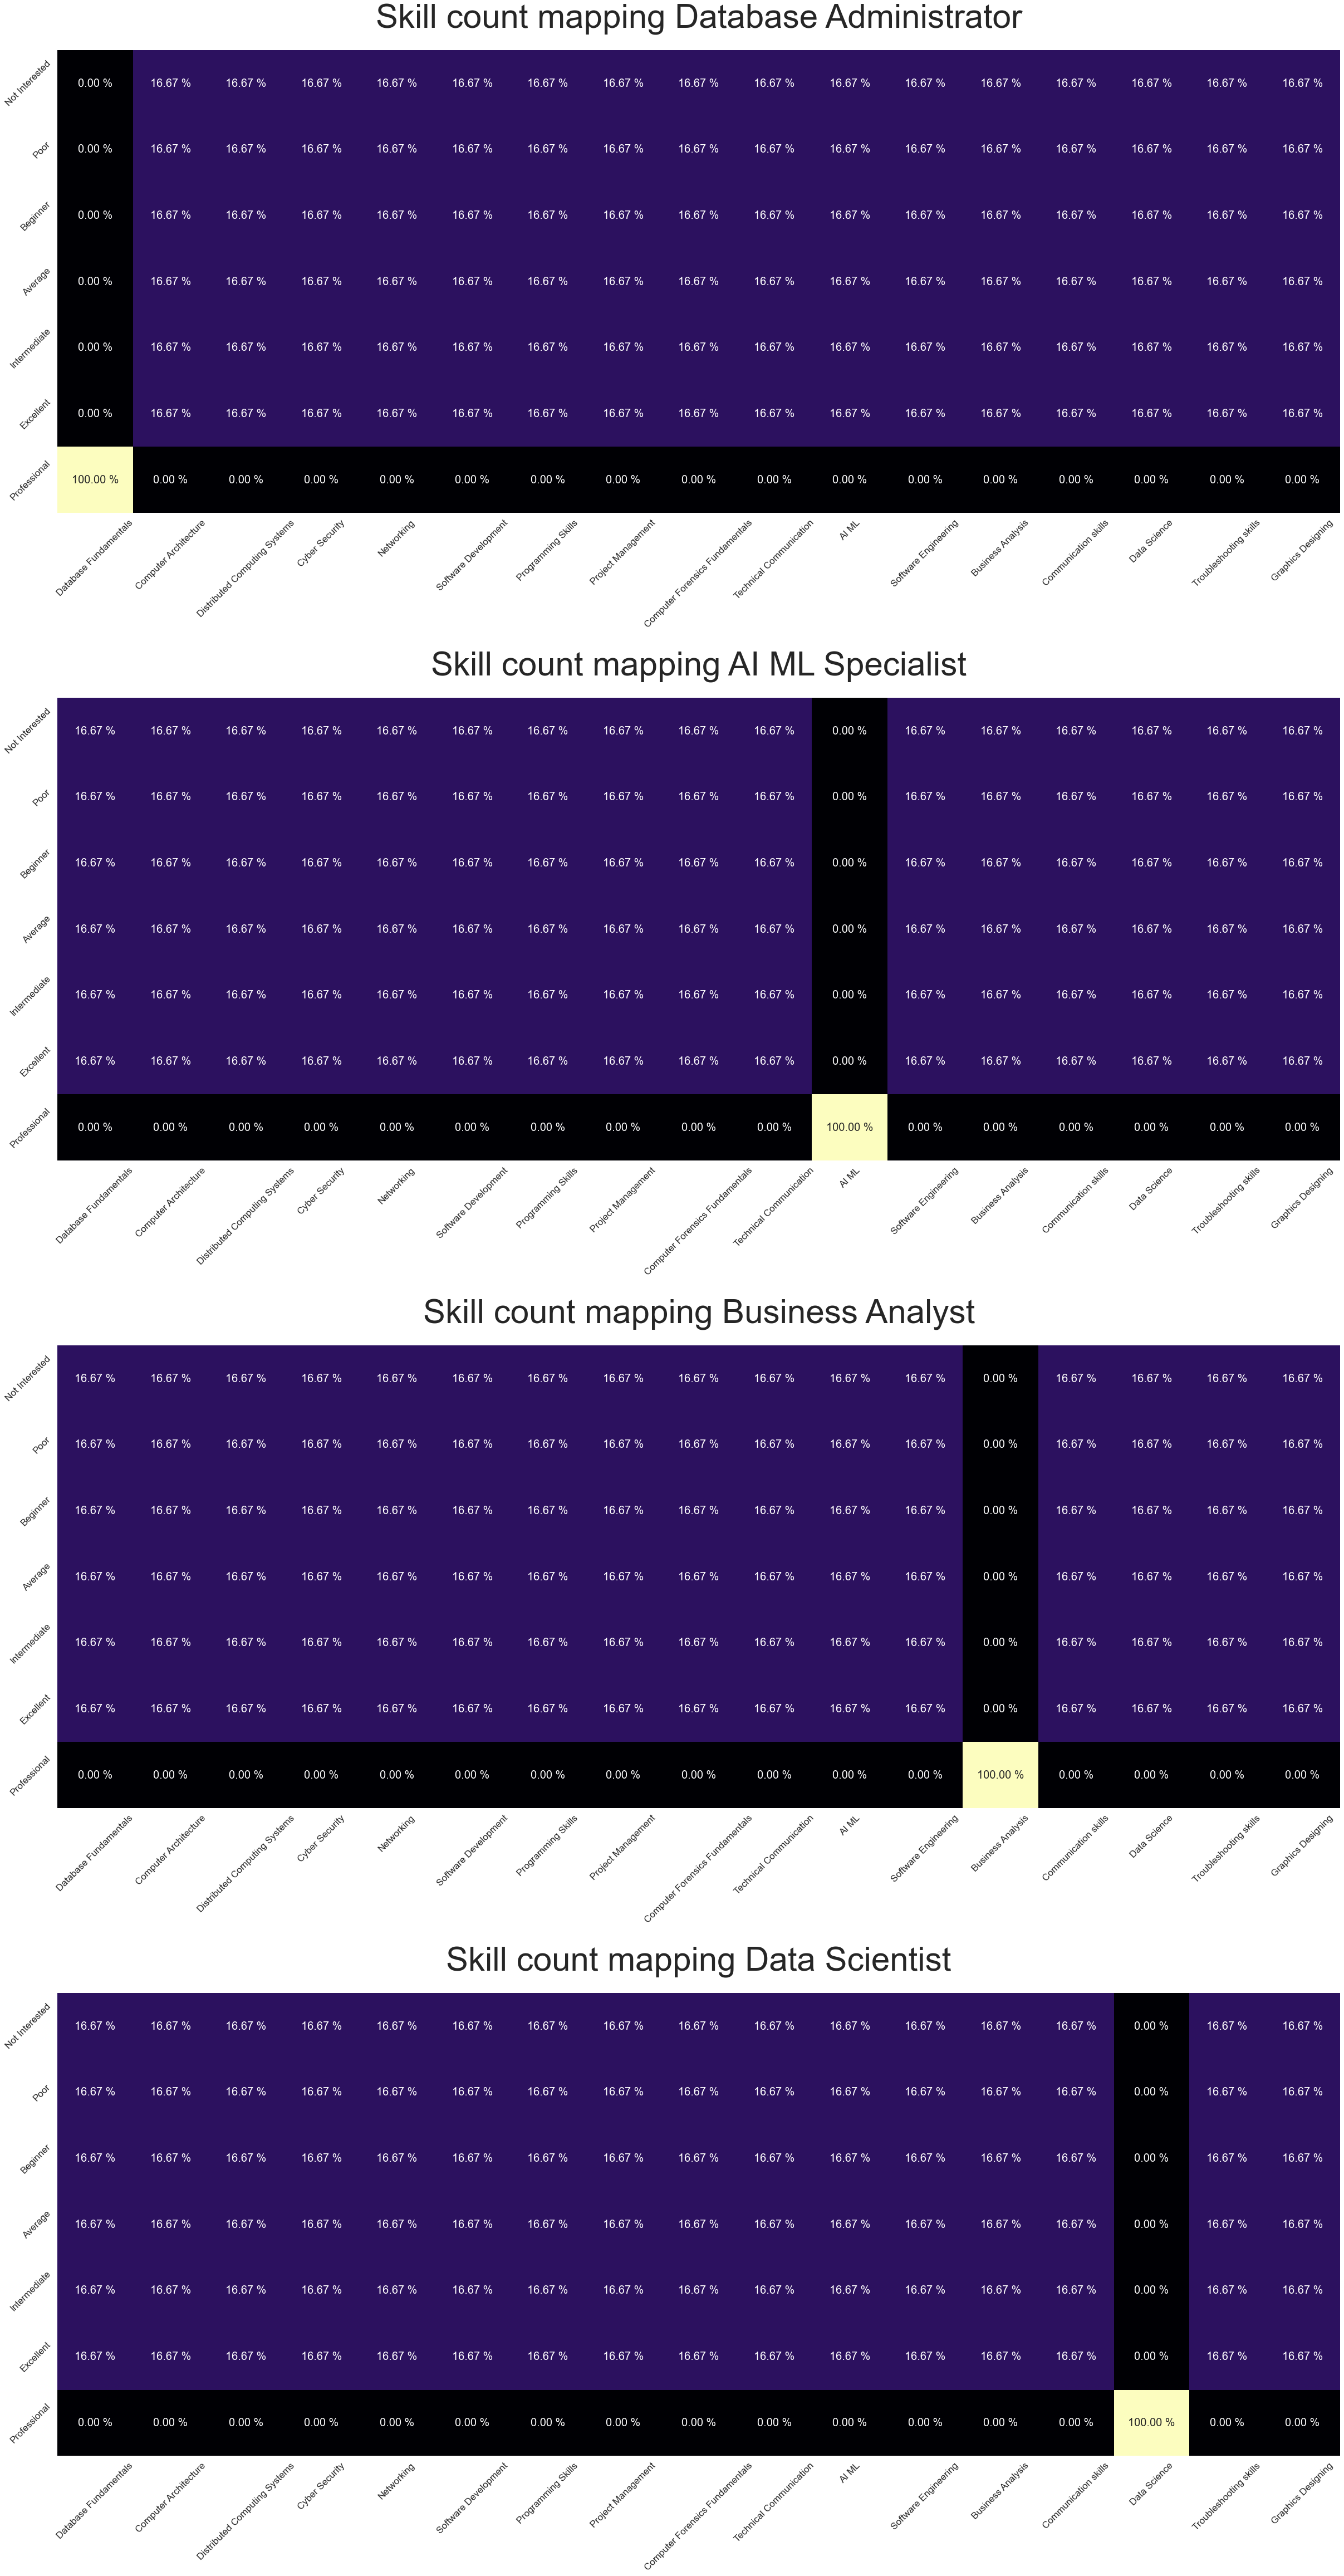

In [ ]:
#Gerar heatmap

fig, axs = plt.subplots( len(ds_jobs), 1 ,  figsize=(40,60))

# adjust margins
plt.subplots_adjust(left=0.1, bottom=0.2 , right=0.9, top=1.2, wspace=0.8, hspace=0.4)


for i, job in zip(range(0,len(ds_jobs)), ds_jobs) :
    select_map = overral_mapping[overral_mapping['Role'] == job].iloc[:,1:-1]
    sample = skills_mapping_df_preprocessed[ skills_mapping_df_preprocessed['Role'] == job]
    sns.heatmap(select_map.astype(float)/len(sample) * 100, ax= axs[i], annot=True, cmap='magma', fmt='.2f', cbar=False, annot_kws={'fontsize': 20})
    axs[i].set_yticklabels(overral_mapping['skill_performance'].unique())
    axs[i].tick_params(axis='both', which='major', labelsize=15, rotation = 45)
    axs[i].set_title(f'Skill count mapping {job}', fontsize=60, pad = 40)
    axs[i].tick_params(axis='both', which='major', labelsize=17)
    for t in axs[i].texts: t.set_text(t.get_text() + " %")

## Gráfico de radar com a média

In [ ]:
def weighted_average(values, weights):
    weigheted_avg = (sum(weights.values * values.values)/ (weights.sum(axis=0).values))
    tmp_df = pd.DataFrame( weigheted_avg ).T.iloc[:,1:]
  
    return pd.DataFrame( weigheted_avg ).T

In [ ]:

numeric_overral_mapping = overral_mapping.replace({
    "Not Interested" : 0,
    "Poor" : 1,
    "Beginner" : 2,
    "Average" : 3,
    "Intermediate" : 4,
    "Excellent": 5,
    "Professional": 6
    
}).groupby('Role').apply(lambda x: weighted_average( x[['skill_performance']], x.iloc[:,1:-1]))
numeric_overral_mapping = numeric_overral_mapping.reset_index().drop('level_1', axis=1)
numeric_overral_mapping = numeric_overral_mapping.set_index('Role')
numeric_overral_mapping.columns= overral_mapping.columns[1:-1]
numeric_overral_mapping = numeric_overral_mapping.reset_index()
numeric_overral_mapping

Role  Database Fundamentals  Computer Architecture  \
0        AI ML Specialist                    2.5                    2.5   
1        Business Analyst                    2.5                    2.5   
2          Data Scientist                    2.5                    2.5   
3  Database Administrator                    6.0                    2.5   

   Distributed Computing Systems  Cyber Security  Networking  \
0                            2.5             2.5         2.5   
1                            2.5             2.5         2.5   
2                            2.5             2.5         2.5   
3                            2.5             2.5         2.5   

   Software Development  Programming Skills  Project Management  \
0                   2.5                 2.5                 2.5   
1                   2.5                 2.5                 2.5   
2                   2.5                 2.5                 2.5   
3                   2.5                 2.5                 2.5   

   Computer Forensics Fundamentals  Technical Communication  AI ML  \
0                              2.5                      2.5    6.0   
1                              2.5                      2.5    2.5   
2                              2.5                      2.5    2.5   
3                              2.5                      2.5    2.5   

   Software Engineering  Business Analysis  Communication skills  \
0                   2.5                2.5                   2.5   
1                   2.5                6.0                   2.5   
2                   2.5                2.5                   2.5   
3                   2.5                2.5                   2.5   

   Data Science  Troubleshooting skills  Graphics Designing  
0           2.5                     2.5                 2.5  
1           2.5                     2.5                 2.5  
2           6.0                     2.5                 2.5  
3           2.5                     2.5                 2.5

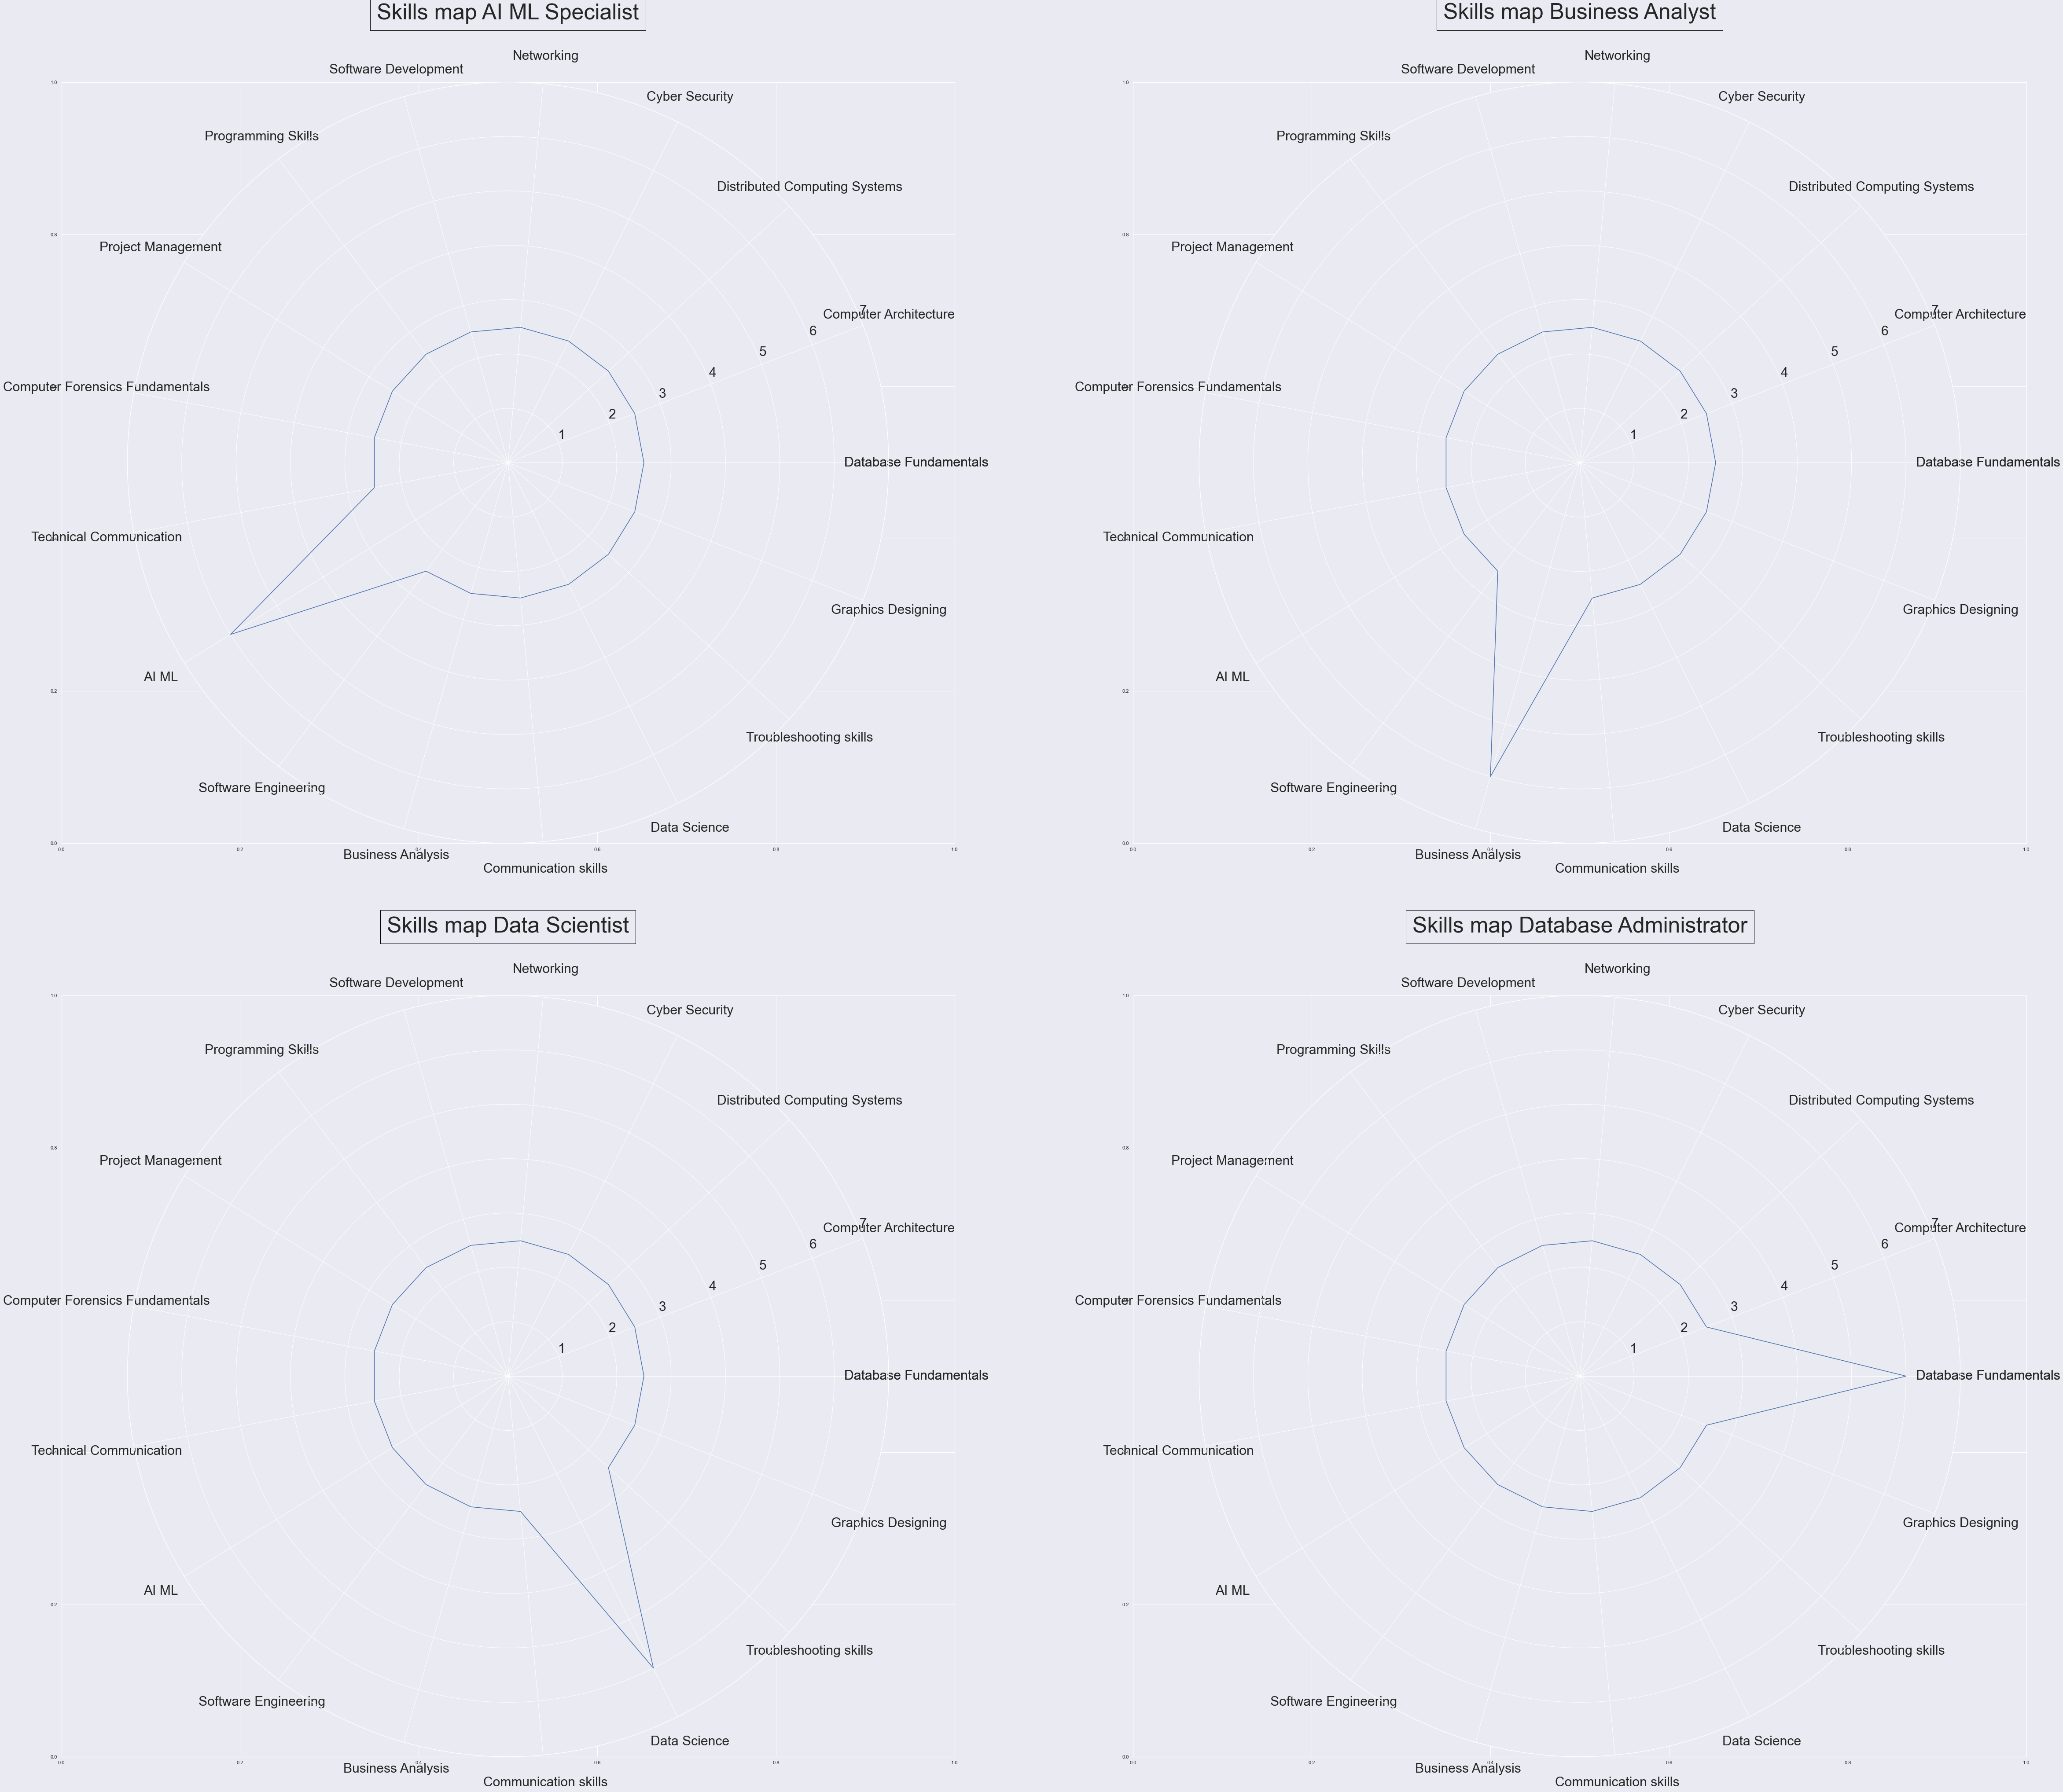

In [ ]:
# Create the radar chart using seaborn
import matplotlib.patches as patches


fig,[[ax1,ax2],[ax3,ax4]] = plt.subplots(2, 2, figsize=(80, 70), gridspec_kw={'wspace': 0.2, 'hspace': 0.2})
axs = [ax1,ax2,ax3,ax4]
gs = GridSpec(nrows=2, ncols=2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0], projection='polar')
ax2 = fig.add_subplot(gs[0, 1], projection='polar')  
ax3 = fig.add_subplot(gs[1, 0], projection='polar')
ax4 = fig.add_subplot(gs[1, 1], projection='polar') 
axs = [ax1,ax2,ax3,ax4]



ds_jobs = np.array(["AI ML Specialist", "Business Analyst", "Data Scientist", "Database Administrator"])

for i,ax in zip( range(0, len(ds_jobs)) , axs):


    categories =  list(numeric_overral_mapping.columns[1:])
    angles  =  np.linspace(0,2*np.pi,len(categories), endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))
    rays =  np.array(numeric_overral_mapping[categories].iloc[i])
    rays = np.append(rays, rays[0])
    ax.plot(angles, rays)
    ax.set_title(f'Skills map {ds_jobs[i]}', fontsize=50, pad = 70, bbox={'boxstyle': 'square', 'ec': 'black', 'fc': 'none'})
    ax.set_thetagrids(angles * 180/np.pi, categories.append(categories[0]) )
    ax.set_xticklabels(categories, fontsize=20)
    ax.set_ylim([0,7])
    ax.tick_params(axis='both', which='major', pad=50, labelsize= 30)
    tmp_var= ds_jobs[i]
    
    
# Set the legend outside of the plot
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

# Show the plot

fig.set_facecolor(ax.patch.get_facecolor())

## Word Cloud Job Description

(-0.5, 511.5, 511.5, -0.5)

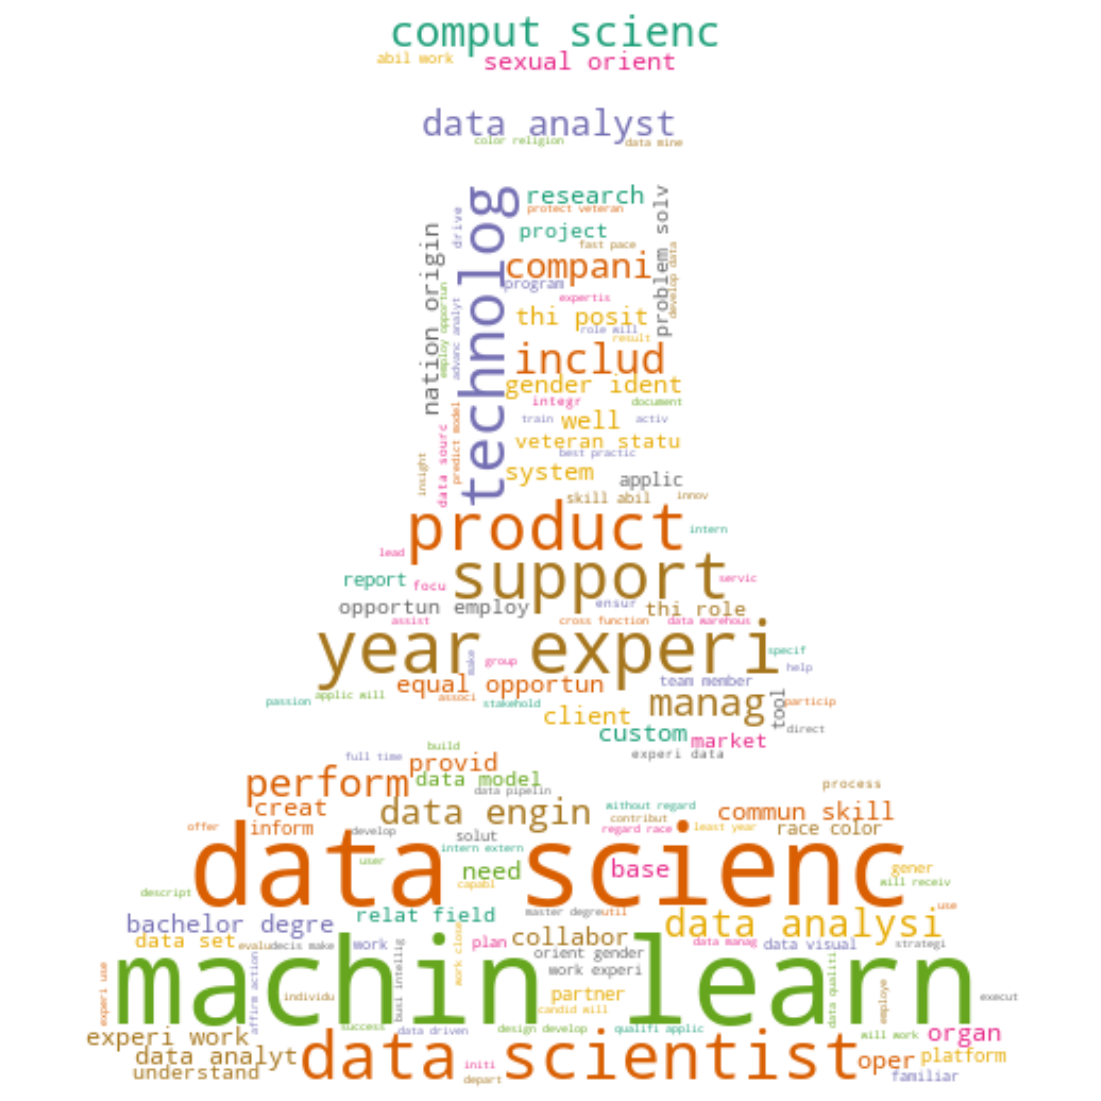

In [ ]:
from wordcloud import WordCloud
from PIL import Image
import PIL.ImageOps   

#Configura imagem usada como máscara

image = Image.open('C:/Users/lucas/Documents/Studying/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/sprint I - Analise de salarios cientista de dados/data_science_job_market_analysis/Assets/flask2.png')
mask = np.array(image)

kaggle_job_descriptions = kaggle_descriptions_preprocessed['description']
glassdoor_job_descriptions = glassdoor_descrptions_preprocessed['Job Description']
job_descriptions = pd.concat([kaggle_job_descriptions, glassdoor_job_descriptions])

all_words = " ".join([sentence for sentence in job_descriptions])
wordcloud = WordCloud( width= 200, height = 200, background_color="white", colormap='Dark2', min_font_size=5, mask = mask).generate(all_words)



# plot

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


